In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import mplhep as hep
plt.style.use(hep.style.CMS)
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
import os
import sys
sys.path.append('/home/horacio/Documents/hcl/')
import modelsSymfit
import modelsZfit
import sympy
from symfit import Fit
from symfit.core.objectives import LogLikelihood
from symfit.core.minimizers import  BasinHopping, SLSQP

In [35]:
def create_models(afb, fh, binNumber, efficiency, bin_data, Params) :   

    model = modelsSymfit.complete(binNumber,  afb, fh, params = Params, efficiency=efficiency)

    _constraints = [
                sympy.LessThan(model.FH, 3),
                sympy.GreaterThan(model.FH, 0),
                sympy.LessThan(sympy.Abs(model.AFB), 0.5*model.FH)
                ]


    fitConstraintSLSQP = Fit(model.pdf, 
                                cos=np.array(bin_data.cos_l), 
                                mass=np.array(bin_data.Bmass), 
                                objective=LogLikelihood, 
                                constraints=_constraints,
                                minimizer=SLSQP)


    fitConstraintBH_SLSQP = Fit(model.pdf, 
                                cos=np.array(bin_data.cos_l), 
                                mass=np.array(bin_data.Bmass), 
                                objective=LogLikelihood, 
                                constraints=_constraints,
                                minimizer=[BasinHopping, SLSQP])
    
    return fitConstraintSLSQP, fitConstraintBH_SLSQP, model


In [5]:
data = pd.read_pickle('/home/horacio/Documents/efficiency/data/AntiRadXGBNonRes_cosT.pkl')

data.columns = ['DiMuMass', 'Bmass', 'DiMupt', 'l1pt', 'l2pt', 'Mu1_isSoft',
       'Mu2_isSoft', 'k_HighPurity', 'k_numberOfPixelHits', 'k_nValidHits',
       'Bpt', 'kpt', 'PDL', 'prob', 'cosA', 'signLxy', 'cos_l', 'XGB']

#We only used a subset of the whole dataset for best fitting on the mass variable
data = data[(data.Bmass>5)&(data.Bmass<5.7)]




bins = {0: [1, 2],
       1: [2,4.3],
       2: [4.3,8.74],
       3: [8.74,10.3],
       4: [10.3,12.89],
       5: [12.89,14.29],
       6: [14.29,16],
       7: [16, 18],
       8: [18,22],
       9: [1.0,6.0],
       10: [1.0, 22.0],
       11:[
           [1.0, 8.68], 
           [10.09 , 12.86],
           [14.18, 22]
          ]}



#which_bin
dataDF = dict()
for k in bins:
    if k==11: continue
    dataDF[k] = data[
                    (data.DiMuMass>np.sqrt(bins[k][0])) & 
                    (data.DiMuMass<np.sqrt(bins[k][1]))
                    ]

    

In [33]:
ls /home/horacio/Documents/efficiency/data/

AntiRadXGBNonRes_cosT.pkl                      GEN-SIM2_5M2_5M.root
bestCosAlpha_bestCosAlpha_HCL54B_kmm_mc2M.pkl  HCL05B_kmm_mc2M.root
bestCosAlpha_HCL05B_kmm_mc2M.pkl               HCL54B_kmm_mc2M.root
bestCosAlpha_HCL54B_kmm_mc2M.pkl               HCV07B_kmm_mc2_5M.root
bestCosAlpha_HCV07B_kmm_mc2_5M.pkl             HCV08B_kmm_mc2_5M.root
bestCosAlpha_HCV08B_kmm_mc2_5M.pkl             Params.json
cleanDataCosAlpha.py                           Params-UpdatedSB.json
finalSelection.pkl                             toyMC_oldparams.json


In [34]:
import json
with open('/home/horacio/Documents/efficiency/data/Params.json') as f:
    Params = json.load(f)
with open('/home/horacio/Documents/efficiency/data/Params-UpdatedSB.json') as f:
    ParamsUpdatedSB = json.load(f)

In [23]:
bins = {0: [1, 2],
       1: [2,4.3],
       2: [4.3,8.74],
       3: [8.74,10.3],
       4: [10.3,12.89],
       5: [12.89,14.29],
       6: [14.29,16],
       7: [16, 18],
       8: [18,22],
       9: [1.0,6.0],
       10: [1.0, 22.0],
       11:[
           [1.0, 8.68], 
           [10.09 , 12.86],
           [14.18, 22]
          ]}

In [8]:
#Here I have changed  bit the modelsSymfit.py
#Changes on the atributes mainly
#One typo made use the Old coefficients?
dataframesHCL = dict()
dataframesORGINAL = dict()
dataframesCHI = dict()
for name in os.listdir('random'):
    if 'bin' not in name:
        continue
    if os.path.exists(f'random/{name}/HoracioEffyCoefs'):
        dataframesHCL[name]=pd.read_pickle(f'random/{name}/HoracioEffyCoefs/50/SLSQP.pkl')
        dataframesORGINAL[name]=pd.read_pickle(f'random/{name}/OriginalEffyCoefs/50/SLSQP.pkl')
    if os.path.exists(f'random/{name}/Chi2EffyCoefs/50/SLSQP.pkl'):
        print(name)
        dataframesCHI[name]=pd.read_pickle(f'random/{name}/Chi2EffyCoefs/50/SLSQP.pkl')
        

bin_0
bin_1
bin_2
bin_4
bin_6
bin_7
bin_8
bin_9
bin_10


In [22]:
dataframes = dict()
for name in os.listdir('random'):
    if 'bin' not in name:
        continue
    if os.path.exists(f'random/{name}/Params_UpdatedSB/Chi2EffyCoefs/20/SLSQP.pkl'):
        dataframes[name]=pd.read_pickle(f'random/{name}/Params_UpdatedSB/Chi2EffyCoefs/20/SLSQP.pkl')

In [24]:
BestPointEstimation = dict()
for k, dataframe in dataframes.items():
    BestPointEstimation[k]= dataframe[dataframe.NLL2 == np.min(dataframe.NLL2)]

In [25]:
BestPointEstimation['bin_0']['AFB2'].values[0]

0.019666662359195067

In [26]:
from importlib import reload
modelsSymfit = reload(modelsSymfit)

In [63]:
FitResults_['bin_0'].params

OrderedDict([('AFB', 0.020371570468061227),
             ('FH', 0.3917818475832125),
             ('FRAC', 0.05181492368039451),
             ('LAMBDA', -1.6227782262645052),
             ('MU', 5.274101902139558),
             ('SIGMA', 0.02824496211365652)])

In [36]:
FitResults_ = dict()
models = dict()
for k, df in BestPointEstimation.items():
    afb = BestPointEstimation[k]['AFB2'].values[0]
    fh = BestPointEstimation[k]['FH2'].values[0]
    if 2*np.abs(afb)>fh:
        print(2*np.abs(afb)-fh)
        print(afb, fh)
        fh = 2*np.abs(afb)
    fitConstraintSLSQP, fitConstraintBH_SLSQP, model = create_models(
            afb=afb, 
            fh=fh, 
            binNumber=int(k.split('_')[-1]),
            efficiency='Chi2EffyCoefs',
            bin_data = dataDF[int(k.split('_')[-1])],
            Params= ParamsUpdatedSB
        )
    models[k] = model
    FitResults_[k] = fitConstraintSLSQP.execute()


Using : Chi2EffyCoefs


/home/horacio/Documents/pycms/lib64/python3.6/site-packages/symfit/core/objectives.py:462: RuntimeWarning: divide by zero encountered in log
  [np.nansum(np.log(component)) for component in evaluated_func]
/home/horacio/Documents/pycms/lib64/python3.6/site-packages/symfit/core/objectives.py:462: RuntimeWarning: invalid value encountered in log
  [np.nansum(np.log(component)) for component in evaluated_func]


Using : Chi2EffyCoefs
3.927413949611491e-14
-0.055869333612584955 0.11173866722513064
Using : Chi2EffyCoefs
Using : Chi2EffyCoefs
Using : Chi2EffyCoefs
Using : Chi2EffyCoefs
2.685351010043952e-12
-1.713393244189893e-12 7.41435478335834e-13
Using : Chi2EffyCoefs
Using : Chi2EffyCoefs
Using : Chi2EffyCoefs


In [114]:
model.background_mass

FRAC*exp(-(-MU + mass)**2/(2*SIGMA**2))/(-sqrt(2)*SIGMA*sqrt(pi)*erf(sqrt(2)*(5.0 - MU)/(2*SIGMA))/2 + sqrt(2)*SIGMA*sqrt(pi)*erf(sqrt(2)*(5.7 - MU)/(2*SIGMA))/2)

In [38]:
def eval_mass_p(m, bin_):
    return models[f'bin_{bin_}'].projection_mass(m, **FitResults_[f'bin_{bin_}'].params)
v_mass_p = np.vectorize(eval_mass_p)

def eval_mass_signal(m, bin_):
    return models[f'bin_{bin_}'].signal_mass(m, **FitResults_[f'bin_{bin_}'].params)
v_mass_signal = np.vectorize(eval_mass_signal)

def eval_mass_background(m, bin_):
    return models[f'bin_{bin_}'].background_mass(m, **FitResults_[f'bin_{bin_}'].params)
v_mass_background = np.vectorize(eval_mass_background)

In [39]:
def eval_angular_p(m, bin_):
    return models[f'bin_{bin_}'].projection_angular(m, **FitResults_[f'bin_{bin_}'].params)
v_angular_p = np.vectorize(eval_angular_p)

def eval_angular_signal(m, bin_):
    return models[f'bin_{bin_}'].signal_angular(m, **FitResults_[f'bin_{bin_}'].params)
v_angular_signal = np.vectorize(eval_angular_signal)

def eval_only_angular_signal(m, bin_):
    return models[f'bin_{bin_}'].only_signal(m, **FitResults_[f'bin_{bin_}'].params)
v_angular_only_signal = np.vectorize(eval_only_angular_signal)

def eval_angular_background(m, bin_):
    return models[f'bin_{bin_}'].background_angular(m, **FitResults_[f'bin_{bin_}'].params)
v_angular_background = np.vectorize(eval_angular_background)

In [80]:
mass_data[1][1]-mass_data[1][0]

0.027968884

In [125]:
np.round(123.124435,2)

123.12

In [58]:
mass_plots = {'projection':dict(), 'signal':dict(), 'background':dict()}

angle_plots = {'projection':dict(), 'signal':dict(), 'background':dict(), 'only_signal':dict()}

In [166]:
angle_plots

{'projection': {}, 'signal': {}, 'background': {}, 'only_signal': {}}

In [173]:
from sympy import integrate

In [41]:
FitResults_[f'bin_{0}'].params

OrderedDict([('AFB', 0.020371570468061227),
             ('FH', 0.3917818475832125),
             ('FRAC', 0.05181492368039451),
             ('LAMBDA', -1.6227782262645052),
             ('MU', 5.274101902139558),
             ('SIGMA', 0.02824496211365652)])

In [189]:
def fractionOfBack(bin_, n_sigmas):
    full = integrate(models[f'bin_{bin_}'].background_mass, (models[f'bin_{bin_}'].mass, 5., 5.7))(**FitResults_[f'bin_{bin_}'].params)
    mu, sigma = FitResults_[f'bin_{bin_}'].params['MU'], FitResults_[f'bin_{bin_}'].params['SIGMA']
    sigmas_region = integrate(models[f'bin_{bin_}'].background_mass, (models[f'bin_{bin_}'].mass, mu-n_sigmas*sigma, mu+n_sigmas*sigma))(**FitResults_[f'bin_{bin_}'].params)
    return sigmas_region/full
    

In [192]:
fractionOfBack(0,3)

0.2667094756284524

SIGMA :  0.028941191380703793


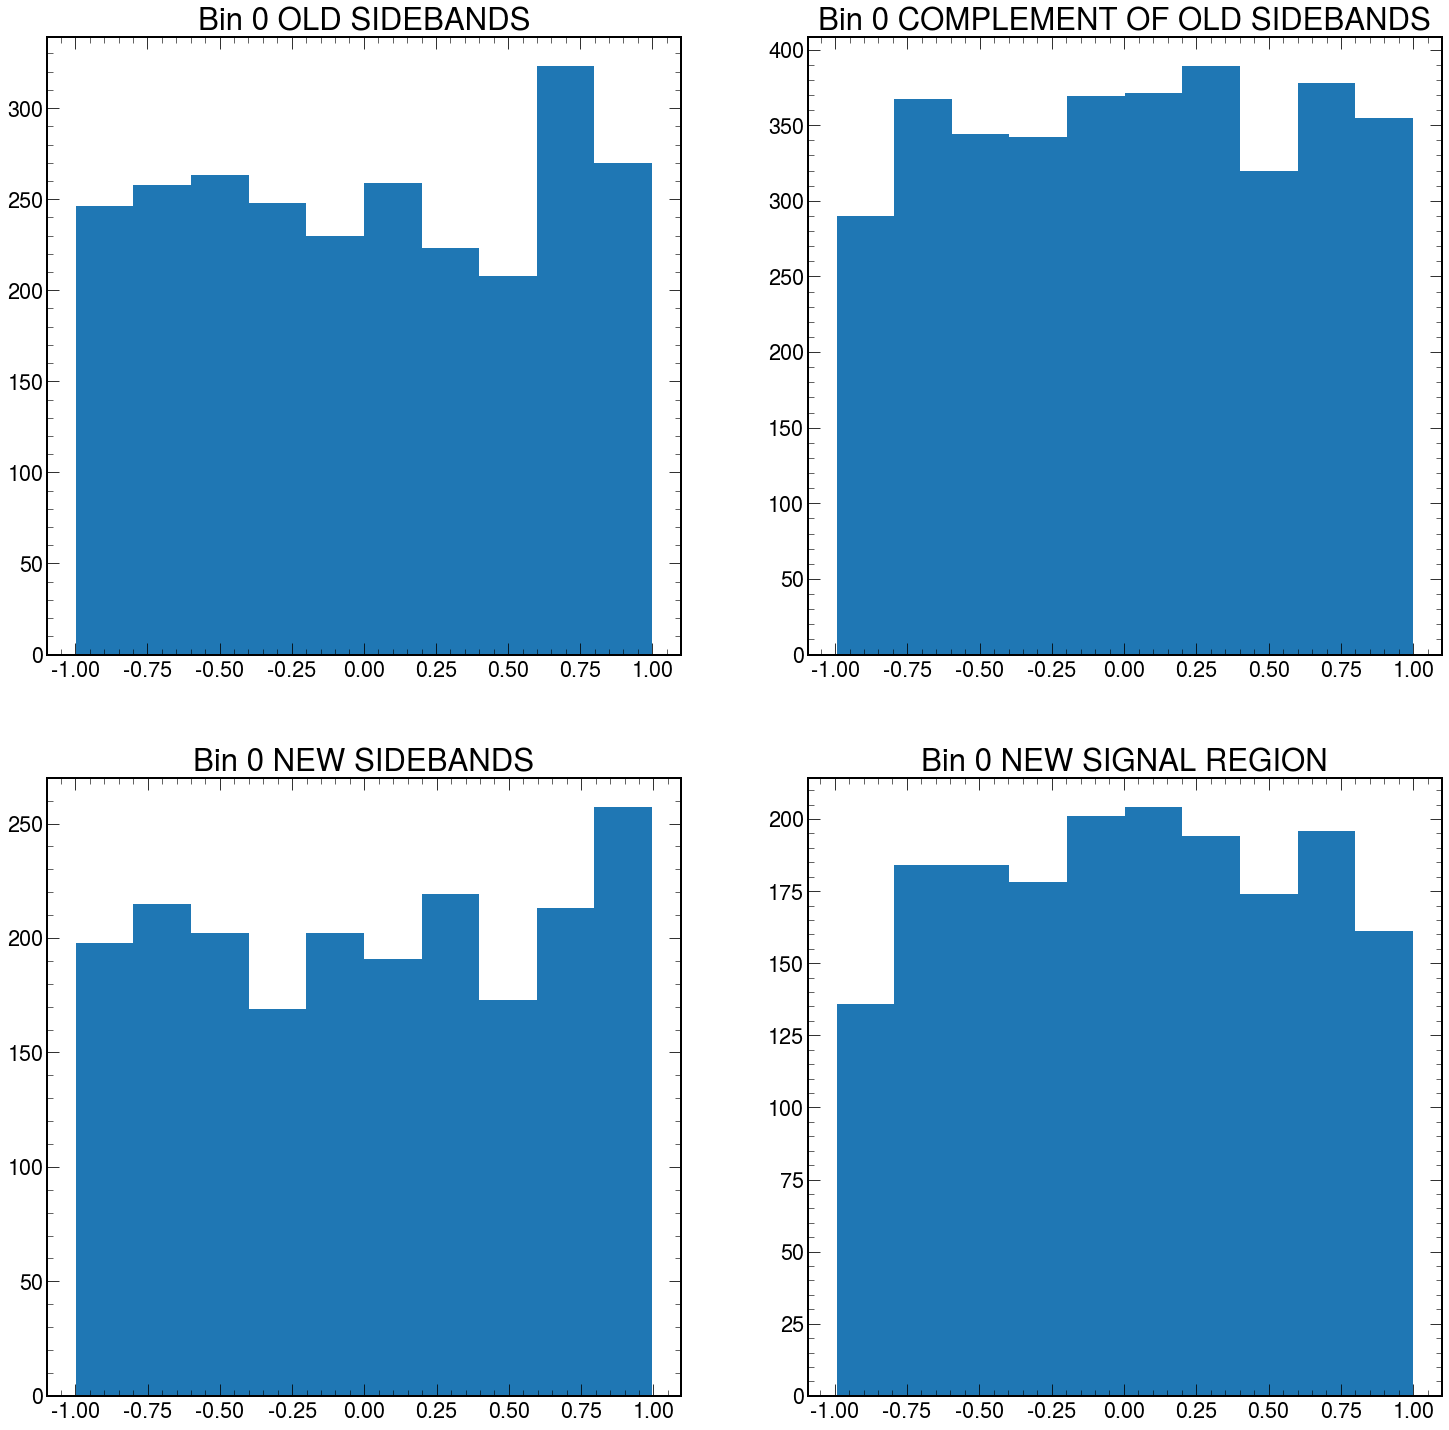

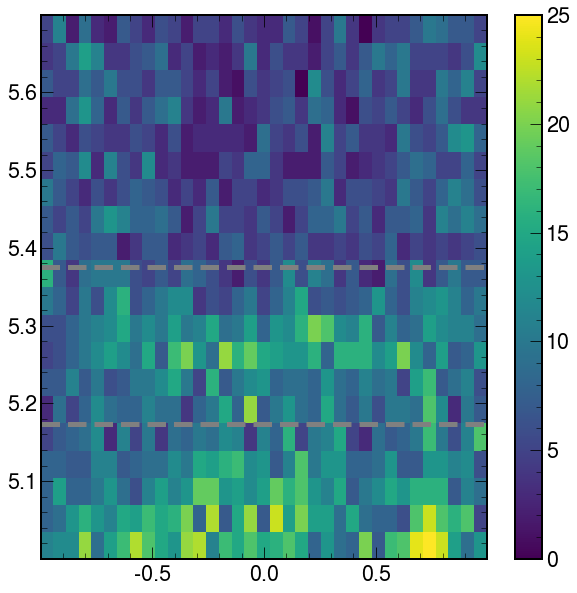

SIGMA :  0.037696198705643474


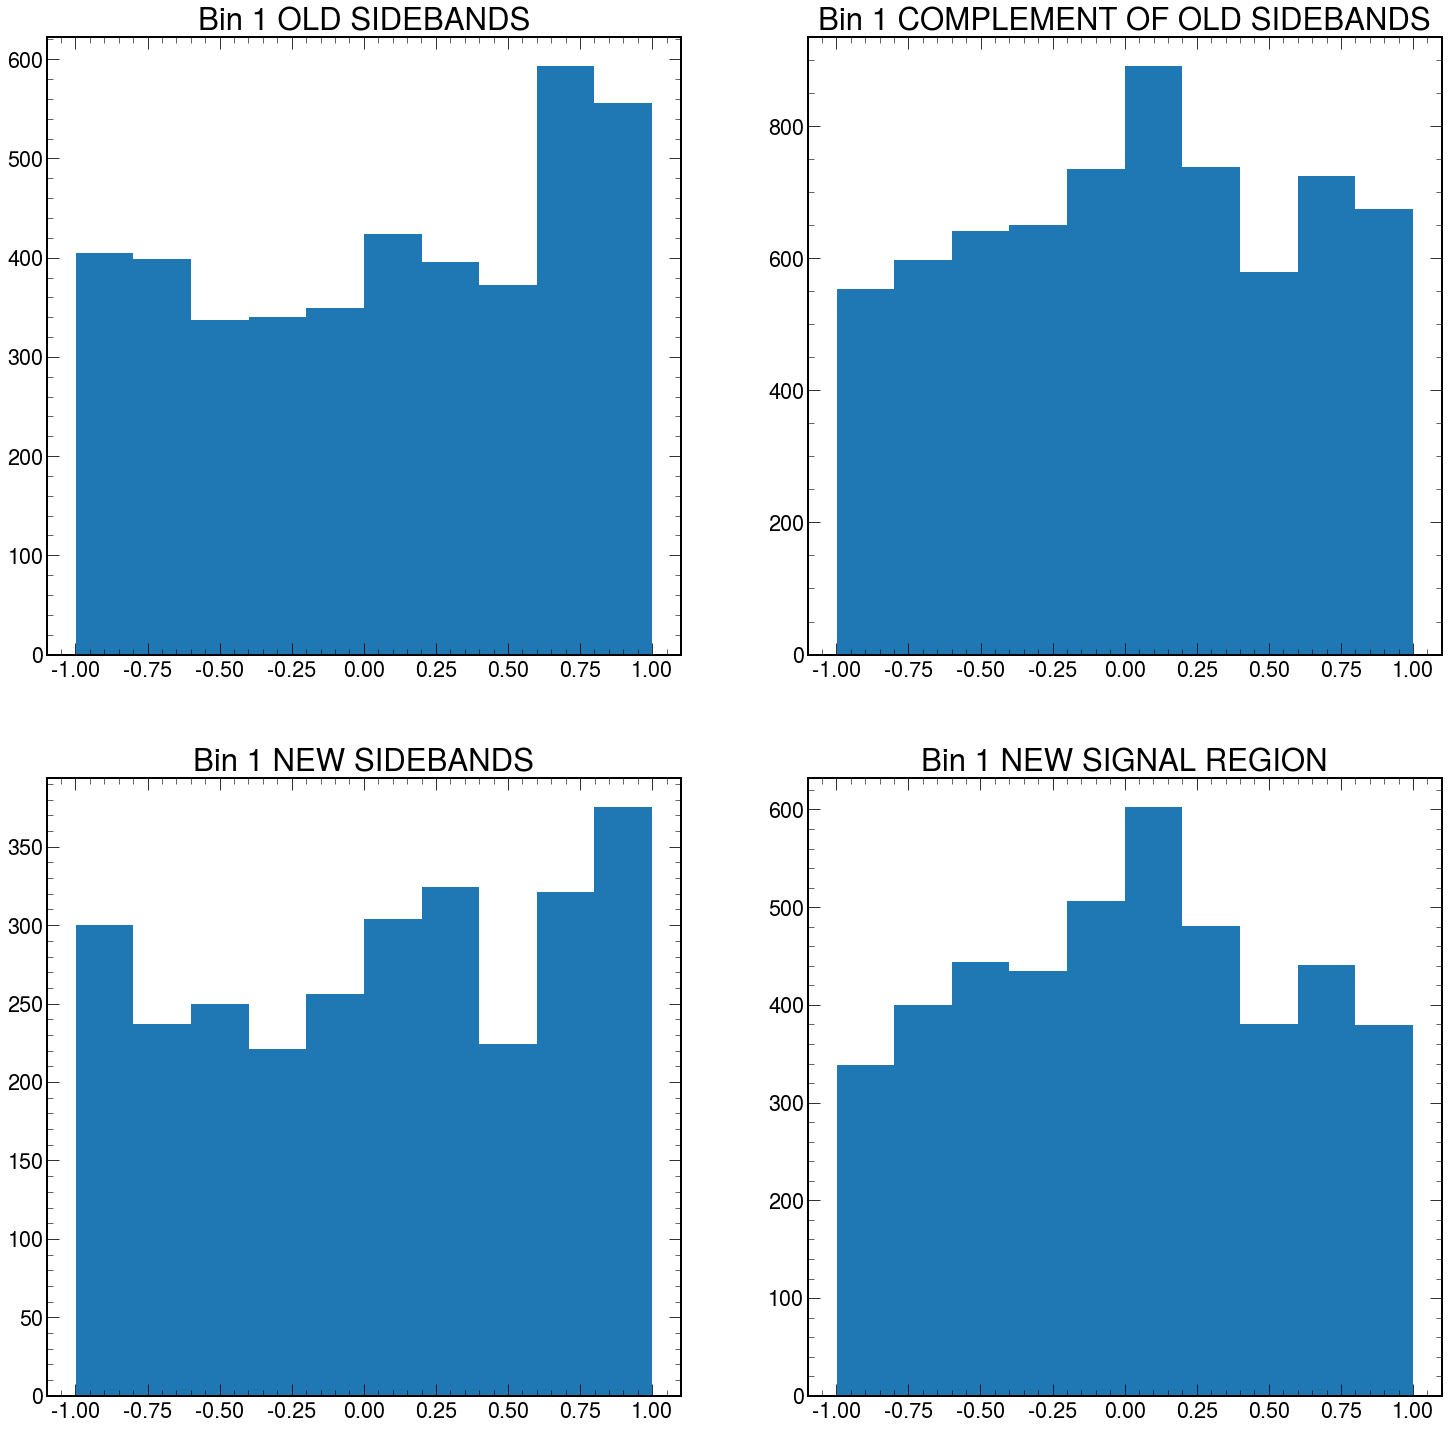

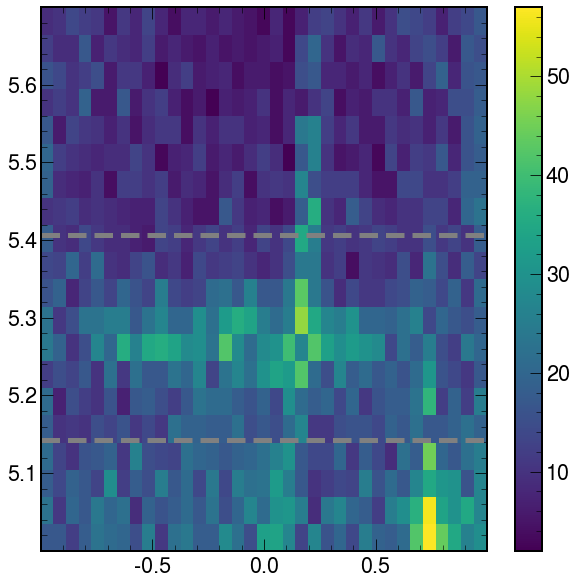

SIGMA :  0.05228159415098661


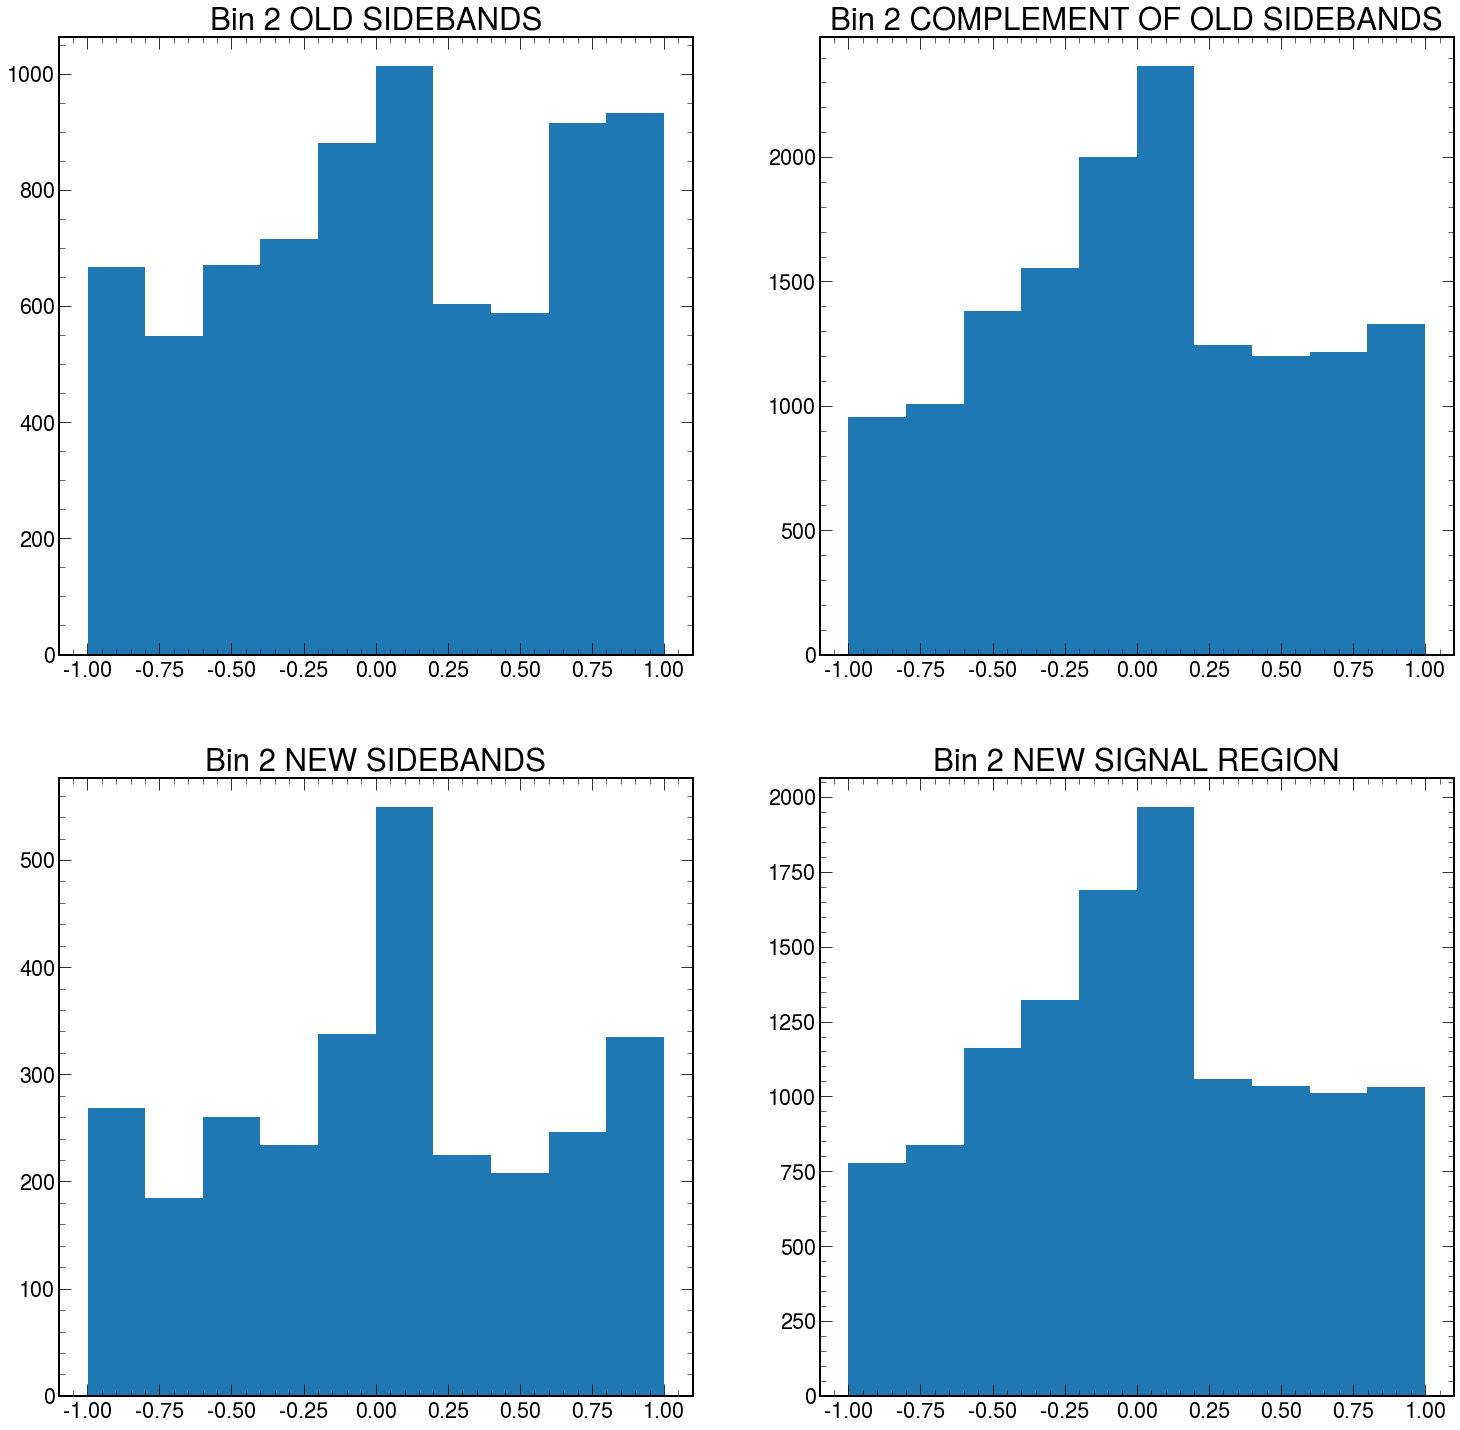

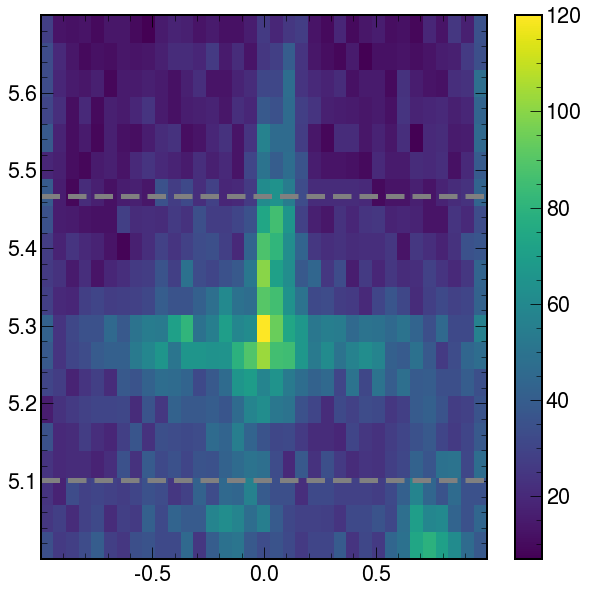

SIGMA :  0.05512477491035063


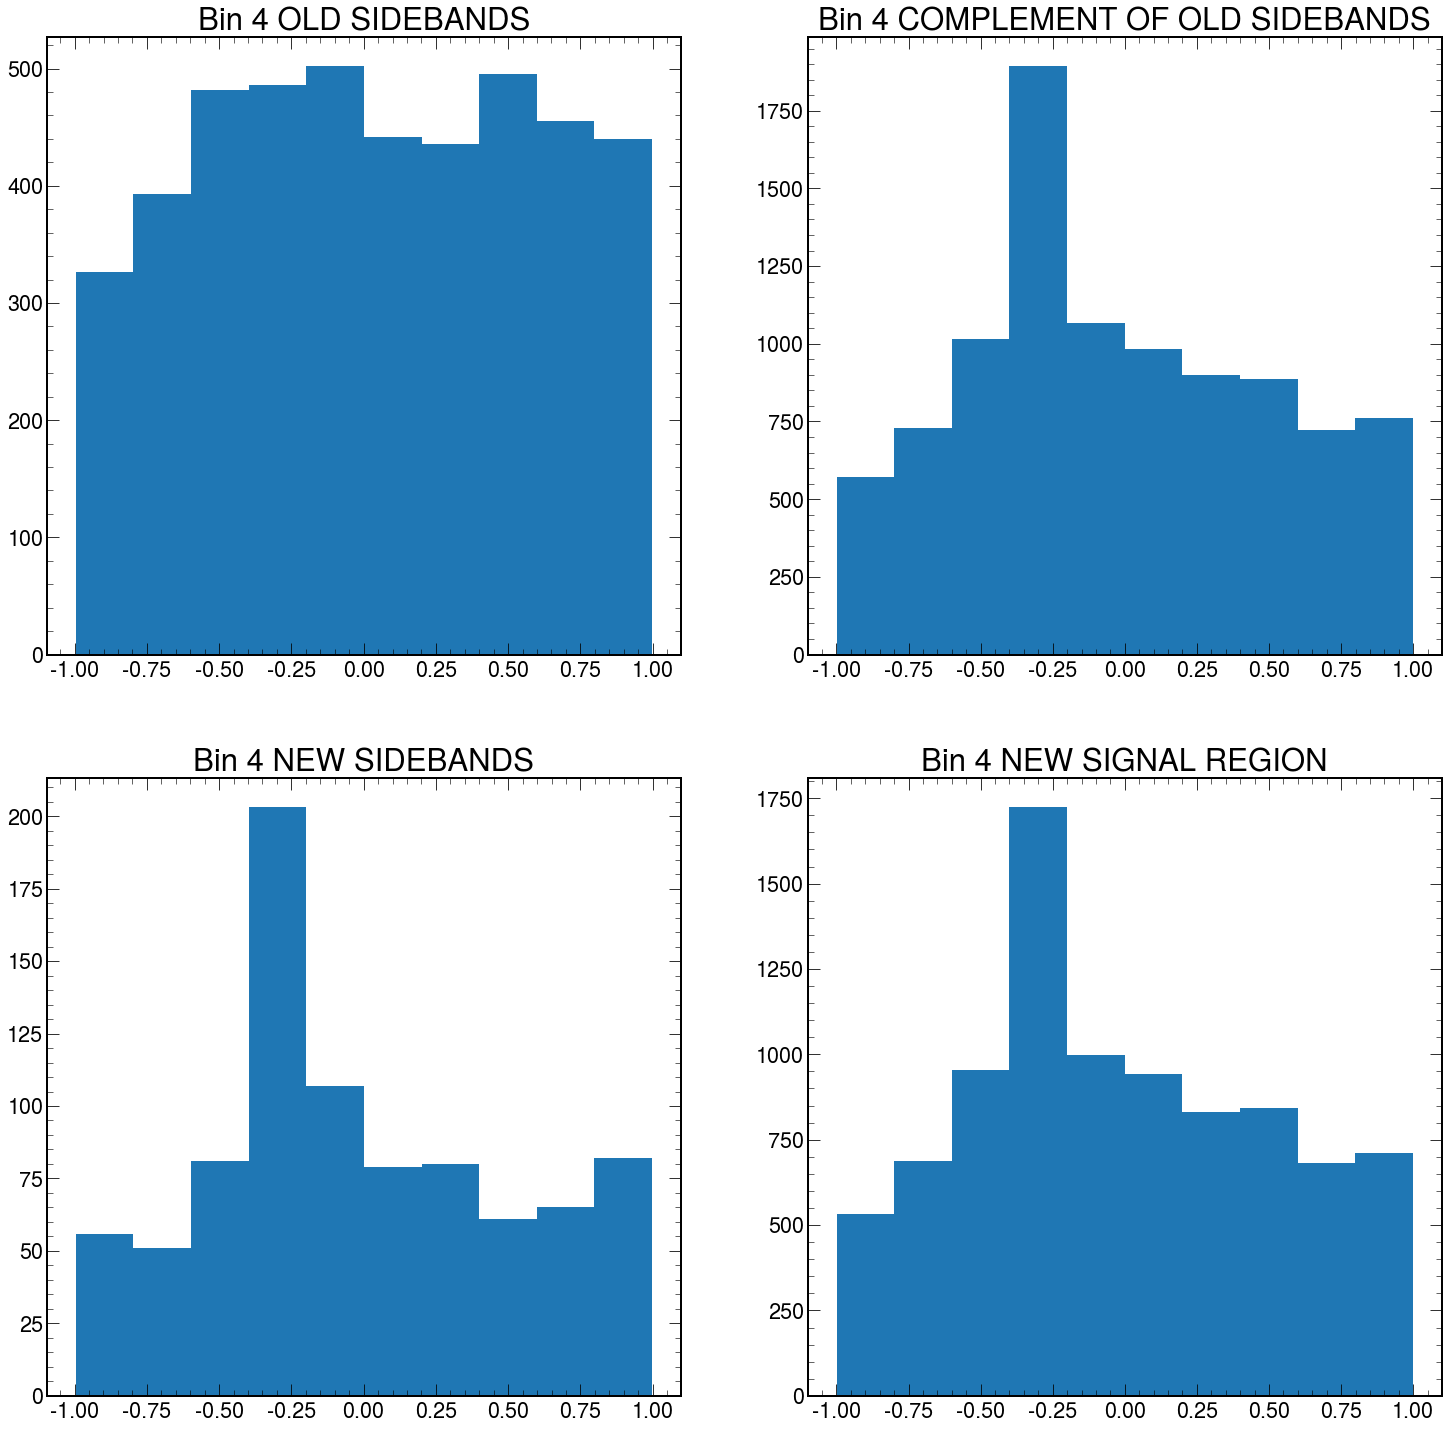

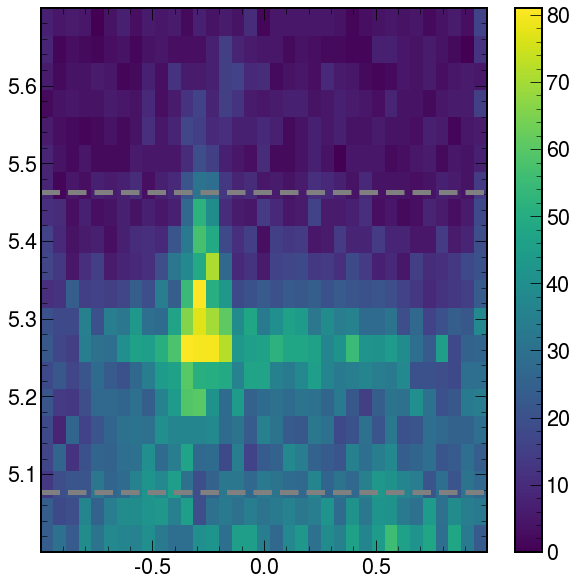

SIGMA :  0.043419771500564565


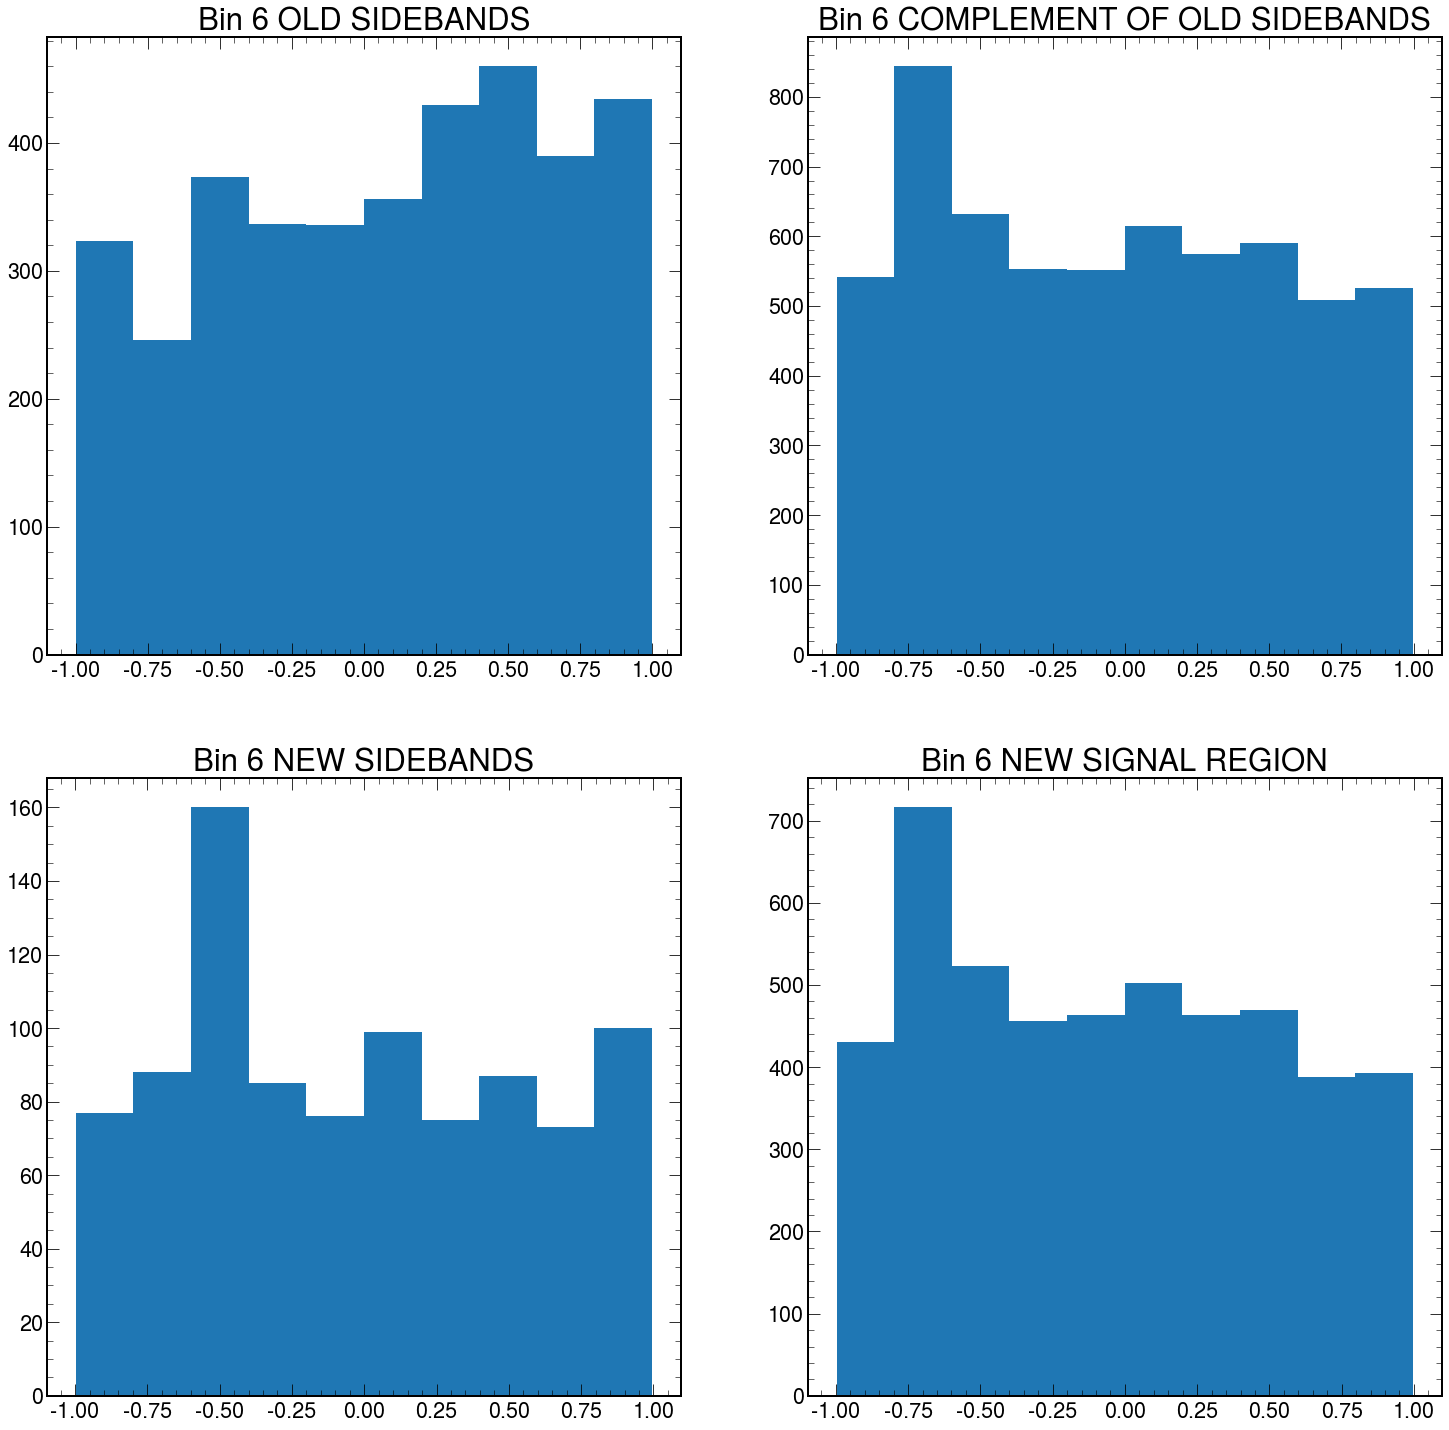

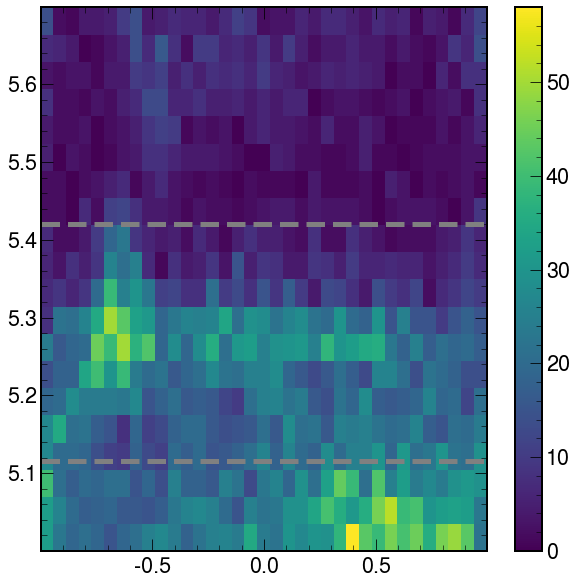

SIGMA :  0.03619815755350853


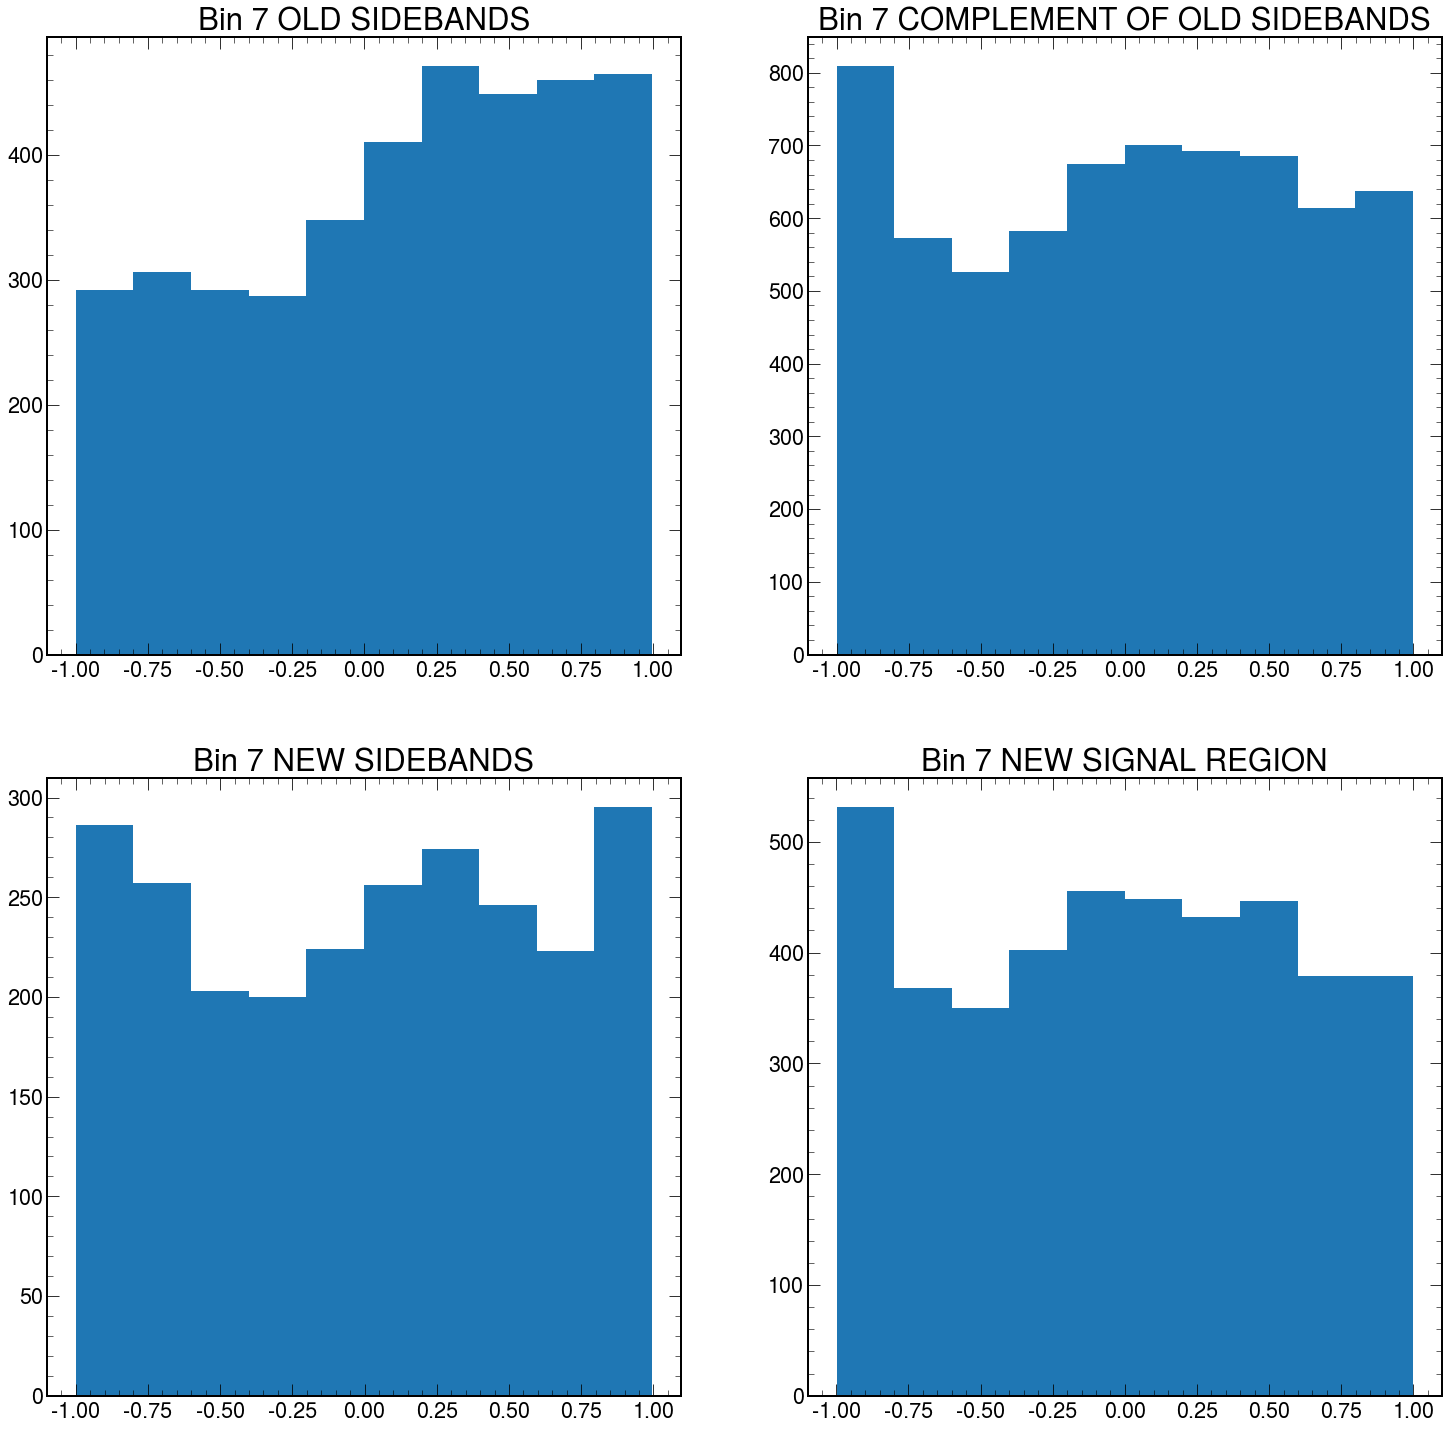

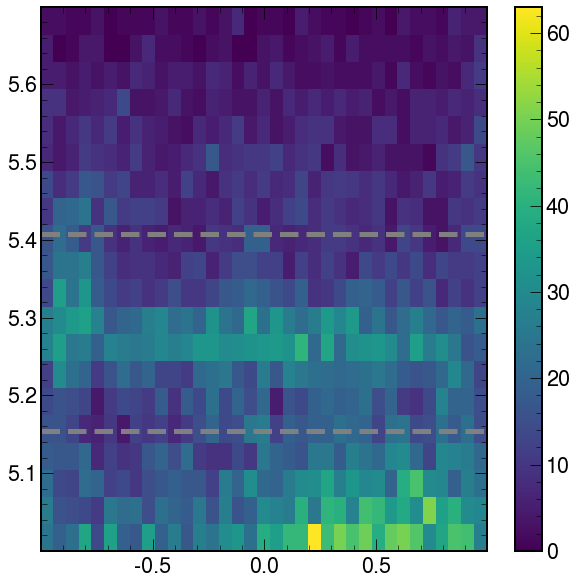

SIGMA :  0.03573944815055113


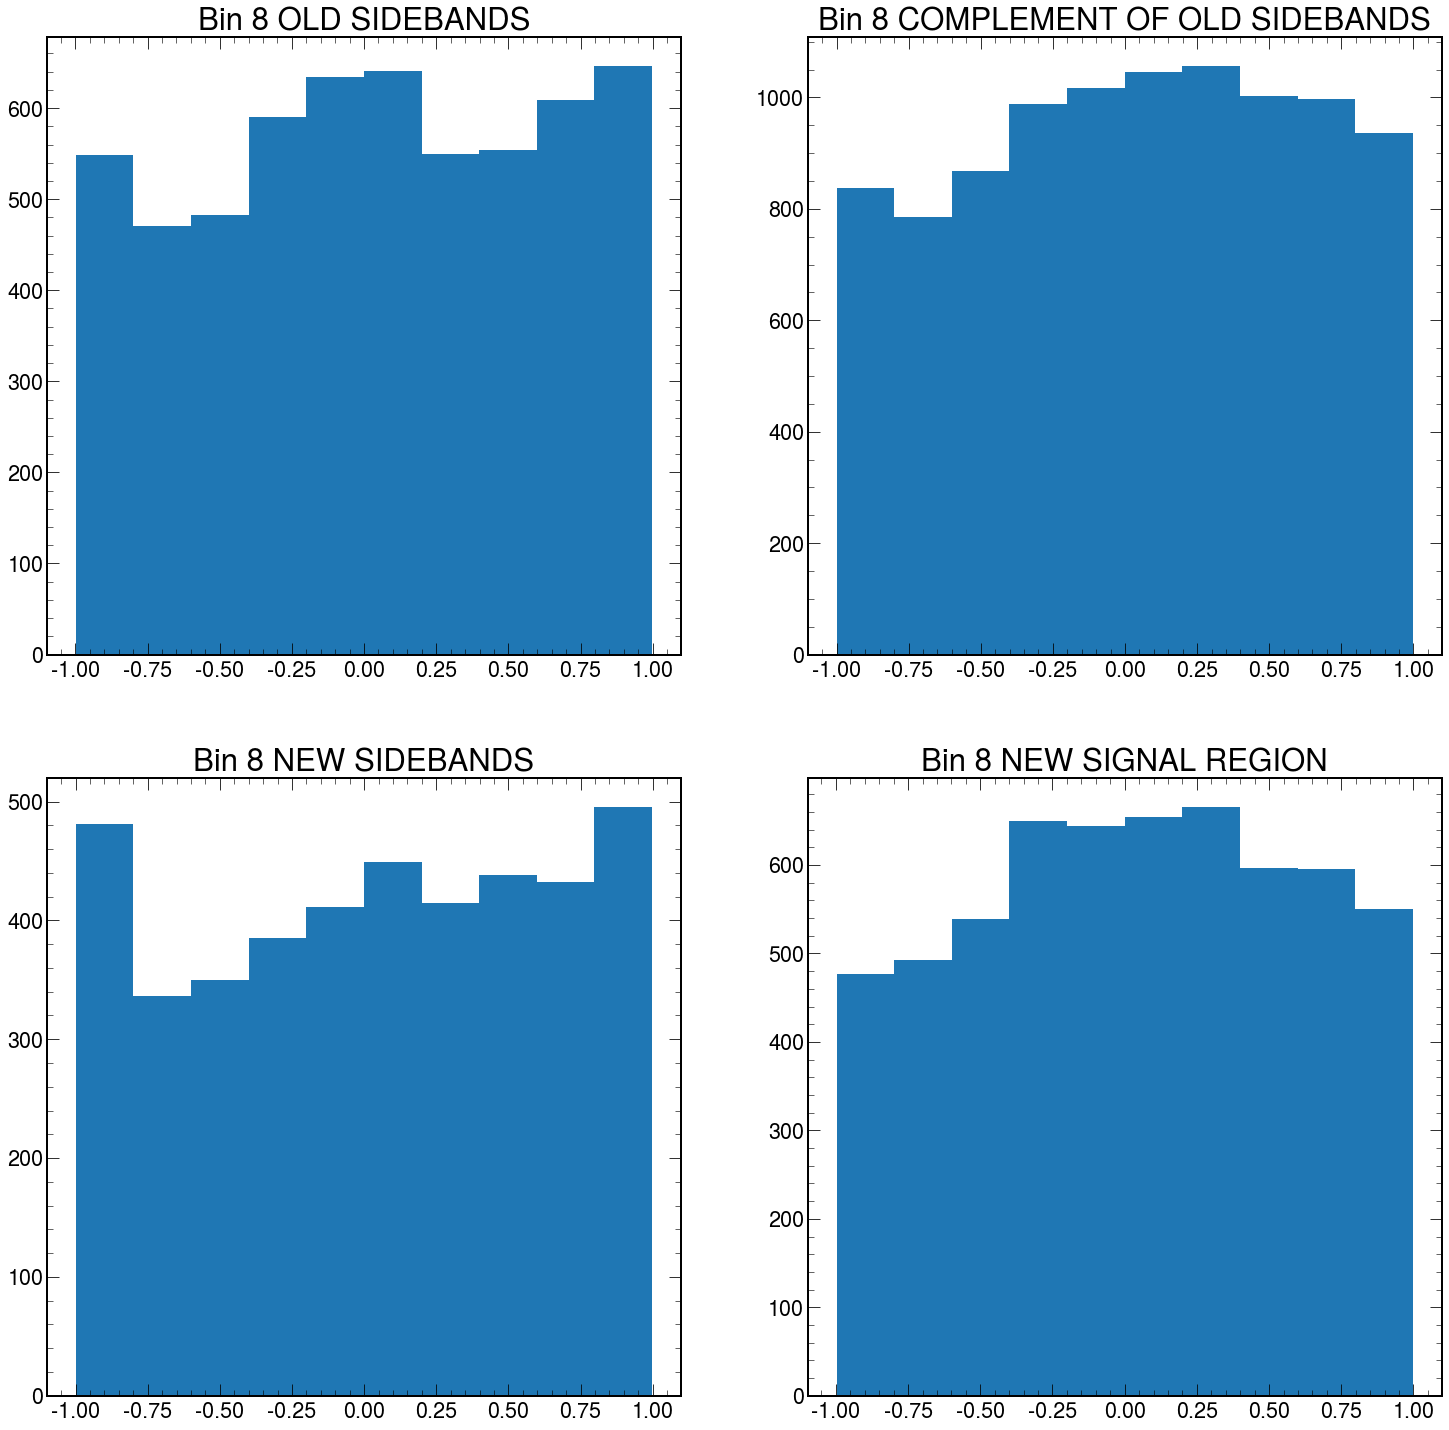

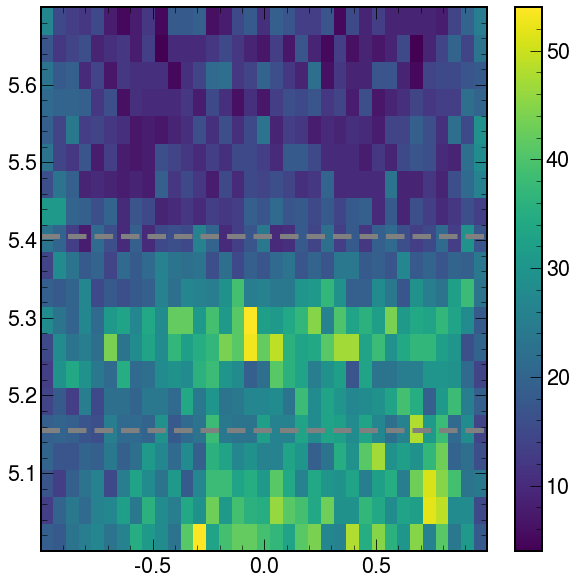

SIGMA :  0.034936193181009385


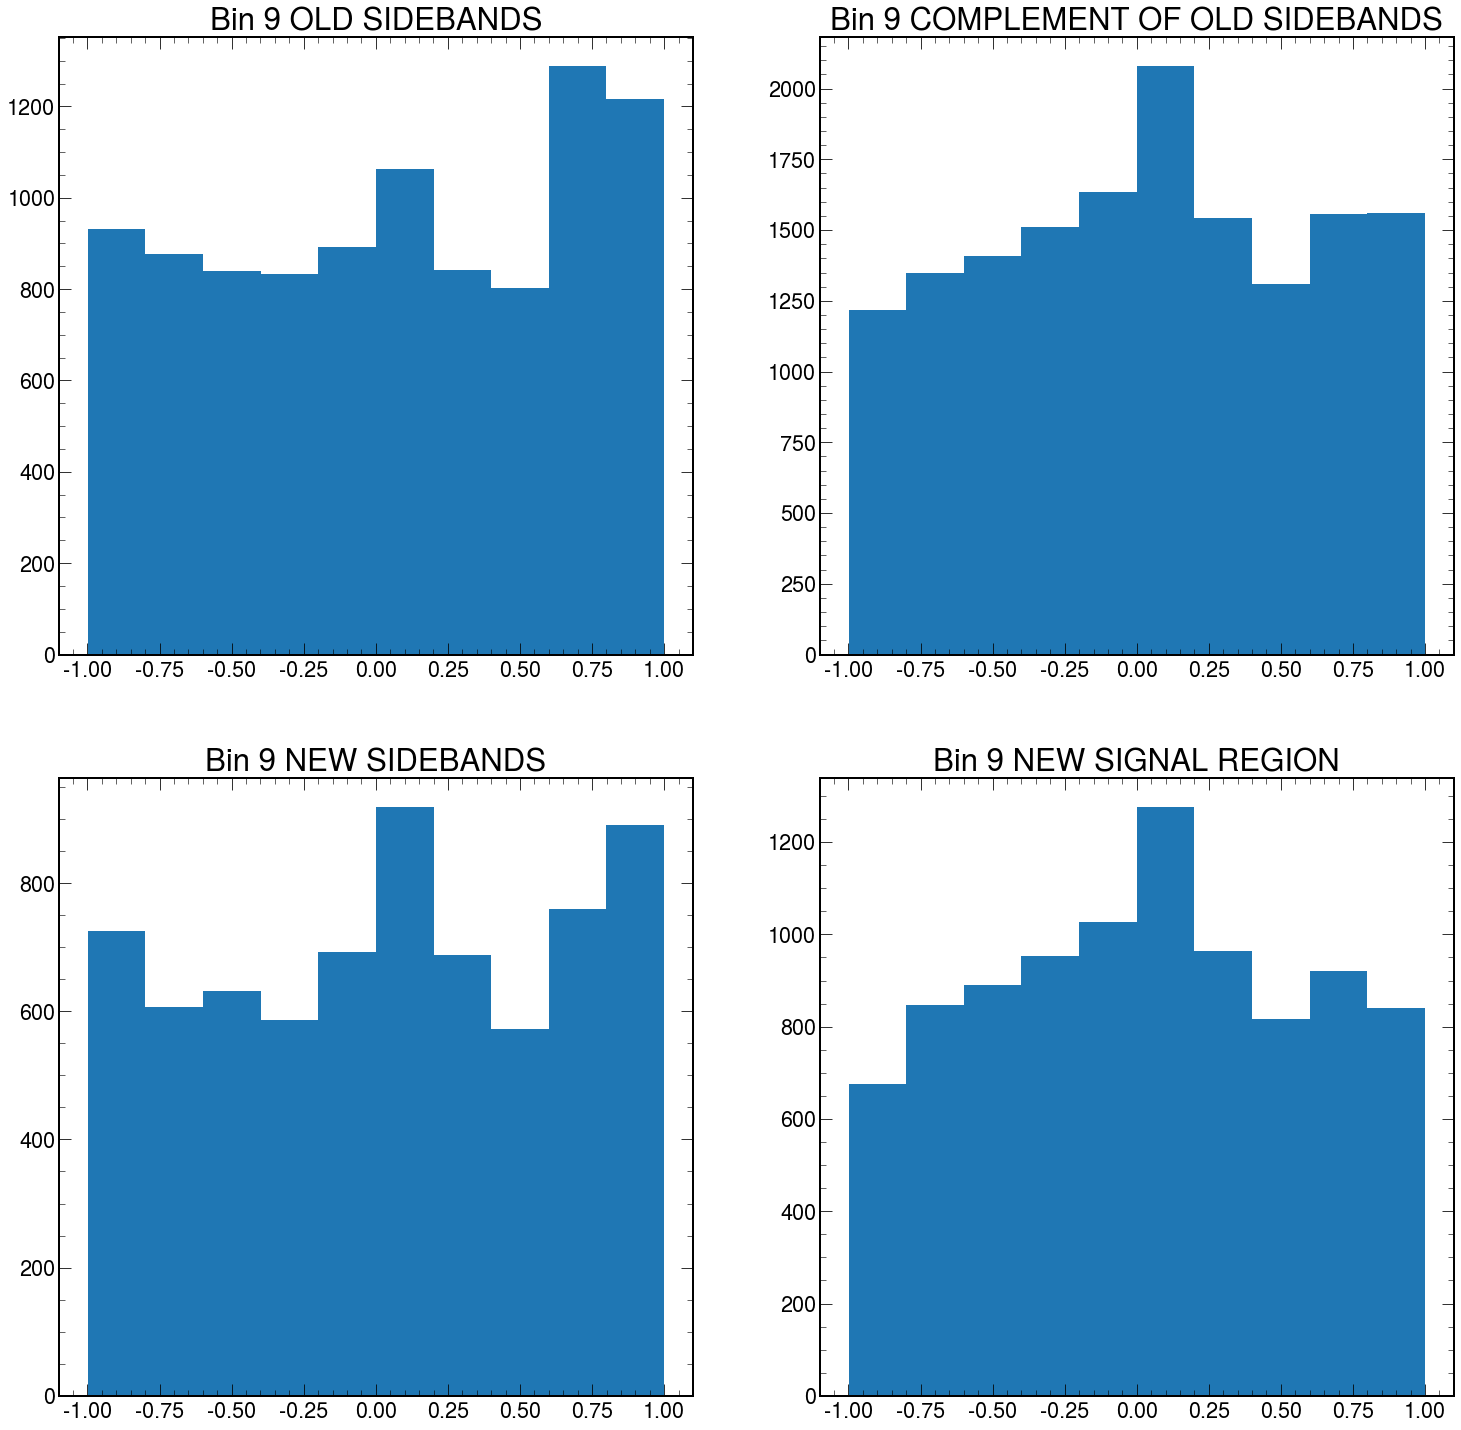

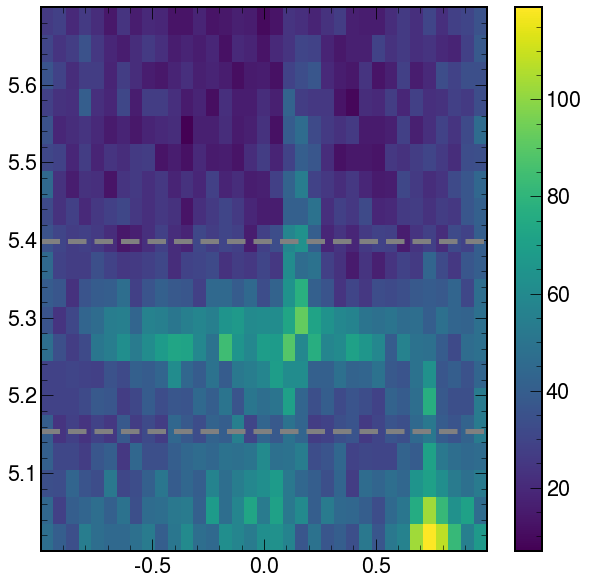

SIGMA :  0.03831240081604498


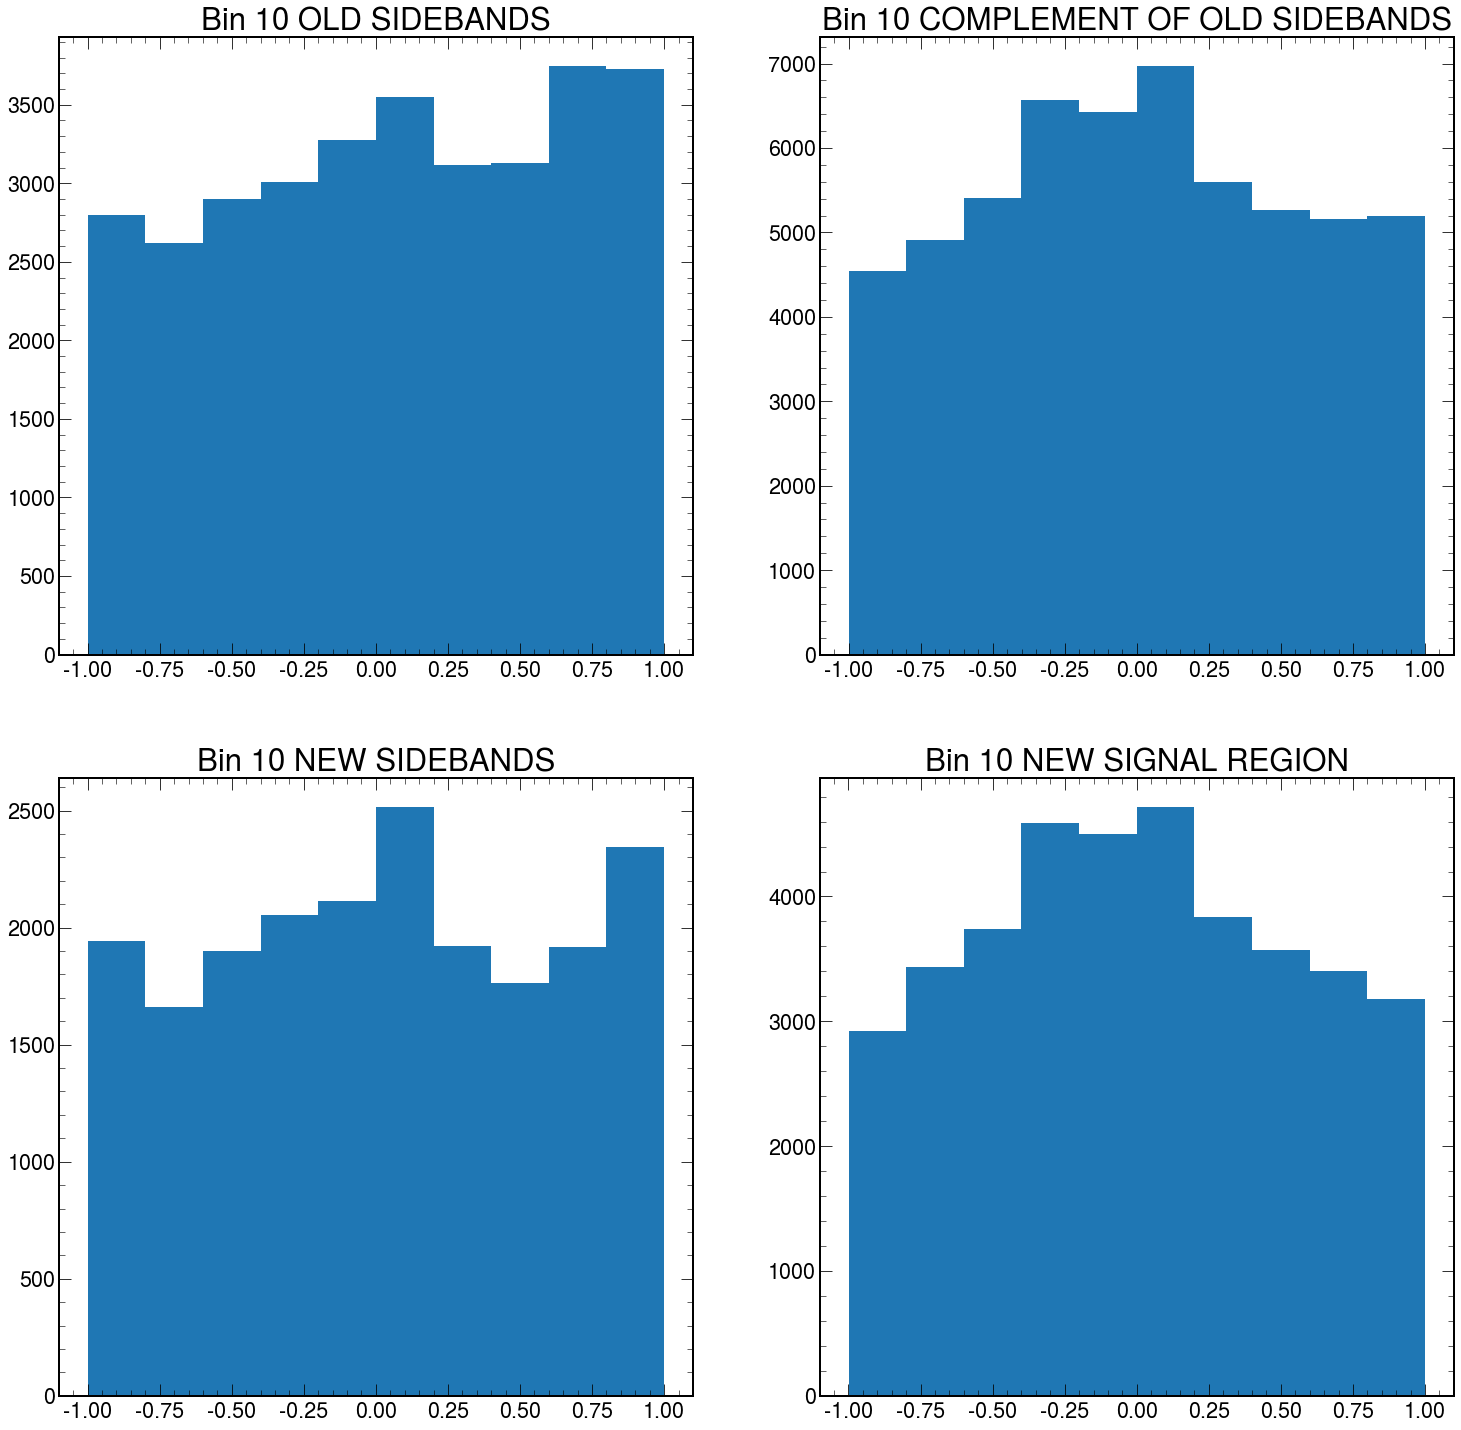

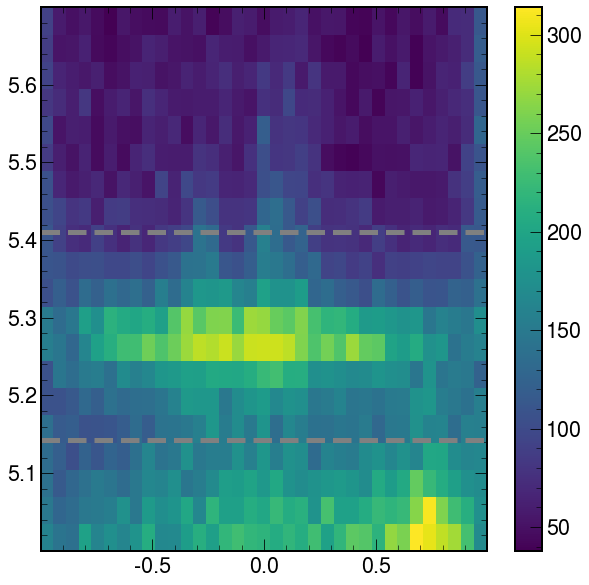

In [19]:
for k, df in dataDF.items():
    if k in [3, 5]: continue
    figura = plt.figure(figsize=(25, 25))
    
    sigma_val = FitResults_[f'bin_{k}'].params['SIGMA']
    mu_val = FitResults_[f'bin_{k}'].params['MU']
    print('SIGMA : ', sigma_val)
    print('MU : ')
    
    _1 = figura.add_subplot(2,2,1)
    _1.hist(df[(df.Bmass<5.1)|(df.Bmass>5.5)].cos_l)
    _1.set_title(f'Bin {k} OLD SIDEBANDS')
    #plt.show()
    
    _2 = figura.add_subplot(2,2,2)
    _2.hist(df[(df.Bmass>5.1)&(df.Bmass<5.5)].cos_l)
    _2.set_title(f'Bin {k} COMPLEMENT OF OLD SIDEBANDS')
    #plt.show()
    
    _3 = figura.add_subplot(2,2,3)
    df2 = df[(df.Bmass>5.1)&(df.Bmass<5.6)]
    _3.hist(df2[(df2.Bmass<(mu_val-3.5*sigma_val))|(df2.Bmass>(mu_val+3.5*sigma_val))].cos_l)
    _3.set_title(f'Bin {k} NEW SIDEBANDS')
    #plt.show()
    
    _4 = figura.add_subplot(2,2,4)
    plt.hist(df[(df.Bmass>(mu_val-3*sigma_val))&(df.Bmass<(mu_val+3*sigma_val))].cos_l)
    _4.set_title(f'Bin {k} NEW SIGNAL REGION')
    plt.show()
    #
    
    plt.hist2d(df.cos_l, df.Bmass,bins=[35, 20])
    plt.plot([-1,1], [mu_val-3.5*sigma_val, mu_val-3.5*sigma_val], ls='--', color='grey', linewidth=5)
    plt.plot([-1,1], [mu_val+3.5*sigma_val, mu_val+3.5*sigma_val], ls='--', color='grey', linewidth=5)
    plt.colorbar()
    plt.show()

calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a 

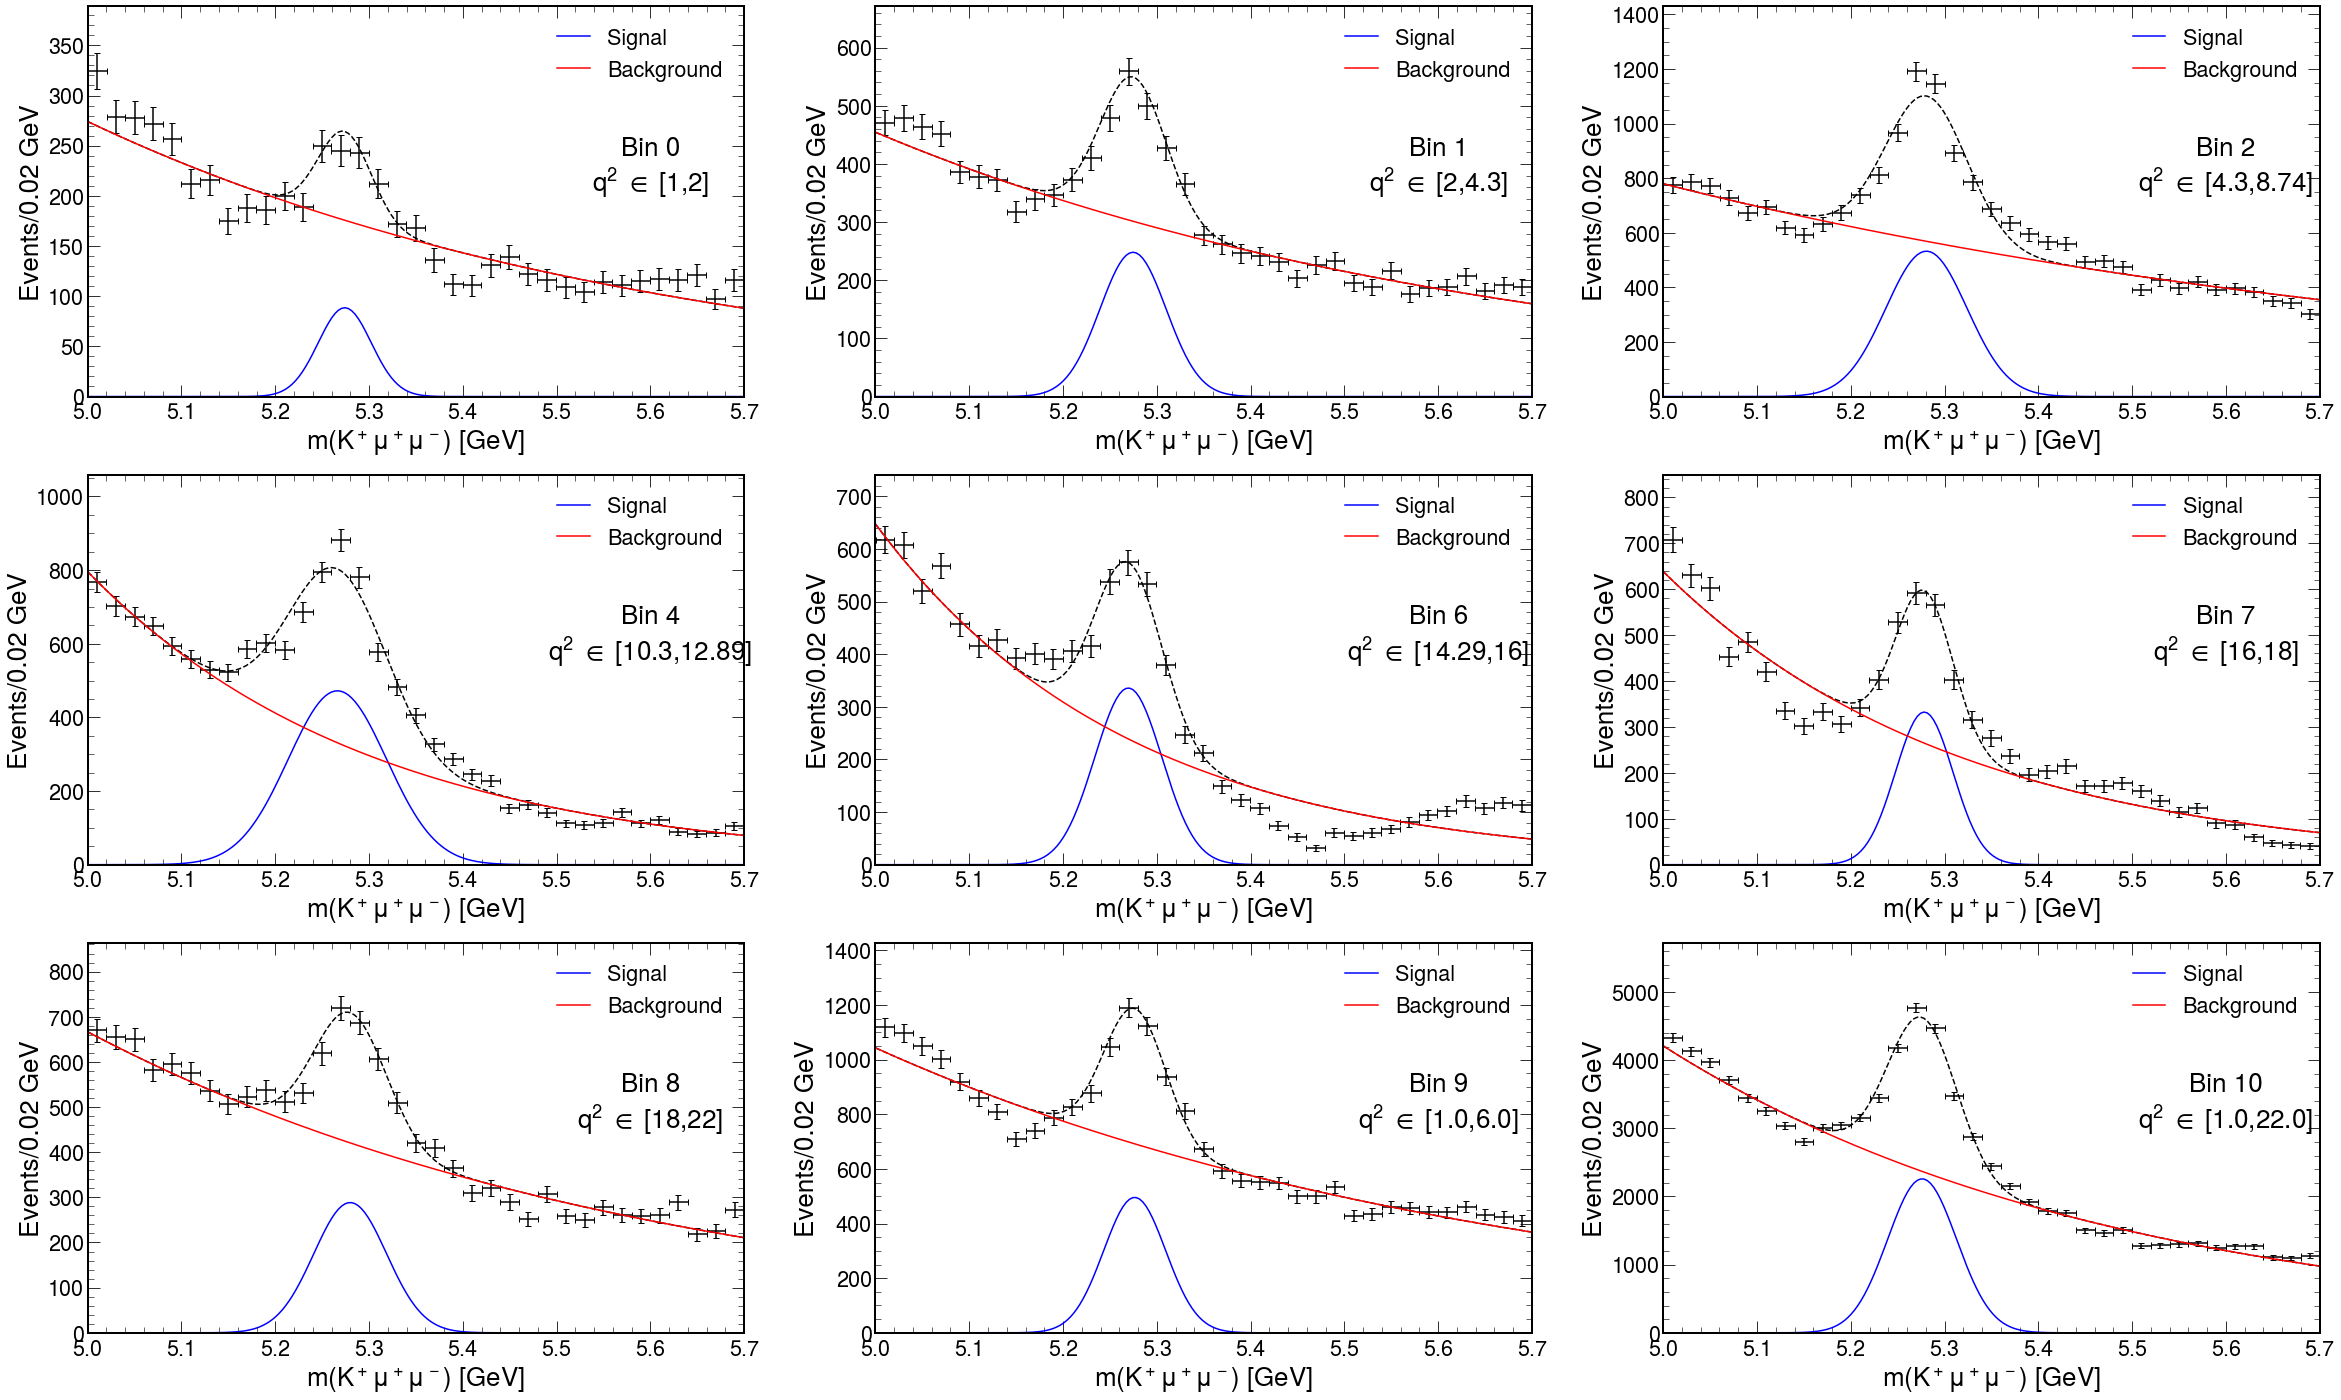

In [50]:
m = np.linspace(5, 5.7, number)
figsz = 40
figura = plt.figure(figsize=(figsz,figsz*0.61))
i=1
for k, dataf in dataDF.items():
        
    if k in [3, 5]: continue


    _1 = figura.add_subplot(3,3,i)
    mass_data = np.histogram(dataf.Bmass, bins=35)
    binsX = (mass_data[1][:-1]+mass_data[1][1:])/2
    binsSize = binsX[1]-binsX[0]
    _1.errorbar(binsX, mass_data[0], xerr=binsSize/2, yerr=np.sqrt(mass_data[0]), ls='none', capsize=3, color='black')

    if k in mass_plots['projection']:
        mass_proj = mass_plots['projection'][k]
    else:
        print('calculating1')
        mass_proj = v_mass_p(m, k)    
        mass_plots['projection'][k] = mass_proj
    _1.plot(m, mass_proj*binsSize*len(dataf), color='black', ls='--')

    if k in mass_plots['signal']:
        mass_signal = mass_plots['signal'][k]
    else:
        print('calculating2')
        mass_signal = v_mass_signal(m, k)
        mass_plots['signal'][k] = mass_signal
    _1.plot(m, mass_signal*binsSize*len(dataf), color='blue', label='Signal')


    if k in mass_plots['background']:
        mass_signal = mass_plots['background'][k]
    else:
        print('calculating3')
        mass_background = v_mass_background(m, k)
        mass_plots['background'][k] = mass_background
    _1.plot(m, mass_background*binsSize*len(dataf), color='red', label='Background')

    _1.set_ylim(0, 1.2*max(mass_data[0]))
    _1.set_xlim(5, 5.7)
    _1.set_xlabel(r'm($K^+\mu^+\mu^-$) [GeV]')
    r = np.round(binsSize, 3)
    _1.set_ylabel(f'Events/{str(r)[:8]} GeV')
    _1.legend()
    _1.text(5.6, max(mass_data[0])*0.7,f'Bin {k}\n$q^2$ $\in$ [{bins[k][0]},{bins[k][1]}]', fontweight=50 ,
        horizontalalignment='center',
        verticalalignment='center',
          fontsize=26,)
    #_1.title(f'Bin {k}')
    i+=1
plt.savefig('mass_projections.png', bbox_inches='tight', transparent=1)

calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a 

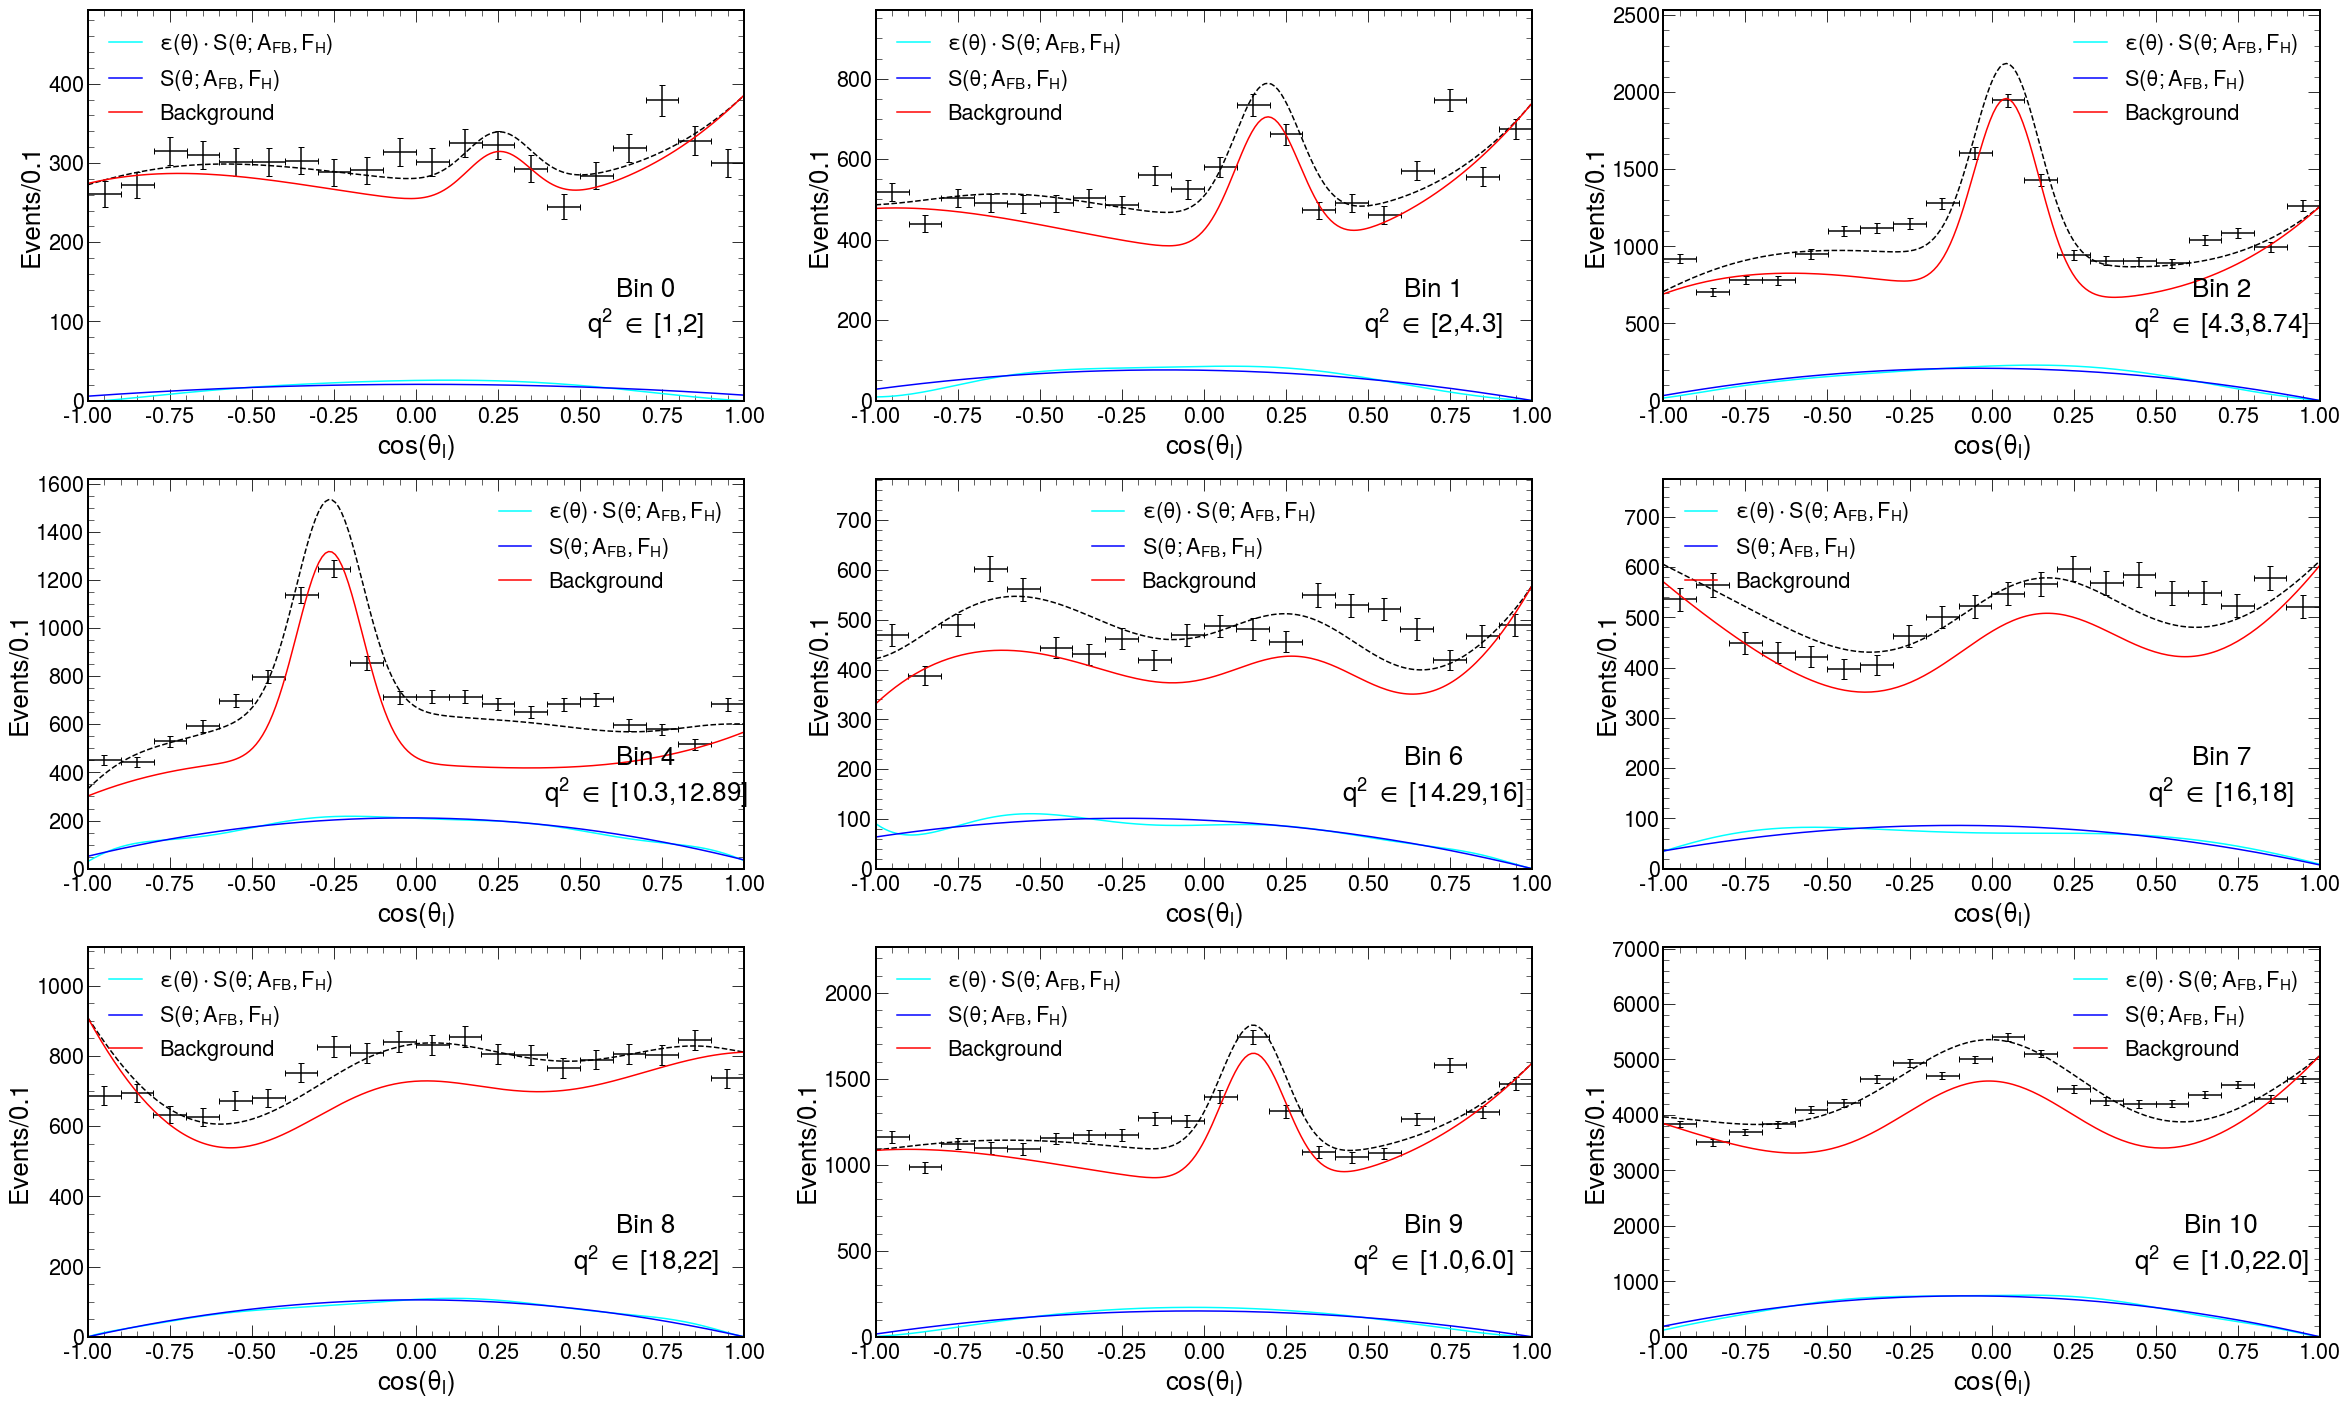

In [59]:
t = np.linspace(-1,1,number)
figsz = 40
figura = plt.figure(figsize=(figsz,figsz*0.61))
i=1
for k, dataf in dataDF.items():
        
    if k in [3, 5]: continue
        
    _2 = figura.add_subplot(3,3,i)
    ang_data = np.histogram(dataf.cos_l, bins=20)
    binsX = (ang_data[1][:-1]+ang_data[1][1:])/2
    binsSize = binsX[1]-binsX[0]
    _2.errorbar(binsX, ang_data[0], xerr=binsSize/2, yerr=np.sqrt(ang_data[0]), ls='none', capsize=3, color='black')

    if k in angle_plots['projection']:
        angular_proj = angle_plots['projection'][k]
    else:
        print('calculating4')
        angular_proj = v_angular_p(t, k)   
        angle_plots['projection'][k] = angular_proj
    _2.plot(t, angular_proj*binsSize*len(dataf), color='black', ls='--')


    if k in angle_plots['signal']:
        angular_signal = angle_plots['signal'][k]
    else:
        print('calculating5')
        angular_signal = v_angular_signal(t, k)   
        angle_plots['signal'][k] = angular_signal
    _2.plot(t, angular_signal*binsSize*len(dataf), color='cyan', label=r'$\epsilon(\theta)\cdot S(\theta;A_{FB}, F_{H})$')

    if k in angle_plots['only_signal']:
        angular_only_signal = angle_plots['only_signal'][k]
    else:
        print('calculating5-2')
        angular_only_signal = v_angular_only_signal(t, k)   
        angle_plots['only_signal'][k] = angular_only_signal
    _2.plot(t, angular_only_signal*binsSize*len(dataf), color='blue', label=r'S$(\theta;A_{FB}, F_{H})$')


    if k in angle_plots['background']:
        angular_background = angle_plots['background'][k]
    else:
        print('calculating6')
        angular_background = v_angular_background(t, k) 
        angle_plots['background'][k] = angular_background
    _2.plot(t, angular_background*binsSize*len(dataf), color='red', label='Background')

    _2.set_ylim(0, 1.3*max(ang_data[0]))
    _2.set_xlim(-1, 1)
    _2.set_xlabel(r'$\cos(\theta_l)$')
    r = np.round(binsSize, 3)
    _2.set_ylabel(f'Events/{str(r)[:8]}')
    _2.legend()
    _2.text(0.7, max(ang_data[0])*0.3,f'Bin {k}\n$q^2$ $\in$ [{bins[k][0]},{bins[k][1]}]', fontweight=50 ,
        horizontalalignment='center',
        verticalalignment='center',
          fontsize=26,)
    i+=1
plt.savefig('angular_projections.png', bbox_inches='tight', transparent=1)

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


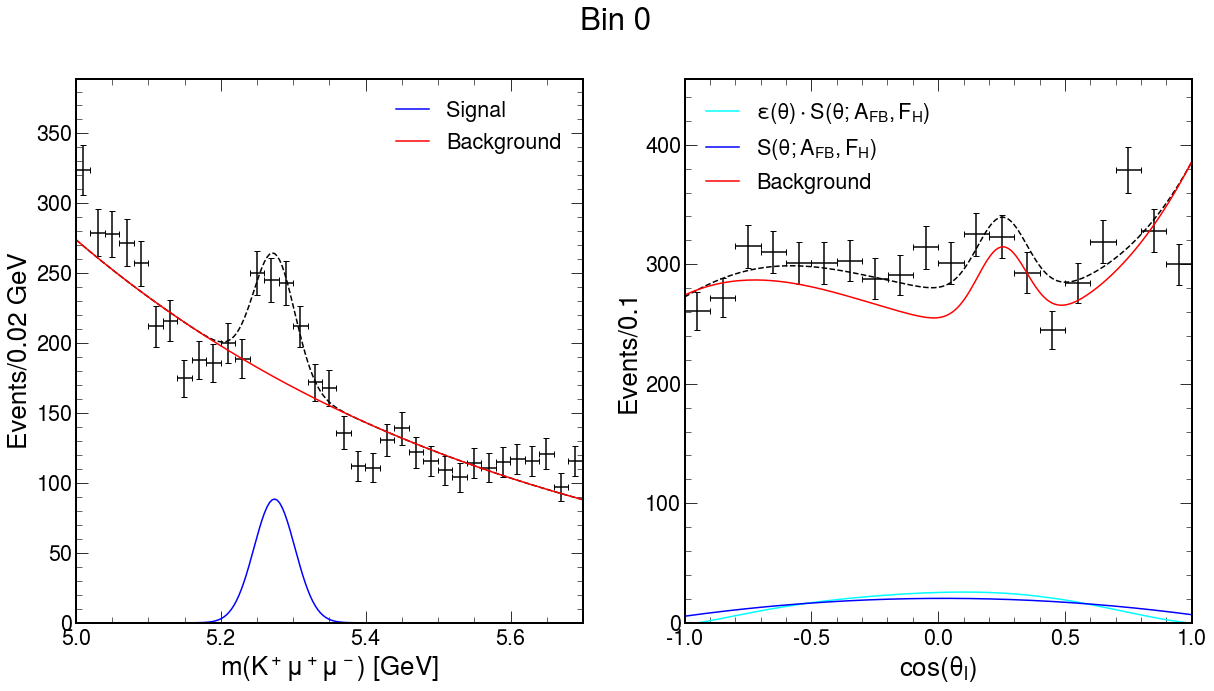

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


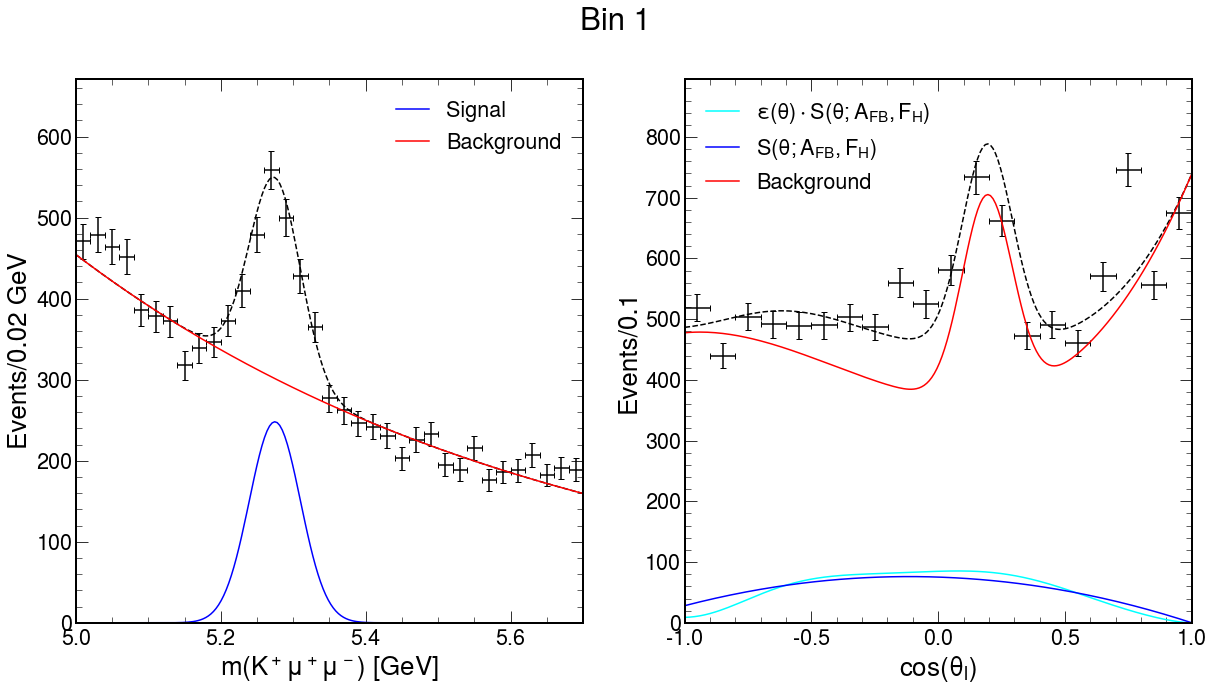

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


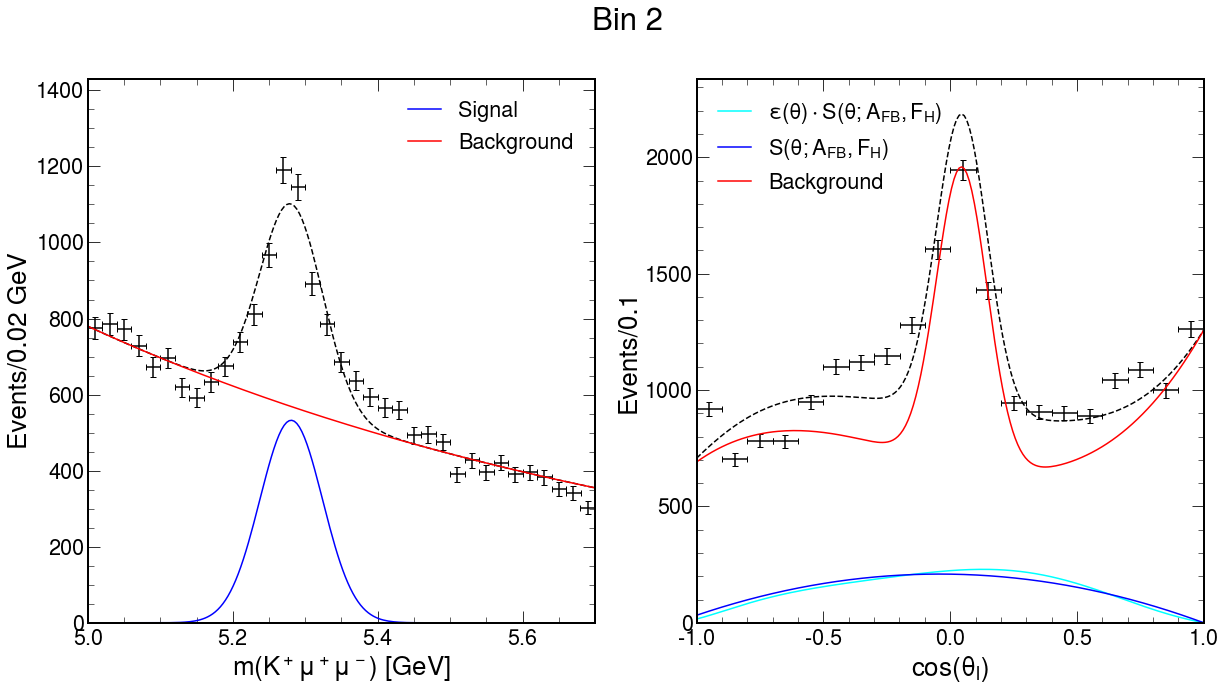

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


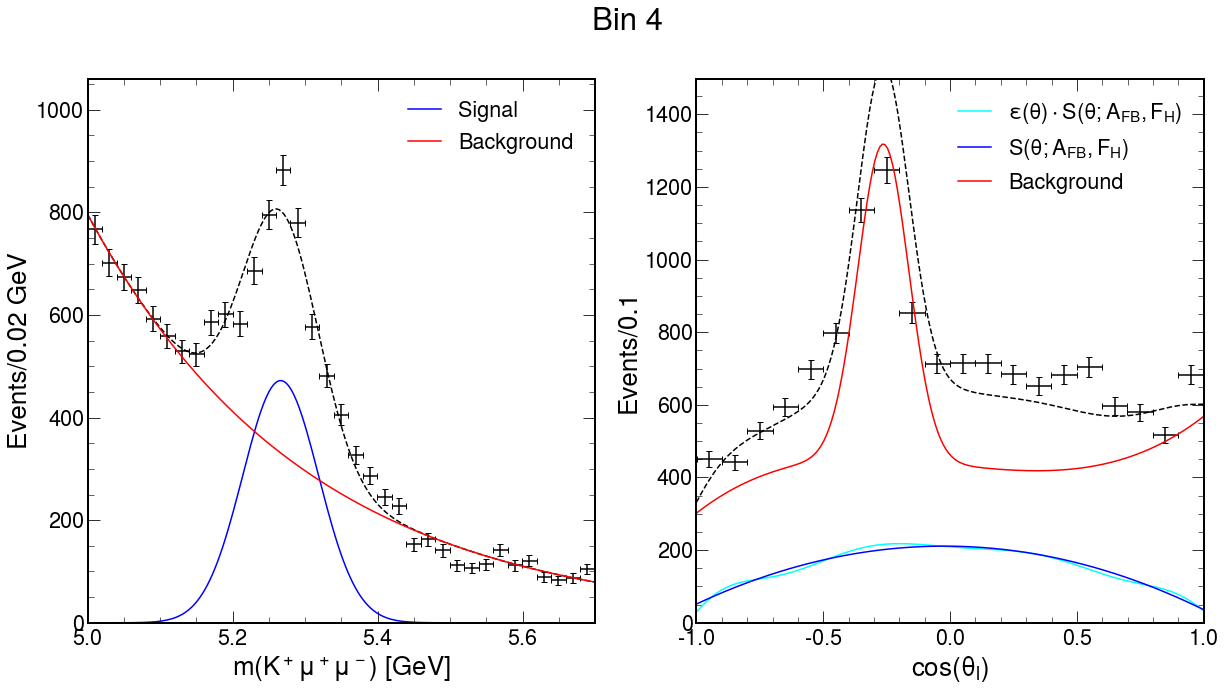

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


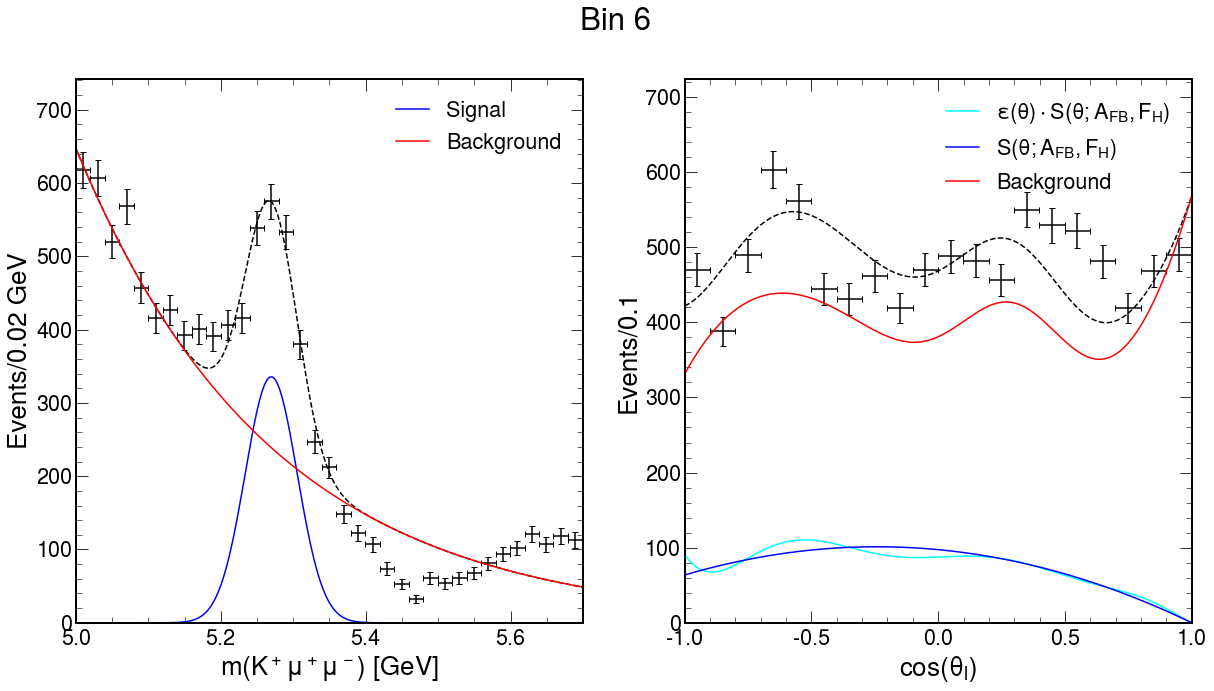

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


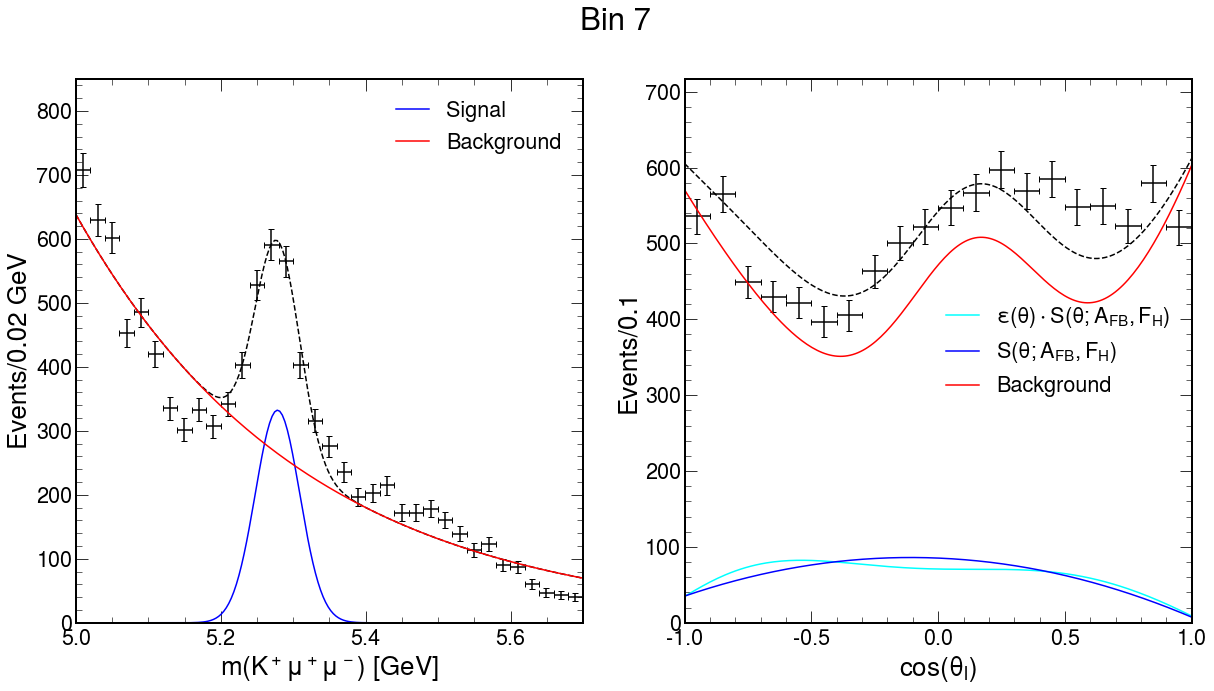

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


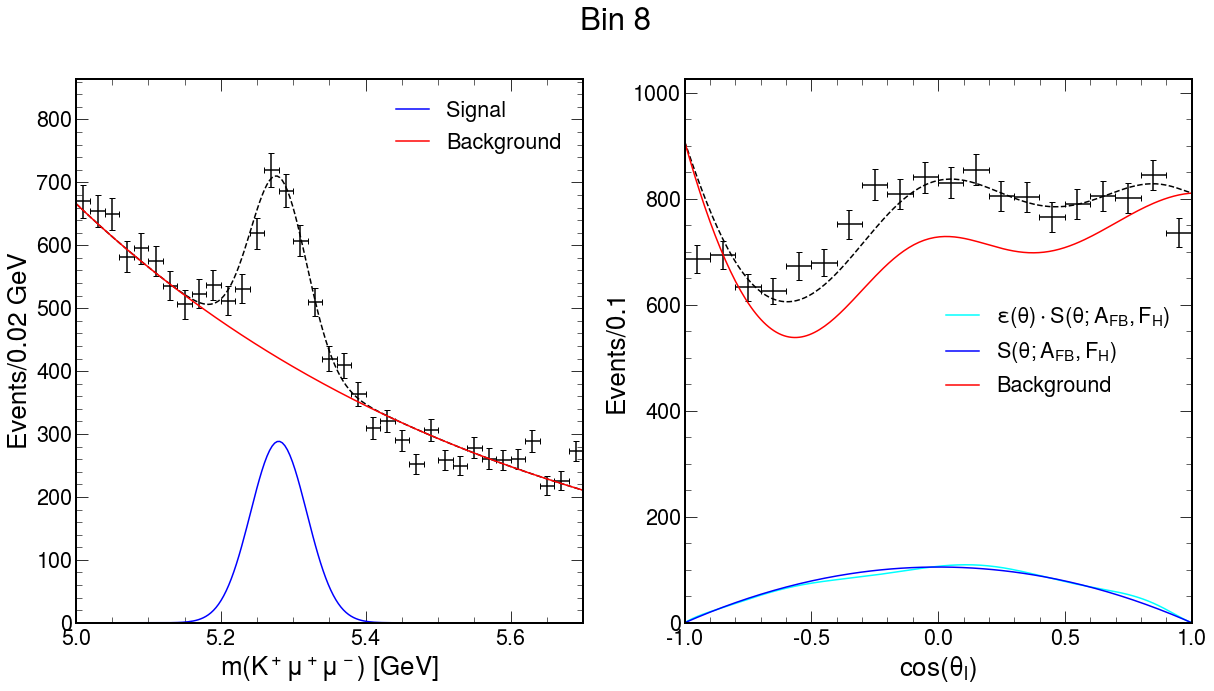

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


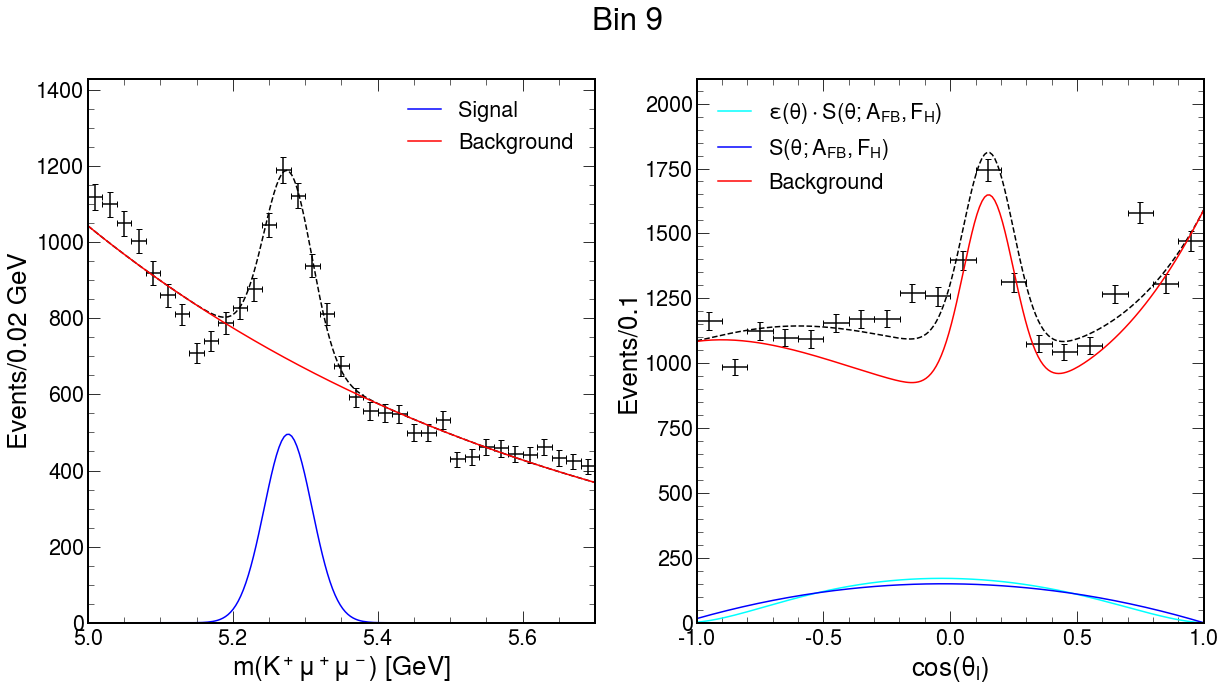

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


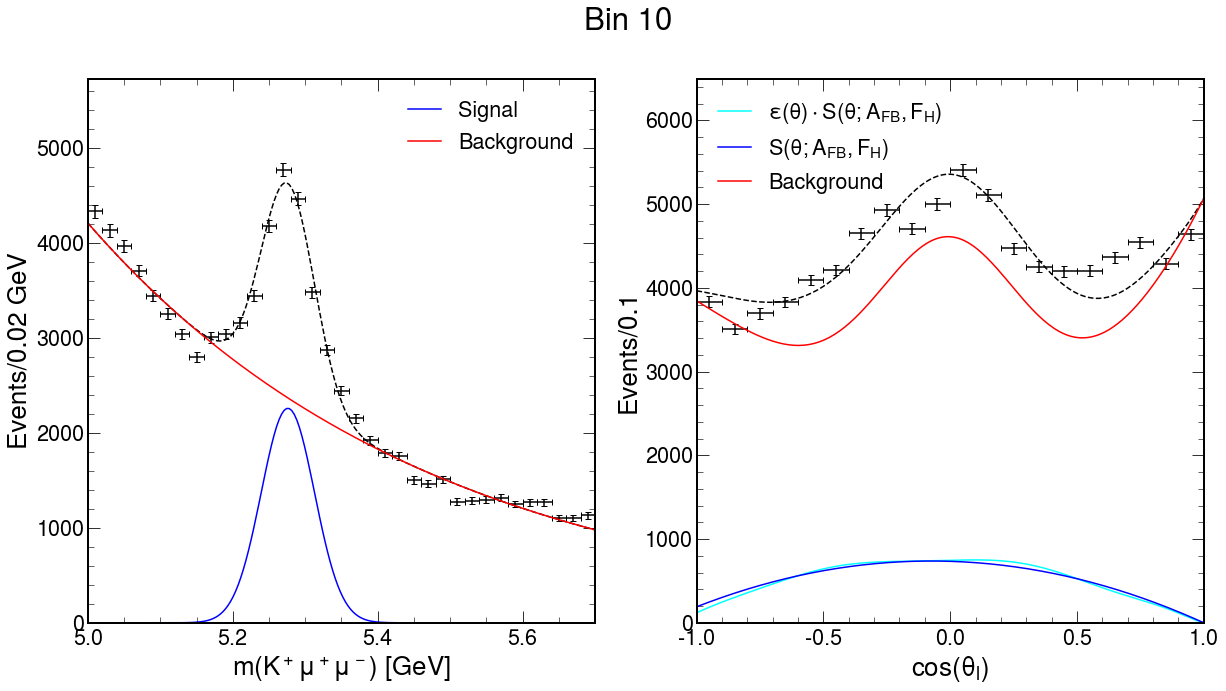

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [42]:
number=200
m = np.linspace(5, 5.7, number)
t = np.linspace(-1,1,number)


with PdfPages('projections_labels_update.pdf') as pdf:

    for k, dataf in dataDF.items():
        
        if k in [3, 5]: continue

        figura = plt.figure(figsize=(20,10))
        figura.suptitle(f'Bin {k}')    

        _1 = figura.add_subplot(121)
        mass_data = np.histogram(dataf.Bmass, bins=35)
        binsX = (mass_data[1][:-1]+mass_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _1.errorbar(binsX, mass_data[0], xerr=binsSize/2, yerr=np.sqrt(mass_data[0]), ls='none', capsize=3, color='black')

        if k in mass_plots['projection']:
            mass_proj = mass_plots['projection'][k]
        else:
            print('calculating1')
            mass_proj = v_mass_p(m, k)    
            mass_plots['projection'][k] = mass_proj
        _1.plot(m, mass_proj*binsSize*len(dataf), color='black', ls='--')

        if k in mass_plots['signal']:
            mass_signal = mass_plots['signal'][k]
        else:
            print('calculating2')
            mass_signal = v_mass_signal(m, k)
            mass_plots['signal'][k] = mass_signal
        _1.plot(m, mass_signal*binsSize*len(dataf), color='blue', label='Signal')

        
        if k in mass_plots['background']:
            mass_signal = mass_plots['background'][k]
        else:
            print('calculating3')
            mass_background = v_mass_background(m, k)
            mass_plots['background'][k] = mass_background
        _1.plot(m, mass_background*binsSize*len(dataf), color='red', label='Background')

        _1.set_ylim(0, 1.2*max(mass_data[0]))
        _1.set_xlim(5, 5.7)
        _1.set_xlabel(r'm($K^+\mu^+\mu^-$) [GeV]')
        r = np.round(binsSize, 3)
        _1.set_ylabel(f'Events/{str(r)[:8]} GeV')
        _1.legend()
        #_1.title(f'Bin {k}')



        _2 = figura.add_subplot(122)
        ang_data = np.histogram(dataf.cos_l, bins=20)
        binsX = (ang_data[1][:-1]+ang_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _2.errorbar(binsX, ang_data[0], xerr=binsSize/2, yerr=np.sqrt(ang_data[0]), ls='none', capsize=3, color='black')

        if k in angle_plots['projection']:
            angular_proj = angle_plots['projection'][k]
        else:
            print('calculating4')
            angular_proj = v_angular_p(t, k)   
            angle_plots['projection'][k] = angular_proj
        _2.plot(t, angular_proj*binsSize*len(dataf), color='black', ls='--')


        if k in angle_plots['signal']:
            angular_signal = angle_plots['signal'][k]
        else:
            print('calculating5')
            angular_signal = v_angular_signal(t, k)   
            angle_plots['signal'][k] = angular_signal
        _2.plot(t, angular_signal*binsSize*len(dataf), color='cyan', label=r'$\epsilon(\theta)\cdot S(\theta;A_{FB}, F_{H})$')

        if k in angle_plots['only_signal']:
            angular_only_signal = angle_plots['only_signal'][k]
        else:
            print('calculating5-2')
            angular_only_signal = v_angular_only_signal(t, k)   
            angle_plots['only_signal'][k] = angular_only_signal
        _2.plot(t, angular_only_signal*binsSize*len(dataf), color='blue', label=r'S$(\theta;A_{FB}, F_{H})$')

        
        if k in angle_plots['background']:
            angular_background = angle_plots['background'][k]
        else:
            print('calculating6')
            angular_background = v_angular_background(t, k) 
            angle_plots['background'][k] = angular_background
        _2.plot(t, angular_background*binsSize*len(dataf), color='red', label='Background')

        _2.set_ylim(0, 1.2*max(ang_data[0]))
        _2.set_xlim(-1, 1)
        _2.set_xlabel(r'$\cos(\theta_l)$')
        r = np.round(binsSize, 3)
        _2.set_ylabel(f'Events/{str(r)[:8]}')
        _2.legend()
        #plt.title(f'Bin {k}')
        
        pdf.savefig()
        plt.show()

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


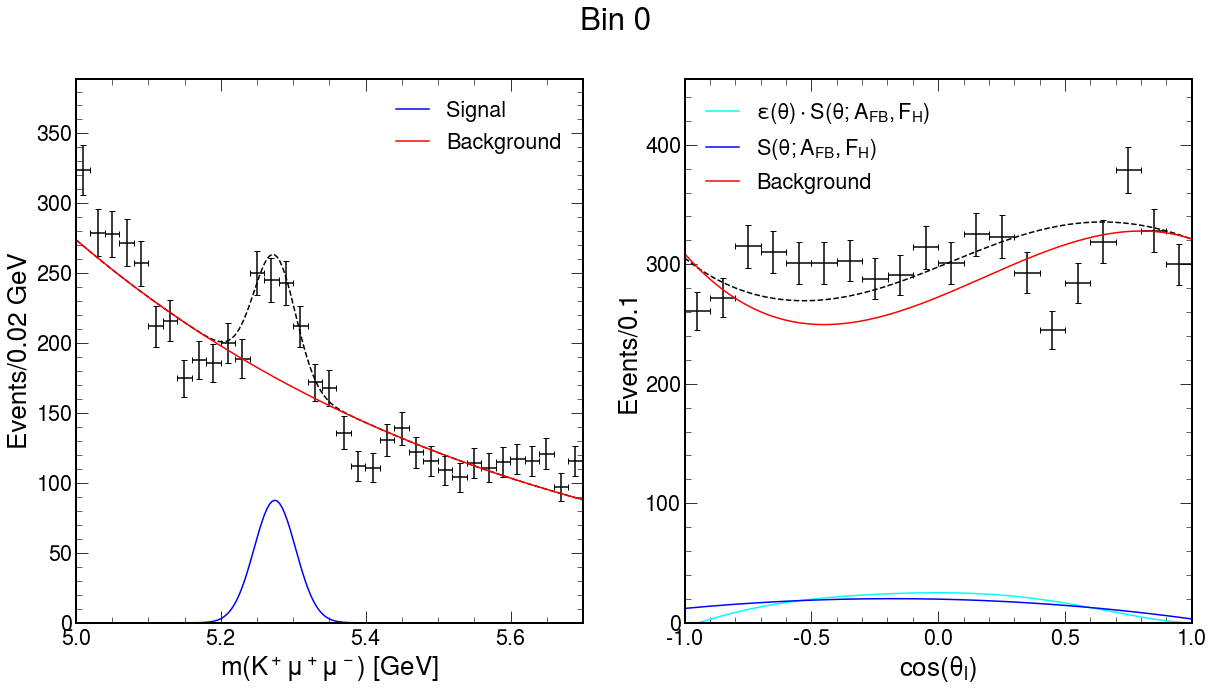

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


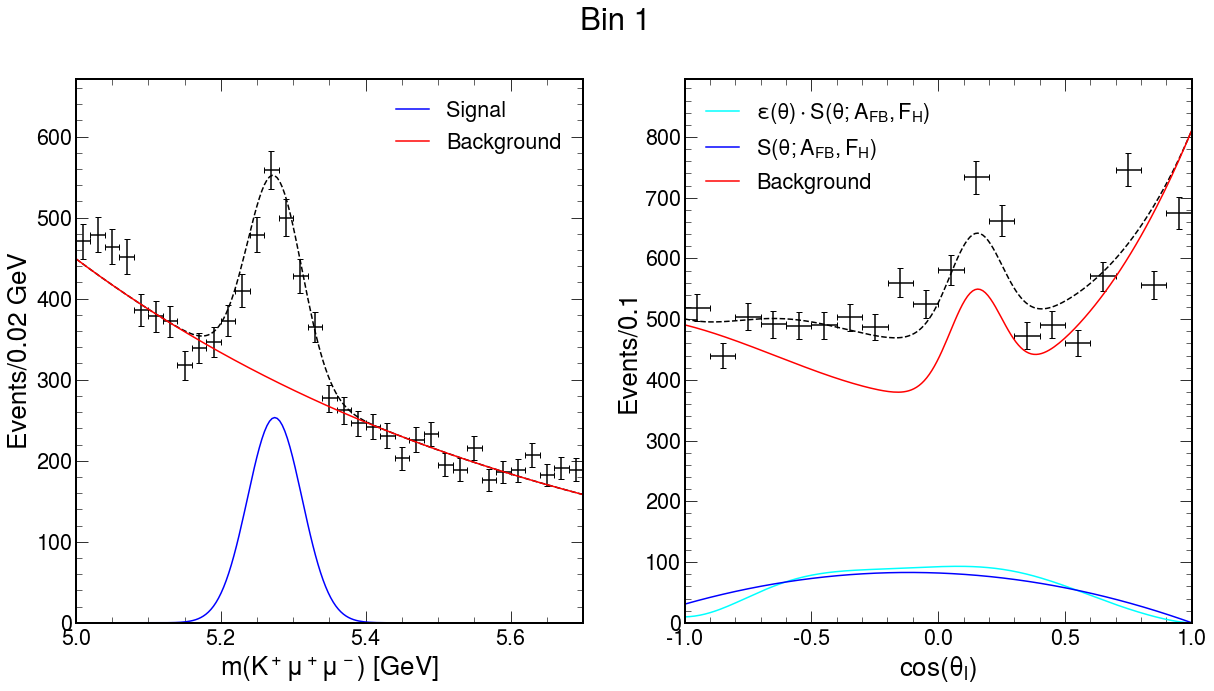

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


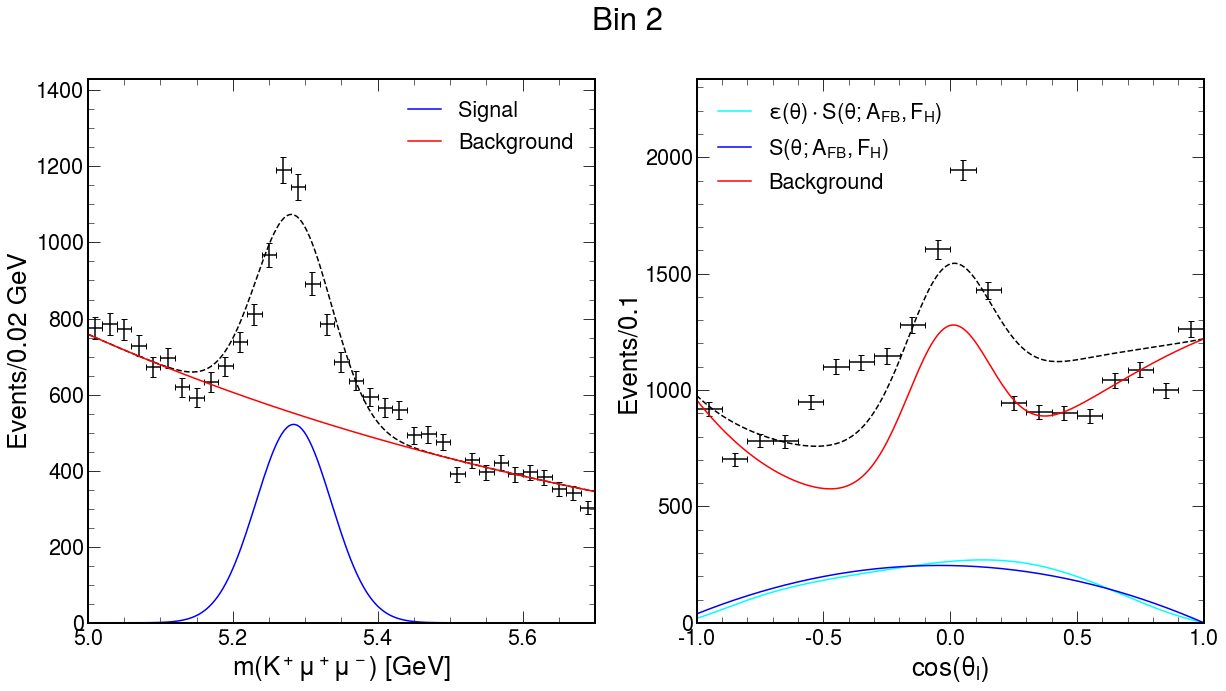

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


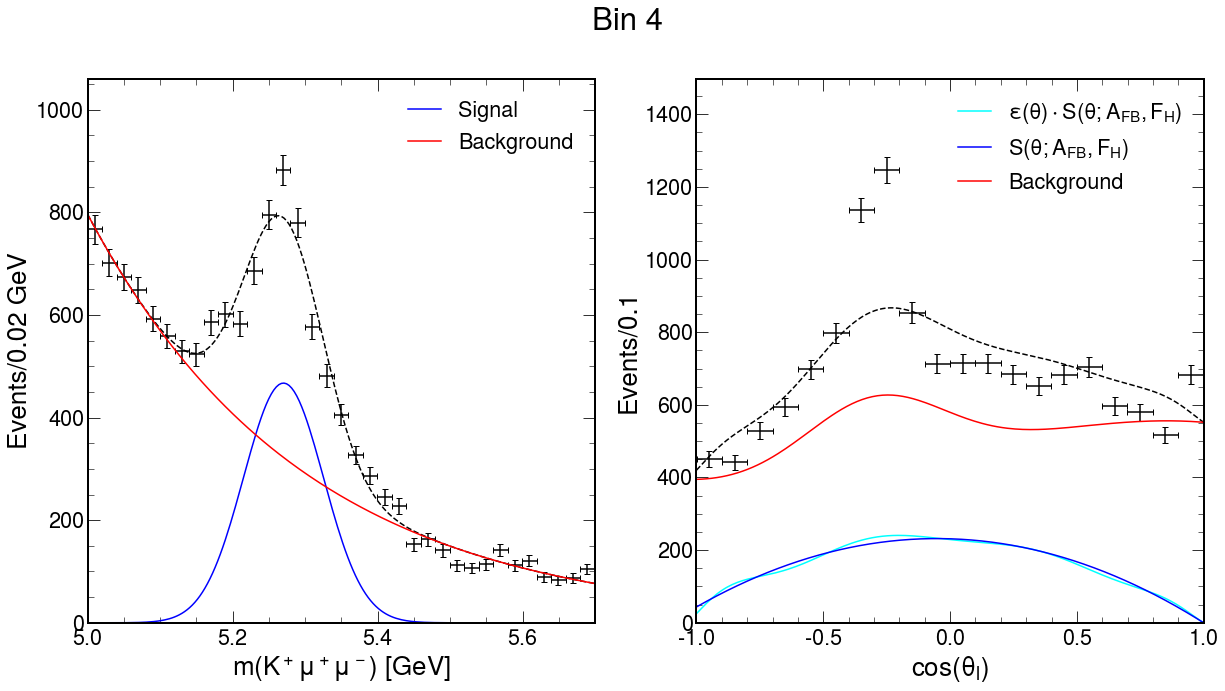

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


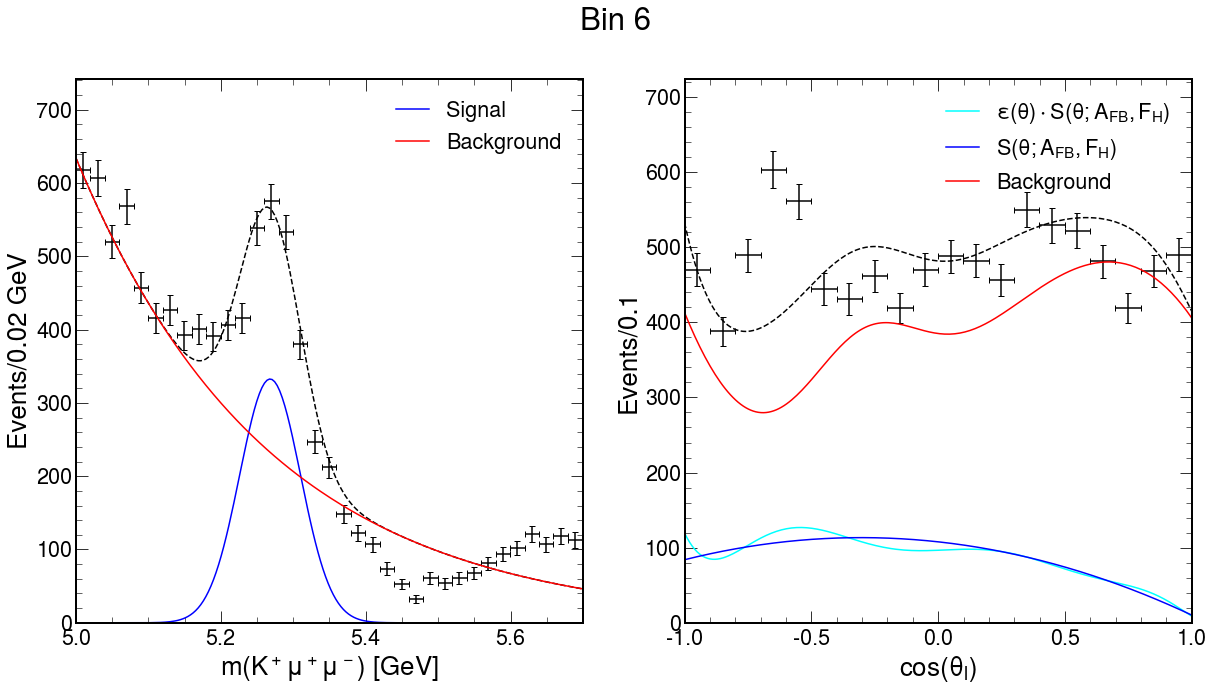

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


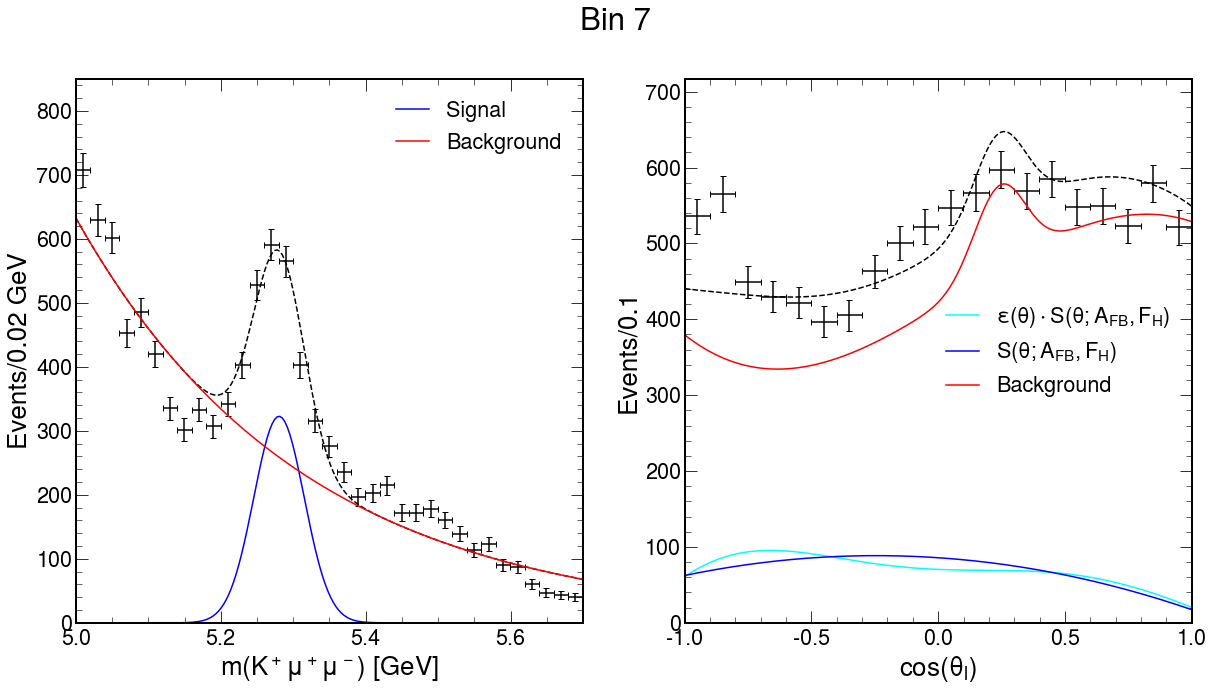

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


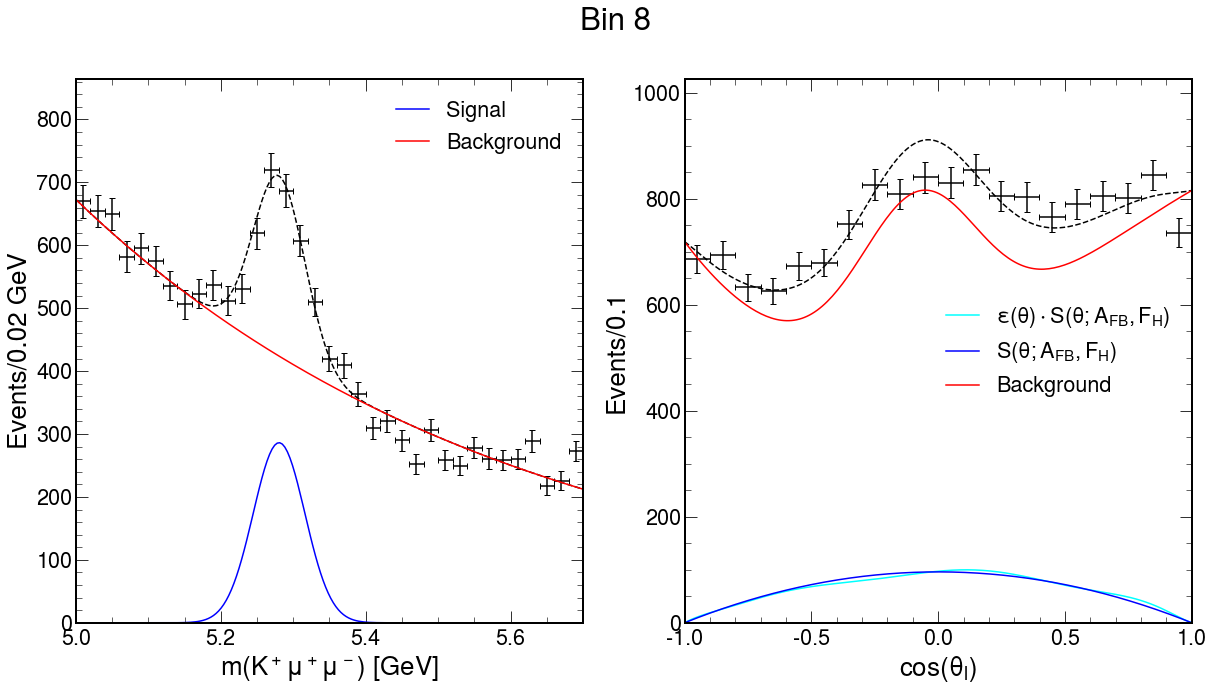

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


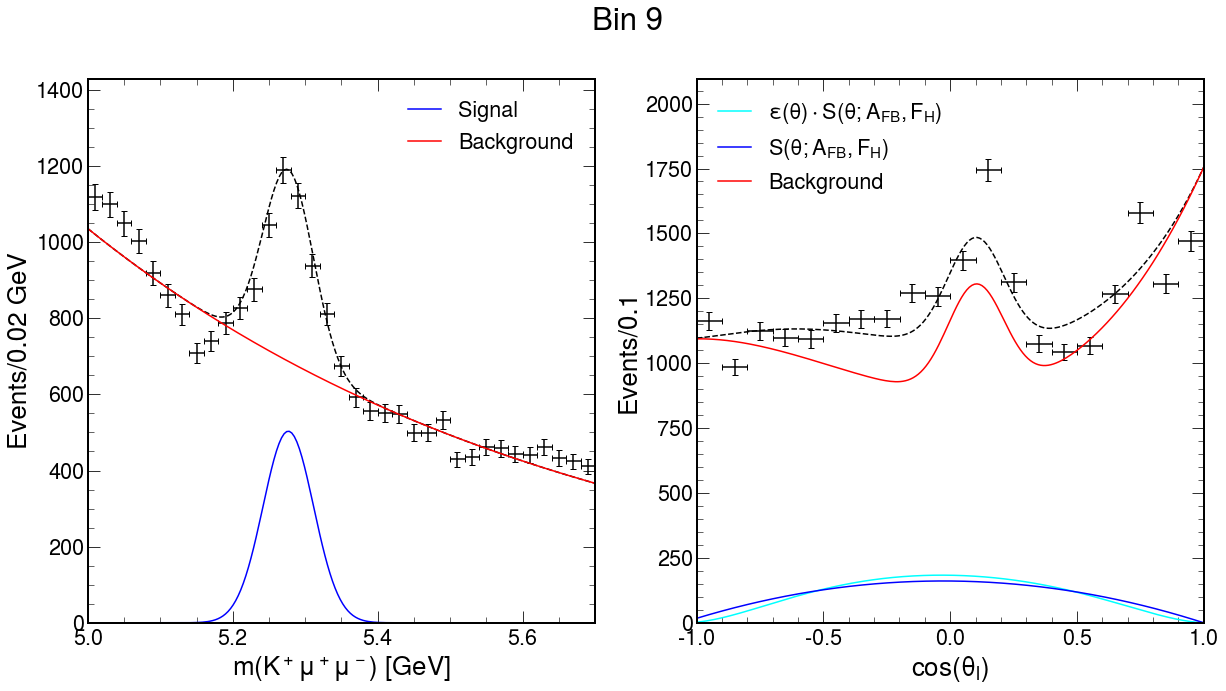

calculating1
calculating2
calculating3
calculating4
calculating5
calculating5-2
calculating6


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


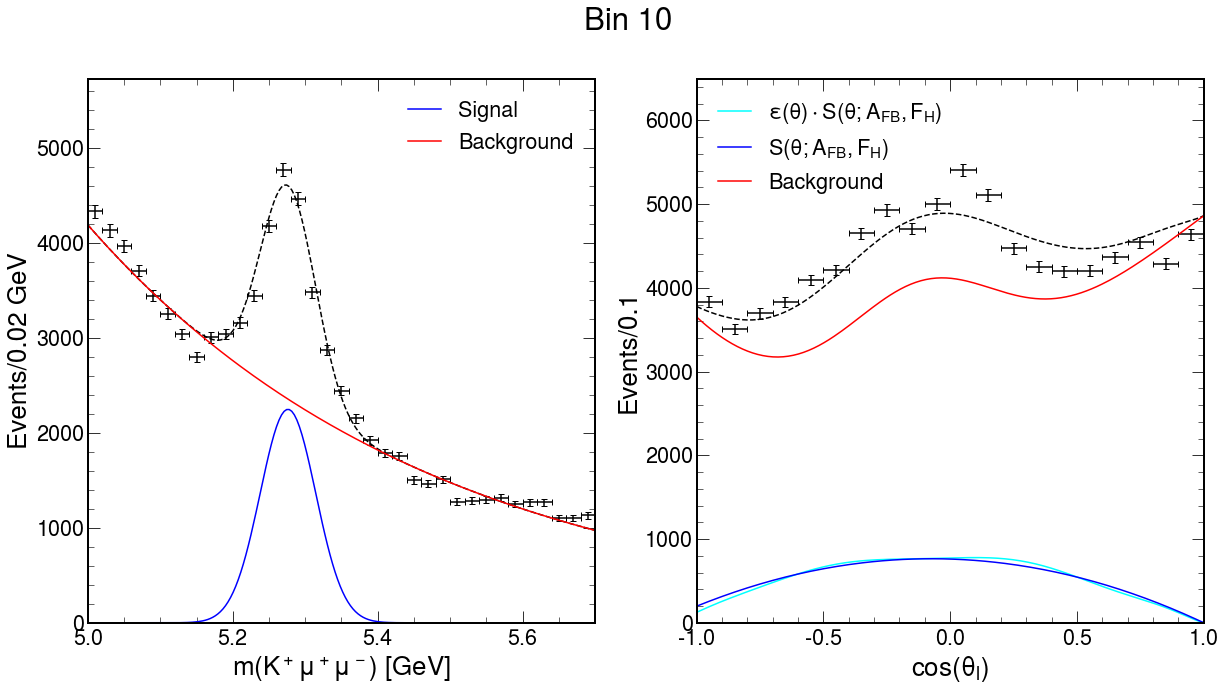

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [32]:
number=200
m = np.linspace(5, 5.7, number)
t = np.linspace(-1,1,number)


with PdfPages('projections_labels_update.pdf') as pdf:

    for k, dataf in dataDF.items():
        
        if k in [3, 5]: continue

        figura = plt.figure(figsize=(20,10))
        figura.suptitle(f'Bin {k}')    

        _1 = figura.add_subplot(121)
        mass_data = np.histogram(dataf.Bmass, bins=35)
        binsX = (mass_data[1][:-1]+mass_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _1.errorbar(binsX, mass_data[0], xerr=binsSize/2, yerr=np.sqrt(mass_data[0]), ls='none', capsize=3, color='black')

        if k in mass_plots['projection']:
            mass_proj = mass_plots['projection'][k]
        else:
            print('calculating1')
            mass_proj = v_mass_p(m, k)    
            mass_plots['projection'][k] = mass_proj
        _1.plot(m, mass_proj*binsSize*len(dataf), color='black', ls='--')

        if k in mass_plots['signal']:
            mass_signal = mass_plots['signal'][k]
        else:
            print('calculating2')
            mass_signal = v_mass_signal(m, k)
            mass_plots['signal'][k] = mass_signal
        _1.plot(m, mass_signal*binsSize*len(dataf), color='blue', label='Signal')

        
        if k in mass_plots['background']:
            mass_signal = mass_plots['background'][k]
        else:
            print('calculating3')
            mass_background = v_mass_background(m, k)
            mass_plots['background'][k] = mass_background
        _1.plot(m, mass_background*binsSize*len(dataf), color='red', label='Background')

        _1.set_ylim(0, 1.2*max(mass_data[0]))
        _1.set_xlim(5, 5.7)
        _1.set_xlabel(r'm($K^+\mu^+\mu^-$) [GeV]')
        r = np.round(binsSize, 3)
        _1.set_ylabel(f'Events/{str(r)[:8]} GeV')
        _1.legend()
        #_1.title(f'Bin {k}')



        _2 = figura.add_subplot(122)
        ang_data = np.histogram(dataf.cos_l, bins=20)
        binsX = (ang_data[1][:-1]+ang_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _2.errorbar(binsX, ang_data[0], xerr=binsSize/2, yerr=np.sqrt(ang_data[0]), ls='none', capsize=3, color='black')

        if k in angle_plots['projection']:
            angular_proj = angle_plots['projection'][k]
        else:
            print('calculating4')
            angular_proj = v_angular_p(t, k)   
            angle_plots['projection'][k] = angular_proj
        _2.plot(t, angular_proj*binsSize*len(dataf), color='black', ls='--')


        if k in angle_plots['signal']:
            angular_signal = angle_plots['signal'][k]
        else:
            print('calculating5')
            angular_signal = v_angular_signal(t, k)   
            angle_plots['signal'][k] = angular_signal
        _2.plot(t, angular_signal*binsSize*len(dataf), color='cyan', label=r'$\epsilon(\theta)\cdot S(\theta;A_{FB}, F_{H})$')

        if k in angle_plots['only_signal']:
            angular_only_signal = angle_plots['only_signal'][k]
        else:
            print('calculating5-2')
            angular_only_signal = v_angular_only_signal(t, k)   
            angle_plots['only_signal'][k] = angular_only_signal
        _2.plot(t, angular_only_signal*binsSize*len(dataf), color='blue', label=r'S$(\theta;A_{FB}, F_{H})$')

        
        if k in angle_plots['background']:
            angular_background = angle_plots['background'][k]
        else:
            print('calculating6')
            angular_background = v_angular_background(t, k) 
            angle_plots['background'][k] = angular_background
        _2.plot(t, angular_background*binsSize*len(dataf), color='red', label='Background')

        _2.set_ylim(0, 1.2*max(ang_data[0]))
        _2.set_xlim(-1, 1)
        _2.set_xlabel(r'$\cos(\theta_l)$')
        r = np.round(binsSize, 3)
        _2.set_ylabel(f'Events/{str(r)[:8]}')
        _2.legend()
        #plt.title(f'Bin {k}')
        
        pdf.savefig()
        plt.show()


In [195]:
FitResults_

{'bin_0': <symfit.core.fit_results.FitResults at 0x7faa7e125668>,
 'bin_1': <symfit.core.fit_results.FitResults at 0x7faa7d09e828>,
 'bin_2': <symfit.core.fit_results.FitResults at 0x7faa7c6691d0>,
 'bin_4': <symfit.core.fit_results.FitResults at 0x7faa7c6455f8>,
 'bin_6': <symfit.core.fit_results.FitResults at 0x7faa7d29e860>,
 'bin_7': <symfit.core.fit_results.FitResults at 0x7faa7d29e0f0>,
 'bin_8': <symfit.core.fit_results.FitResults at 0x7faa8c76c0b8>,
 'bin_9': <symfit.core.fit_results.FitResults at 0x7faa7fe4d390>,
 'bin_10': <symfit.core.fit_results.FitResults at 0x7faa7cb79518>}

SIGMA :  0.028941191380703793
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


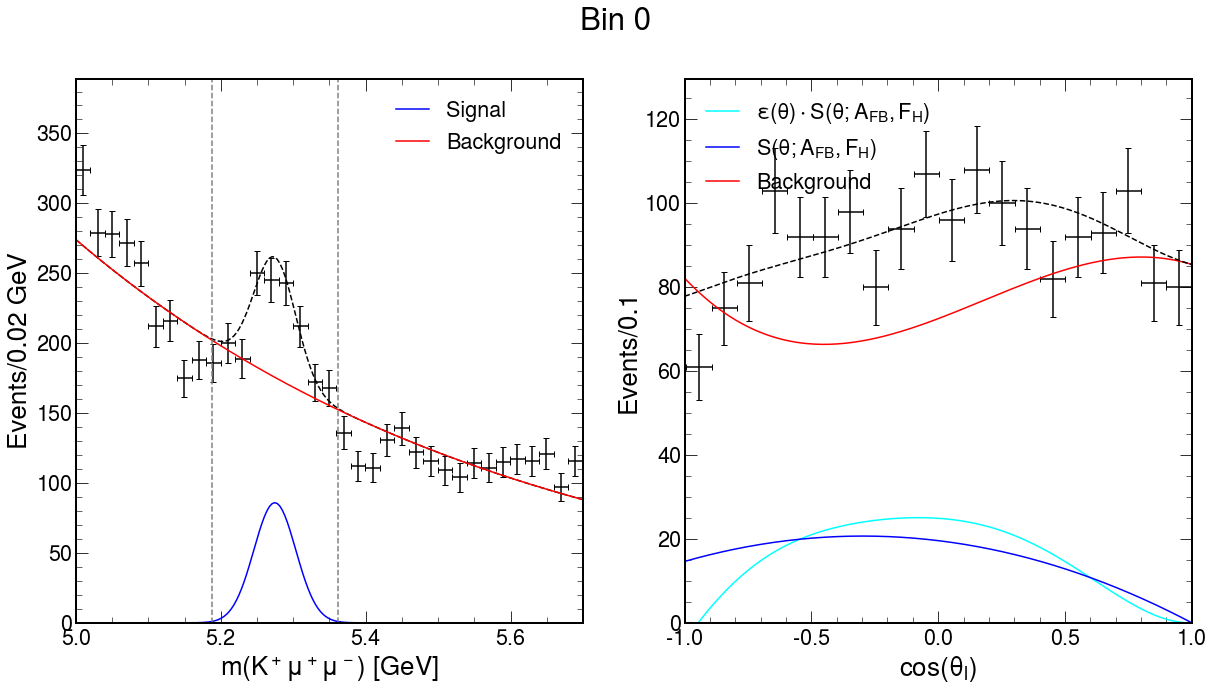

SIGMA :  0.037696198705643474
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


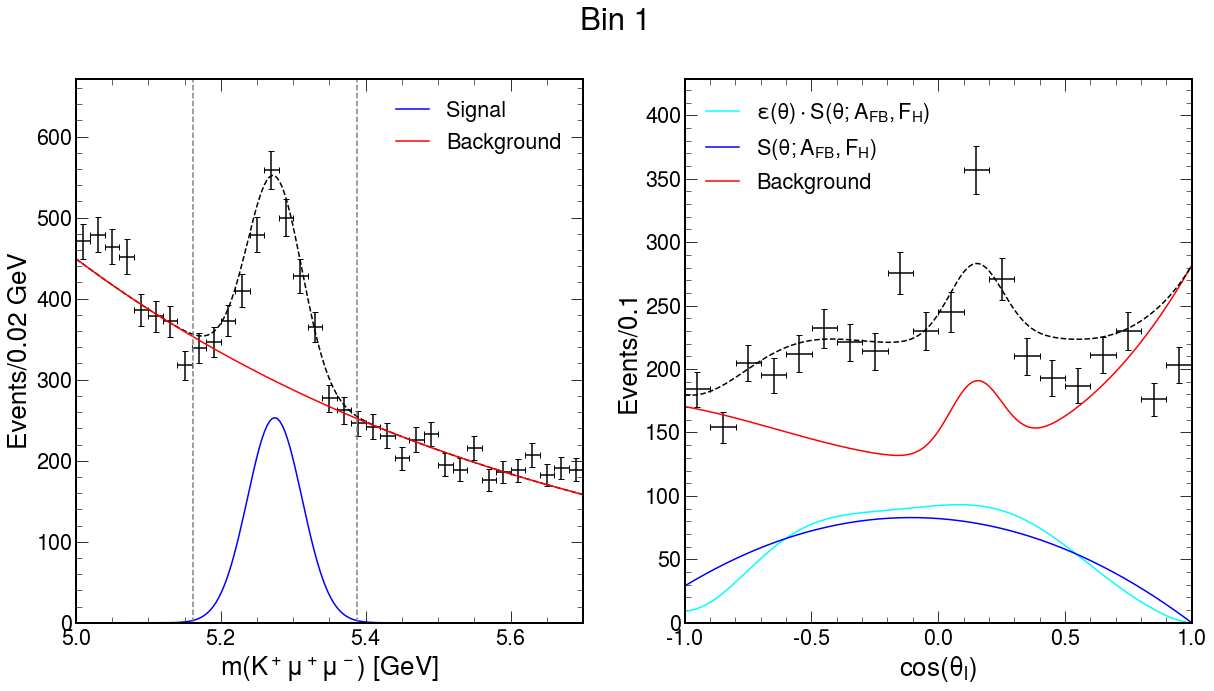

SIGMA :  0.05228159415098661
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


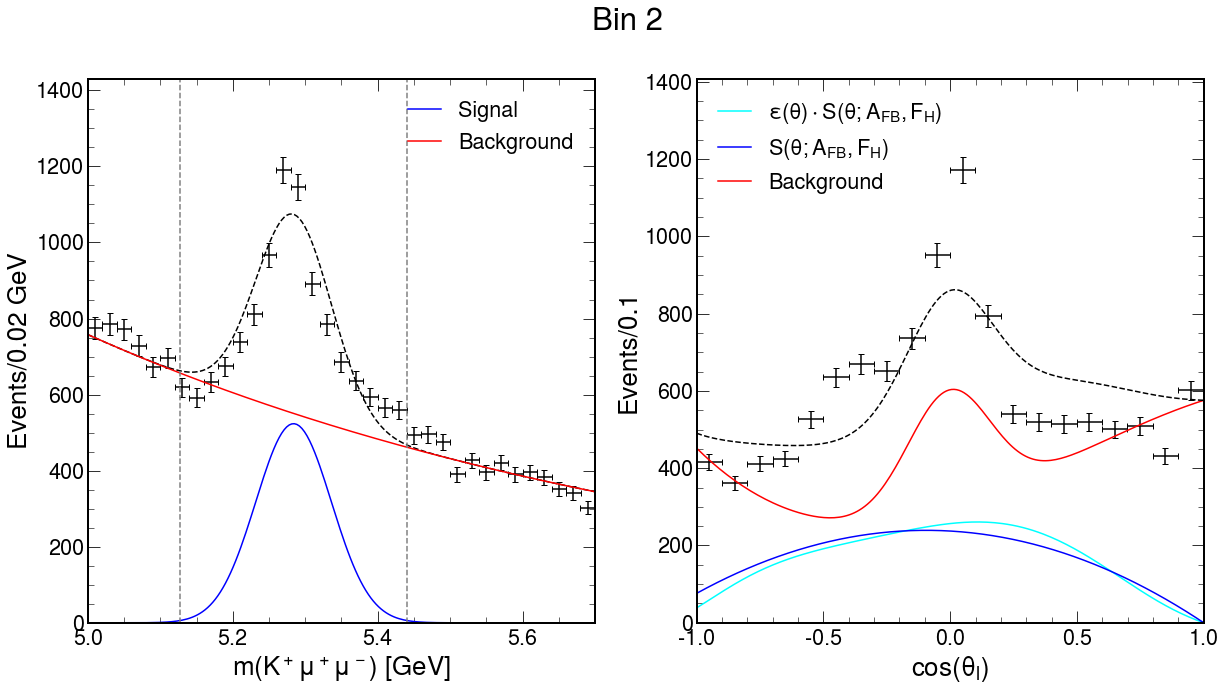

SIGMA :  0.05512477491035063
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


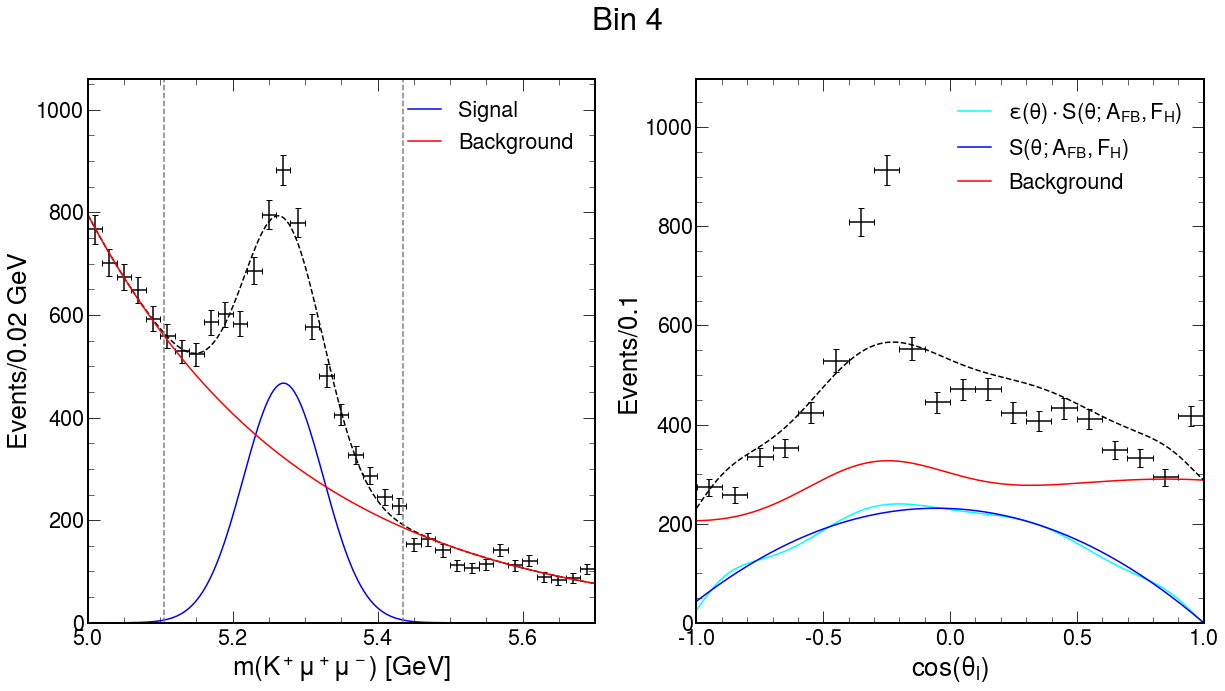

SIGMA :  0.043419771500564565
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


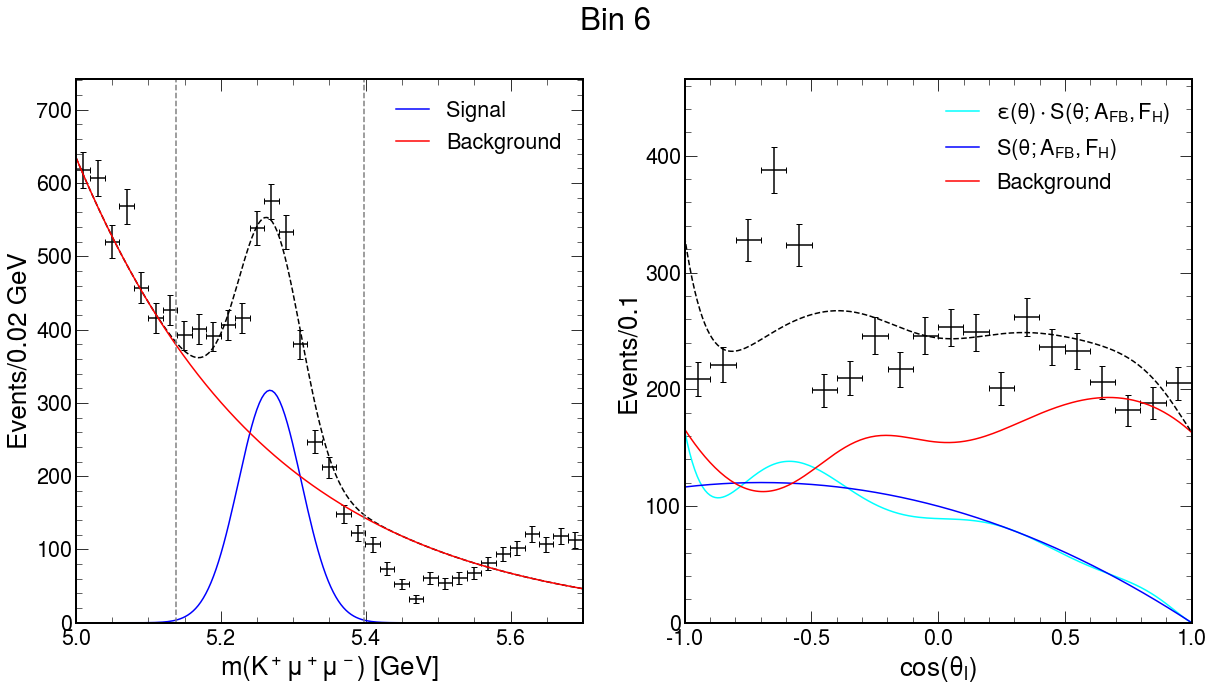

SIGMA :  0.03619815755350853
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


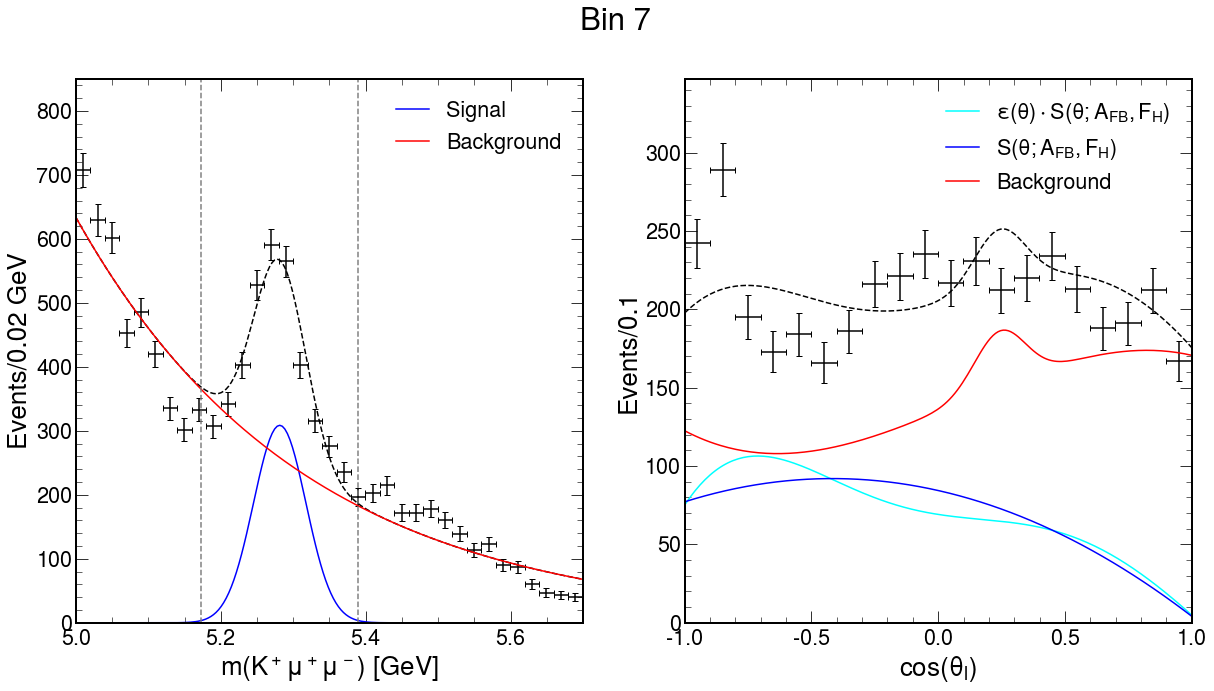

SIGMA :  0.03573944815055113
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


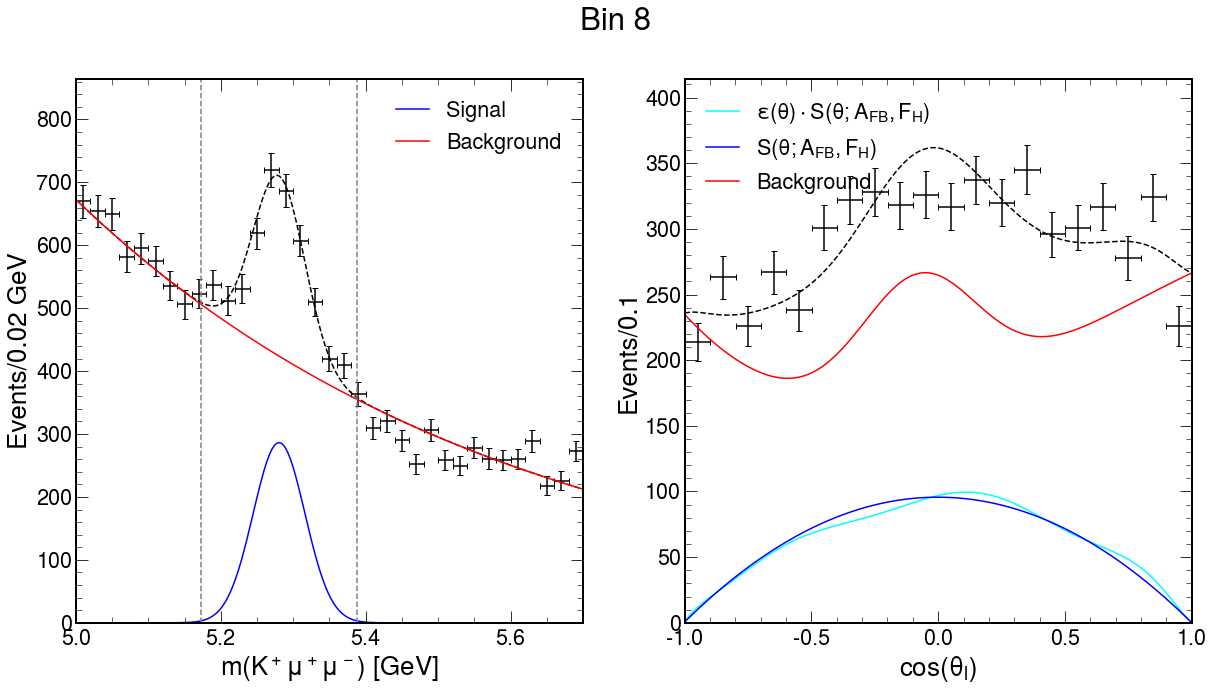

SIGMA :  0.034936193181009385
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


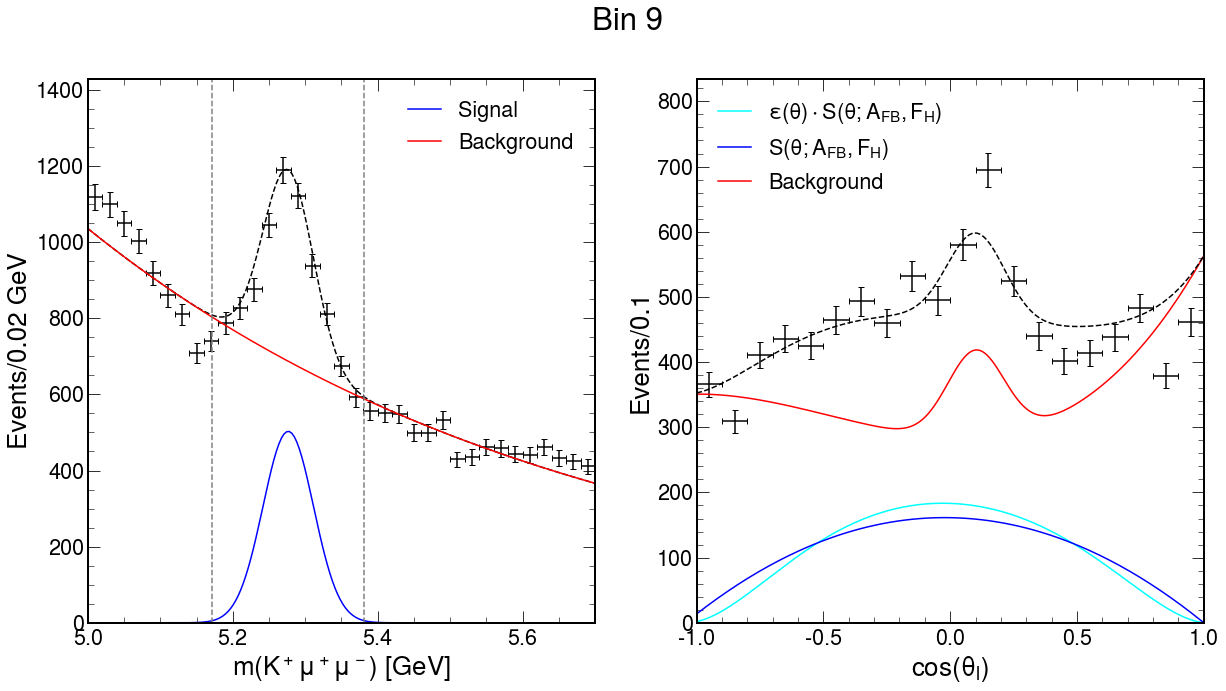

SIGMA :  0.03831240081604498
calculating1
calculating2
calculating3
calculating5
calculating5-2
calculating6
calculating4


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


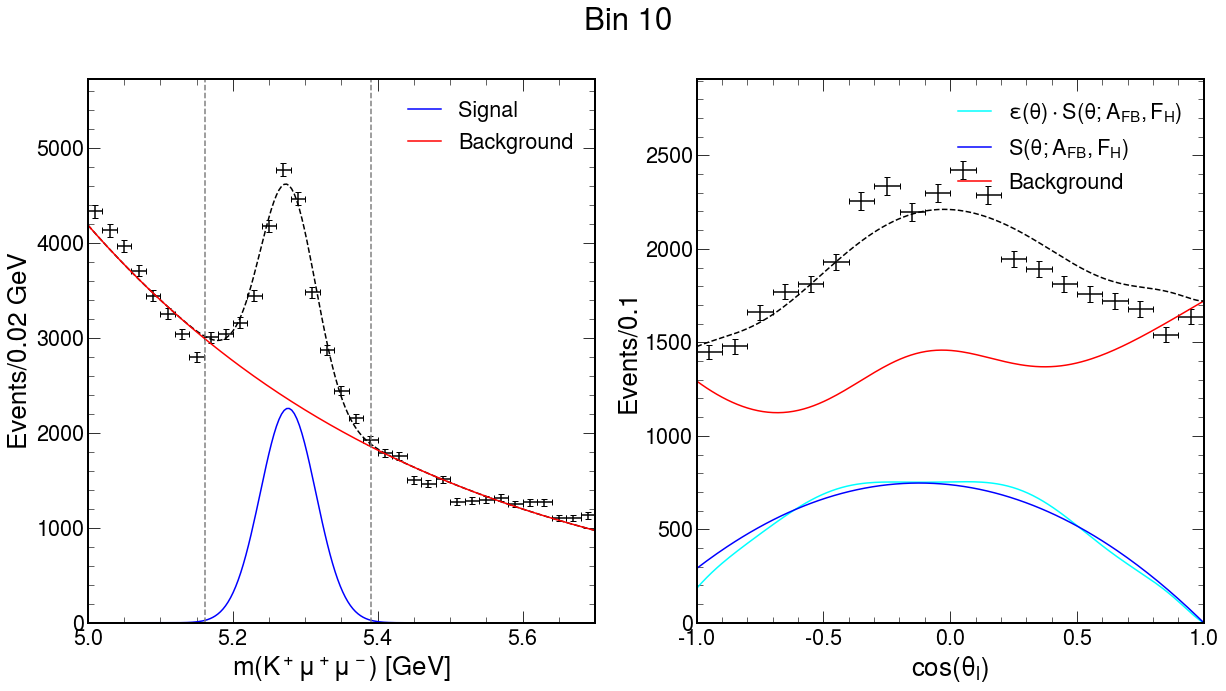

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [201]:
number=200
m = np.linspace(5, 5.7, number)
t = np.linspace(-1,1,number)

mass_plots = {'projection':dict(), 'signal':dict(), 'background':dict()}
angle_plots = {'projection':dict(), 'signal':dict(), 'background':dict(), 'only_signal':dict()}

with PdfPages('projections_only_signal_region.pdf') as pdf:

    for k, dataf in dataDF.items():
        
        if k in [3, 5]: continue

            
            
        sigmas_ = 3
        sigma_val = FitResults_[f'bin_{k}'].params['SIGMA']
        mu_val = FitResults_[f'bin_{k}'].params['MU']
        fractionOfBACK = fractionOfBack(k,3)
        fractionSIGNAL = 0.9973
        print('SIGMA : ', sigma_val)
            
            
        figura = plt.figure(figsize=(20,10))
        figura.suptitle(f'Bin {k}')    

        _1 = figura.add_subplot(121)
        mass_data = np.histogram(dataf.Bmass, bins=35)
        binsX = (mass_data[1][:-1]+mass_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _1.errorbar(binsX, mass_data[0], xerr=binsSize/2, yerr=np.sqrt(mass_data[0]), ls='none', capsize=3, color='black')

        if k in mass_plots['projection']:
            print('Here', k)
            mass_proj = mass_plots['projection'][k]
        else:
            print('calculating1')
            mass_proj = v_mass_p(m, k)    
            mass_plots['projection'][k] = mass_proj
        _1.plot(m, mass_proj*binsSize*len(dataf), color='black', ls='--')

        if k in mass_plots['signal']:
            mass_signal = mass_plots['signal'][k]
        else:
            print('calculating2')
            mass_signal = v_mass_signal(m, k)
            mass_plots['signal'][k] = mass_signal
        _1.plot(m, mass_signal*binsSize*len(dataf), color='blue', label='Signal')

        
        if k in mass_plots['background']:
            mass_signal = mass_plots['background'][k]
        else:
            print('calculating3')
            mass_background = v_mass_background(m, k)
            mass_plots['background'][k] = mass_background
        _1.plot(m, mass_background*binsSize*len(dataf), color='red', label='Background')

        _1.set_ylim(0, 1.2*max(mass_data[0]))
        _1.set_xlim(5, 5.7)
        _1.set_xlabel(r'm($K^+\mu^+\mu^-$) [GeV]')
        r = np.round(binsSize, 3)
        _1.set_ylabel(f'Events/{str(r)[:8]} GeV')
        _1.legend()
        #_1.title(f'Bin {k}')
        
        if sigmas_:
            _1.plot([mu_val-sigmas_*sigma_val, mu_val-sigmas_*sigma_val],[0, 1.2*max(mass_data[0])],ls='--', color='grey')
            _1.plot([mu_val+sigmas_*sigma_val, mu_val+sigmas_*sigma_val],[0, 1.2*max(mass_data[0])],ls='--', color='grey')


        _2 = figura.add_subplot(122)
        
        ang_data = np.histogram(dataf[(dataf.Bmass>mu_val-sigmas_*sigma_val)&(dataf.Bmass<mu_val+sigmas_*sigma_val)].cos_l, bins=20)
        binsX = (ang_data[1][:-1]+ang_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _2.errorbar(binsX, ang_data[0], xerr=binsSize/2, yerr=np.sqrt(ang_data[0]), ls='none', capsize=3, color='black')


        if k in angle_plots['signal']:
            angular_signal = angle_plots['signal'][k]
        else:
            print('calculating5')
            angular_signal = v_angular_signal(t, k)   
            angle_plots['signal'][k] = angular_signal
        _2.plot(t, fractionSIGNAL*angular_signal*binsSize*len(dataf), color='cyan', label=r'$\epsilon(\theta)\cdot S(\theta;A_{FB}, F_{H})$')

        if k in angle_plots['only_signal']:
            angular_only_signal = angle_plots['only_signal'][k]
        else:
            print('calculating5-2')
            angular_only_signal = v_angular_only_signal(t, k)   
            angle_plots['only_signal'][k] = angular_only_signal
        _2.plot(t, fractionSIGNAL*angular_only_signal*binsSize*len(dataf), color='blue', label=r'S$(\theta;A_{FB}, F_{H})$')

        
        if k in angle_plots['background']:
            angular_background = angle_plots['background'][k]
        else:
            print('calculating6')
            angular_background = v_angular_background(t, k) 
            angle_plots['background'][k] = angular_background
        _2.plot(t, fractionOfBACK*angular_background*binsSize*len(dataf), color='red', label='Background')

        
        if k in angle_plots['projection']:
            angular_proj = angle_plots['projection'][k]
        else:
            print('calculating4')
            angular_proj = v_angular_p(t, k)   
            angle_plots['projection'][k] = angular_proj
        #_2.plot(t, angular_proj*binsSize*len(dataf), color='black', ls='--')
        _2.plot(t, (fractionSIGNAL*angular_signal + fractionOfBACK*angular_background)*binsSize*len(dataf), color='black', ls='--')
        
        
        _2.set_ylim(0, 1.2*max(ang_data[0]))
        _2.set_xlim(-1, 1)
        _2.set_xlabel(r'$\cos(\theta_l)$')
        r = np.round(binsSize, 3)
        _2.set_ylabel(f'Events/{str(r)[:8]}')
        _2.legend()
        #plt.title(f'Bin {k}')
        
        pdf.savefig()
        plt.show()


In [152]:
del dataDF[3]
del dataDF[5]

calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3
calculating1
calculating2
calculating3


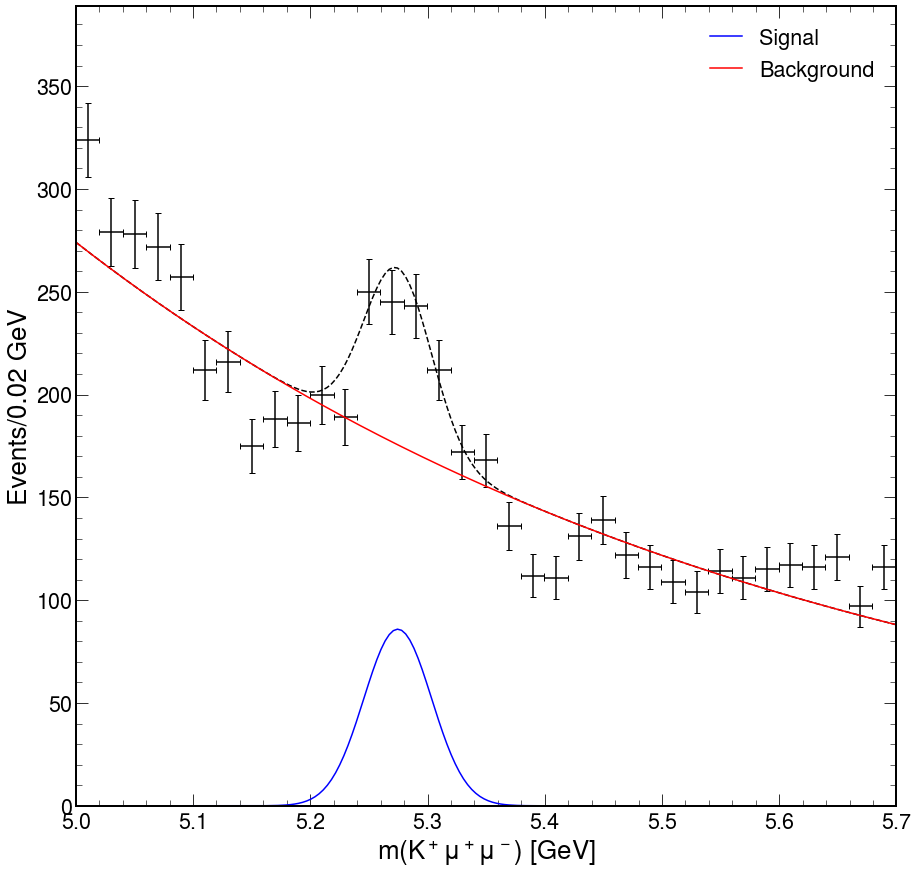

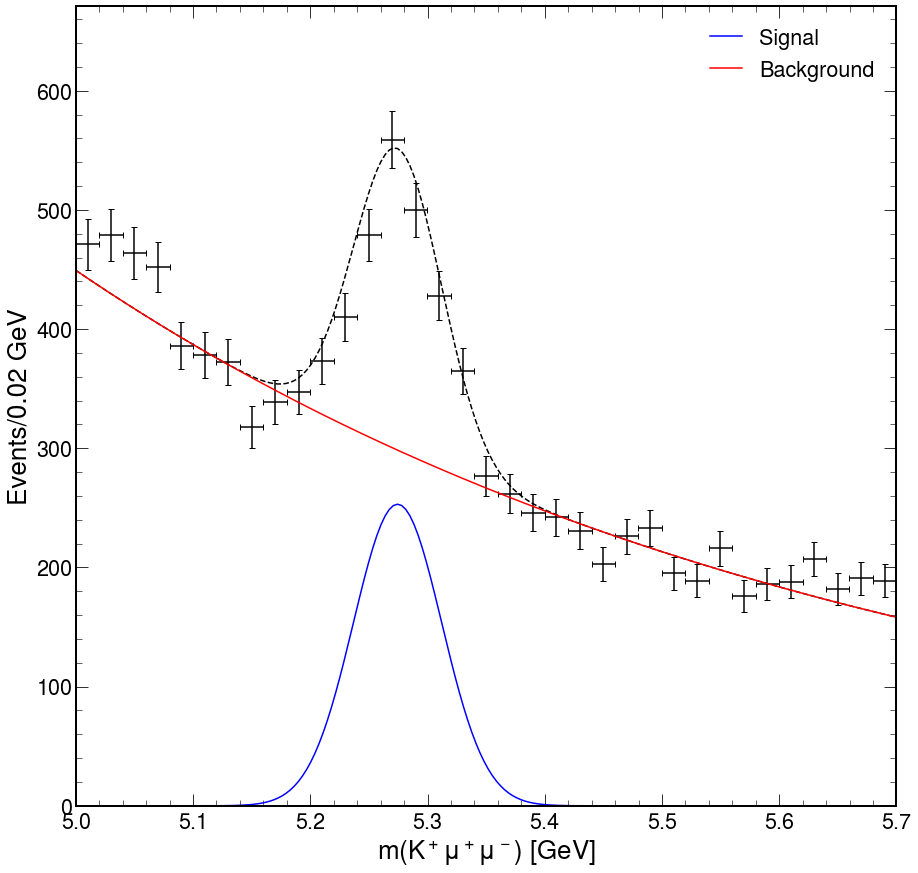

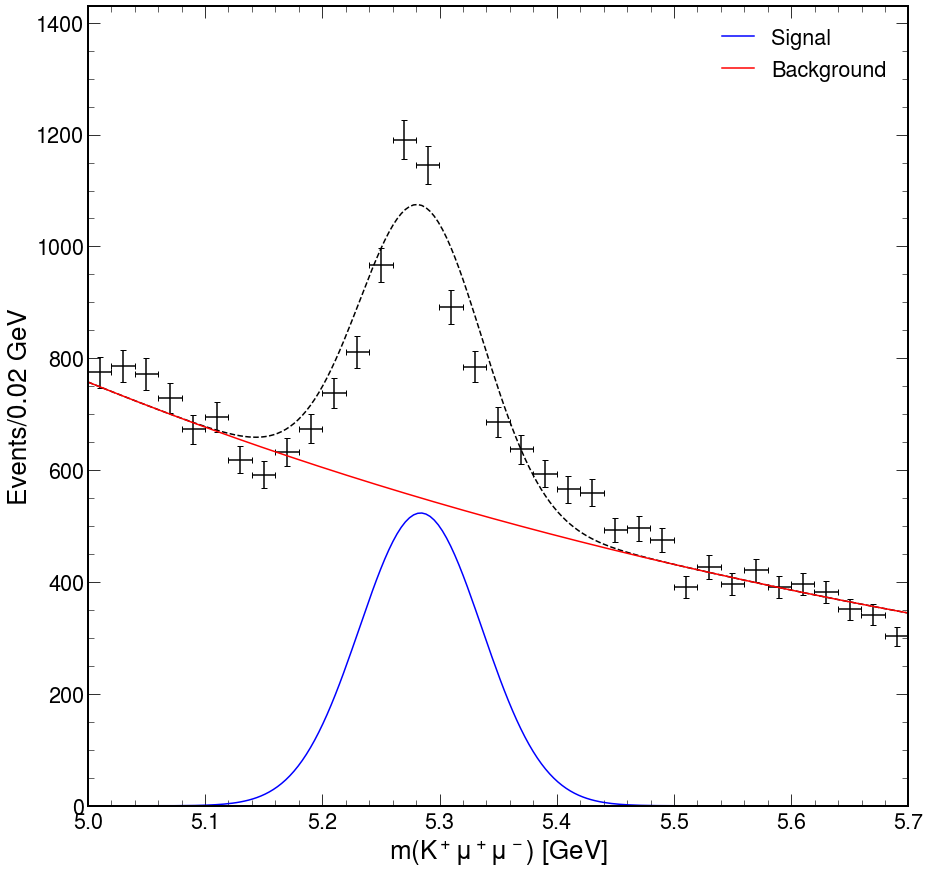

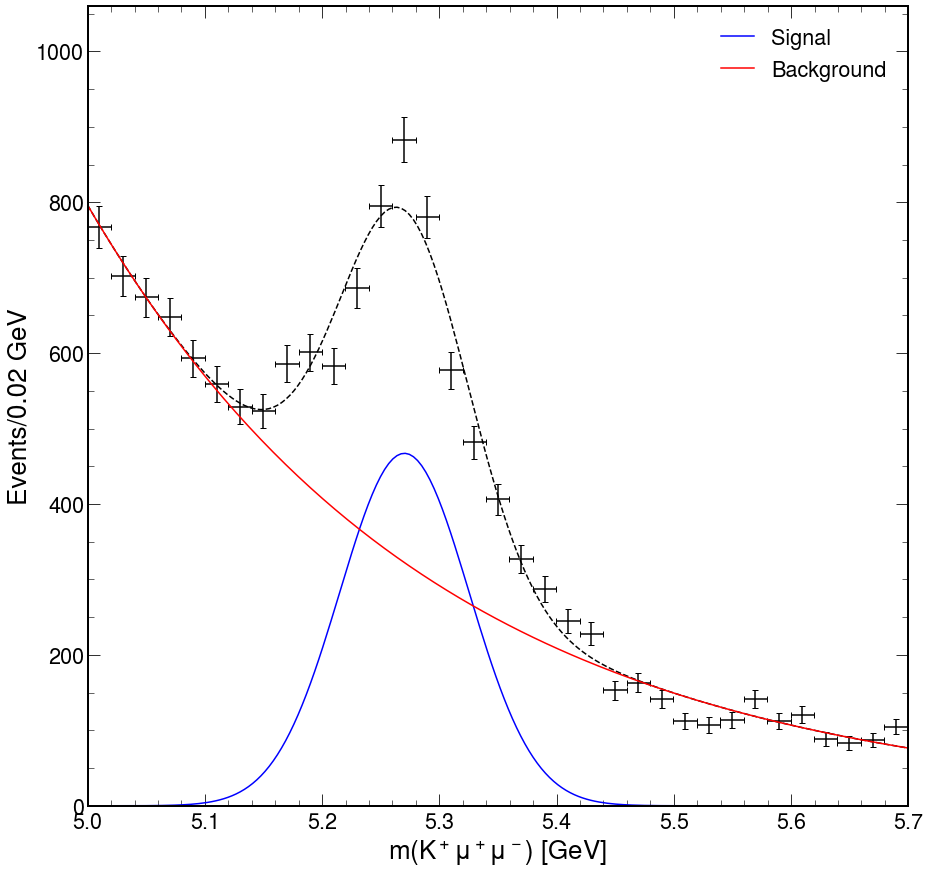

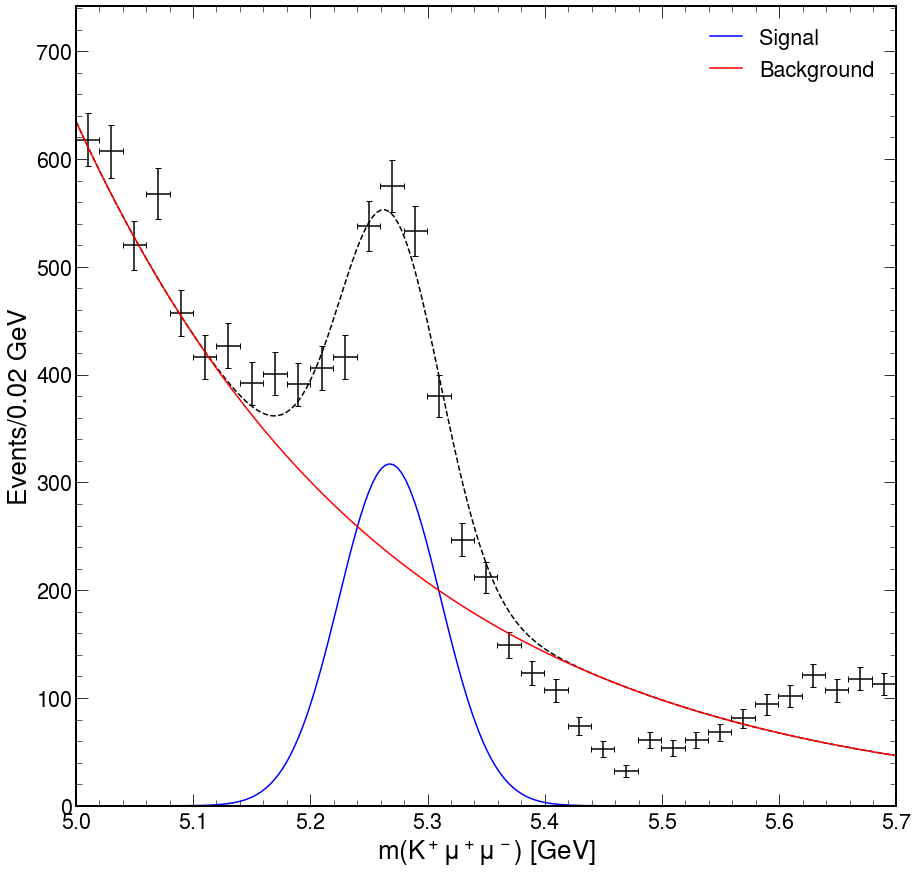

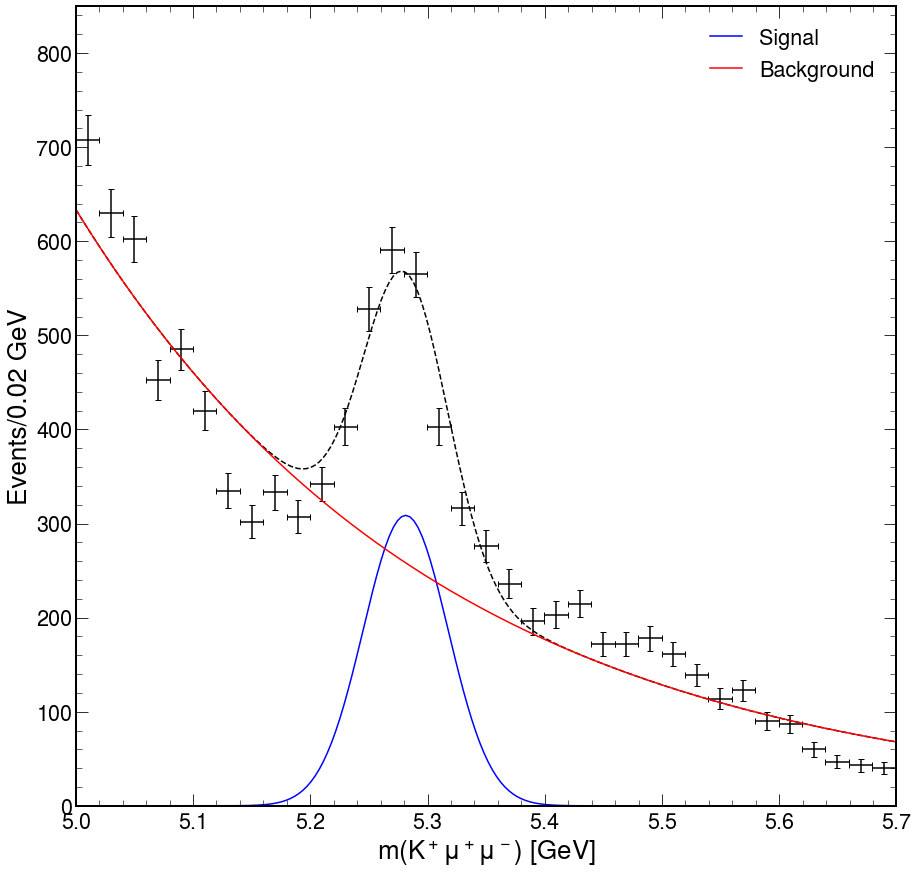

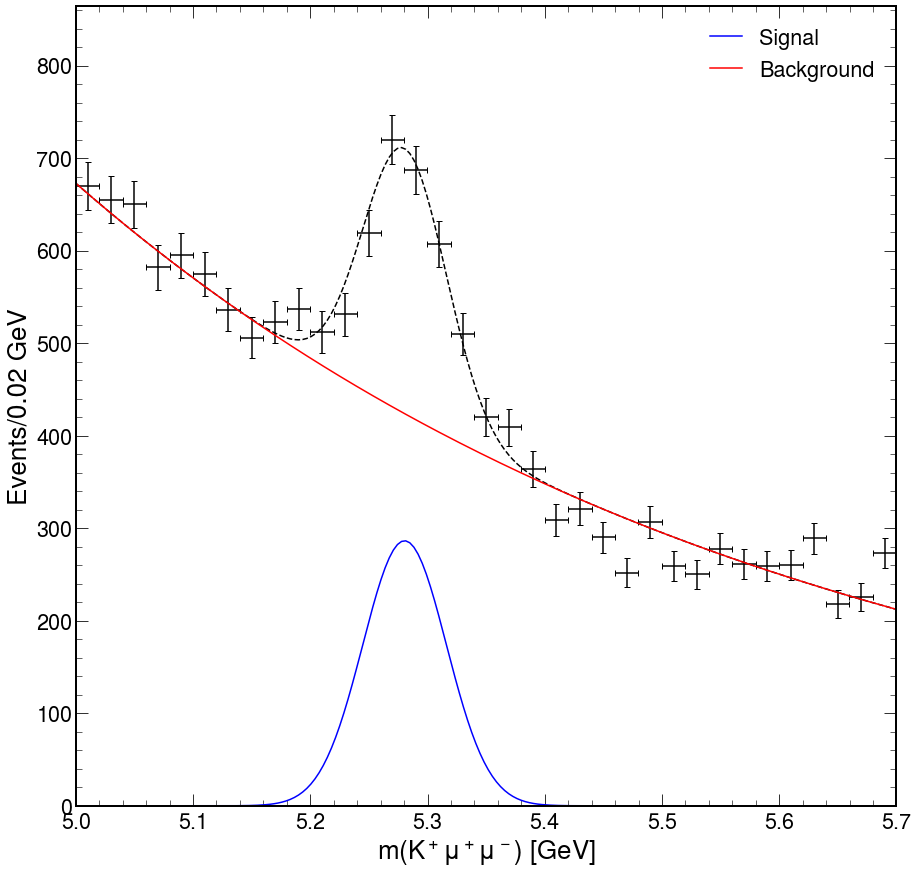

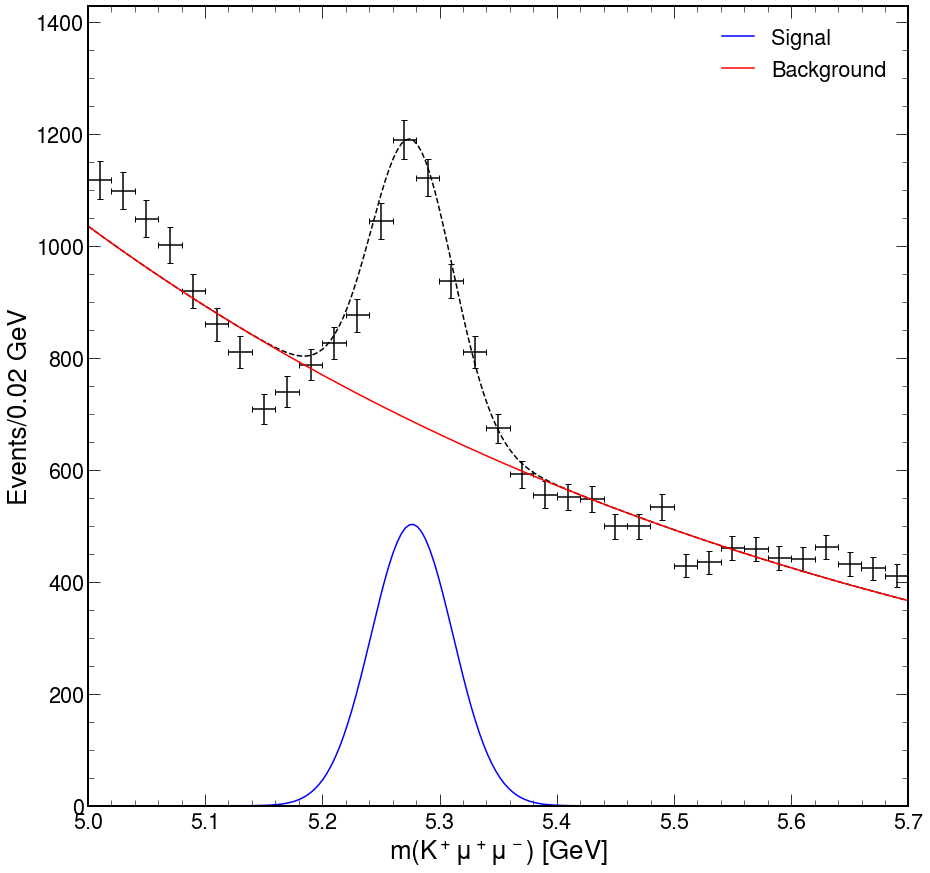

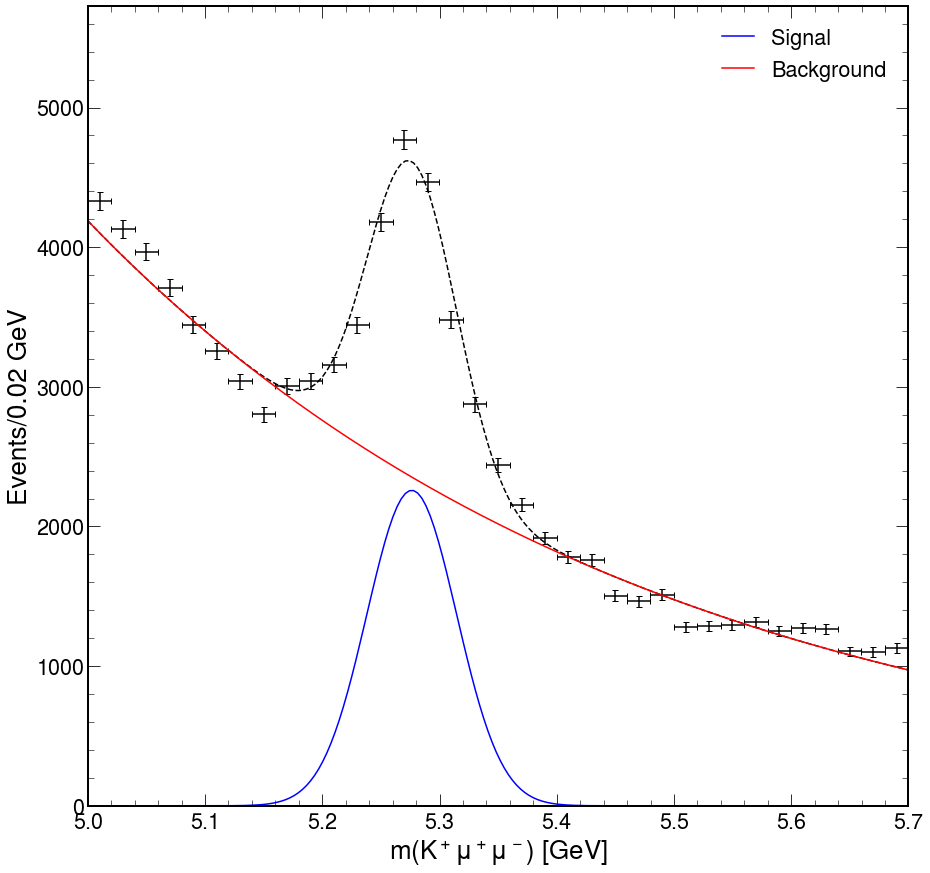

/home/horacio/Documents/pycms/lib64/python3.6/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


calculating4
calculating5
calculating6


/home/horacio/Documents/pycms/lib64/python3.6/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


calculating4
calculating5
calculating6


/home/horacio/Documents/pycms/lib64/python3.6/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


calculating4


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


KeyboardInterrupt: 

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [155]:
number=200
m = np.linspace(5, 5.7, number)
t = np.linspace(-1,1,number)


with PdfPages('projections_Mass_Angle.pdf') as pdf:

    for n,(k, dataf) in enumerate(dataDF.items()):
        if k in [3, 5]: continue

        figura_masas = plt.figure(figsize=(50,50))
        #figura.suptitle(f'Bin {k}')    

        _1 = figura_masas.add_subplot(3,3,n+1)
        mass_data = np.histogram(dataf.Bmass, bins=35)
        binsX = (mass_data[1][:-1]+mass_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _1.errorbar(binsX, mass_data[0], xerr=binsSize/2, yerr=np.sqrt(mass_data[0]), ls='none', capsize=3, color='black')

        if k in mass_plots['projection']:
            mass_proj = mass_plots['projection'][k]
        else:
            print('calculating1')
            mass_proj = v_mass_p(m, k)    
            mass_plots['projection'][k] = mass_proj
        _1.plot(m, mass_proj*binsSize*len(dataf), color='black', ls='--')

        if k in mass_plots['signal']:
            mass_signal = mass_plots['signal'][k]
        else:
            print('calculating2')
            mass_signal = v_mass_signal(m, k)
            mass_plots['signal'][k] = mass_signal
        _1.plot(m, mass_signal*binsSize*len(dataf), color='blue', label='Signal')

        
        if k in mass_plots['background']:
            mass_signal = mass_plots['background'][k]
        else:
            print('calculating3')
            mass_background = v_mass_background(m, k)
            mass_plots['background'][k] = mass_background
        _1.plot(m, mass_background*binsSize*len(dataf), color='red', label='Background')

        _1.set_ylim(0, 1.2*max(mass_data[0]))
        _1.set_xlim(5, 5.7)
        _1.set_xlabel(r'm($K^+\mu^+\mu^-$) [GeV]')
        r = np.round(binsSize, 3)
        _1.set_ylabel(f'Events/{str(r)[:8]} GeV')
        _1.legend()
        #_1.title(f'Bin {k}')
    pdf.savefig()
    plt.show()
        
        
        
        
        
        
    for n,(k, dataf) in enumerate(dataDF.items()):
        if k  == 3:
            continue

        figura_masas = plt.figure(figsize=(50,50))
        _2 = figura.add_subplot(3,3,n+1)
        ang_data = np.histogram(dataf.cos_l, bins=20)
        binsX = (ang_data[1][:-1]+ang_data[1][1:])/2
        binsSize = binsX[1]-binsX[0]
        _2.errorbar(binsX, ang_data[0], xerr=binsSize/2, yerr=np.sqrt(ang_data[0]), ls='none', capsize=3, color='black')

        if k in angle_plots['projection']:
            angular_proj = angle_plots['projection'][k]
        else:
            print('calculating4')
            angular_proj = v_angular_p(t, k)   
            angle_plots['projection'][k] = angular_proj
        _2.plot(t, angular_proj*binsSize*len(dataf), color='black', ls='--')


        if k in angle_plots['signal']:
            angular_signal = angle_plots['signal'][k]
        else:
            print('calculating5')
            angular_signal = v_angular_signal(t, k)   
            angle_plots['signal'][k] = angular_signal
        _2.plot(t, angular_signal*binsSize*len(dataf), color='blue', label=r'$\epsilon(\theta)\cdot S(\theta;A_{FB}, F_{H})$')

        
        if k in angle_plots['background']:
            angular_background = angle_plots['background'][k]
        else:
            print('calculating6')
            angular_background = v_angular_background(t, k) 
            angle_plots['signal'][k] = angular_background
        _2.plot(t, angular_background*binsSize*len(dataf), color='red', label='Background')

        _2.set_ylim(0, 1.2*max(ang_data[0]))
        _2.set_xlim(-1, 1)
        _2.set_xlabel(r'$\cos(\theta_l)$')
        r = np.round(binsSize, 3)
        _2.set_ylabel(f'Events/{str(r)[:8]}')
        _2.legend()
        #plt.title(f'Bin {k}')
        
    pdf.savefig()
    plt.show()


(5.0, 5.7)

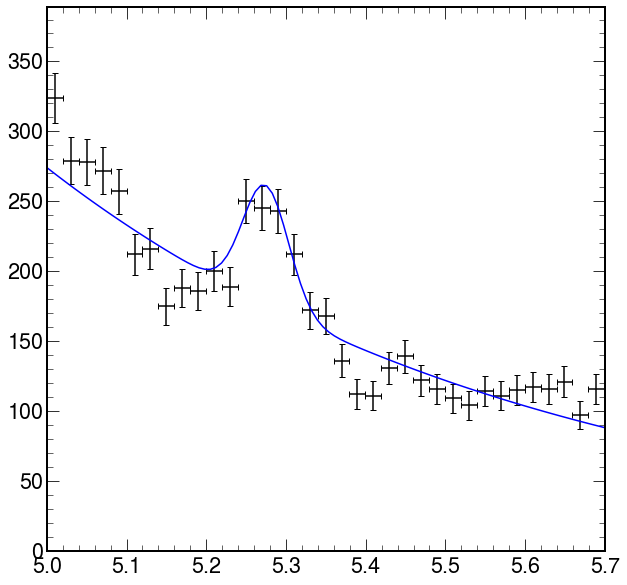

In [94]:
mass_data = np.histogram(dataDF[0].Bmass, bins=35)
binsX = (mass_data[1][:-1]+mass_data[1][1:])/2
binsSize = binsX[1]-binsX[0]
plt.errorbar(binsX, mass_data[0], xerr=binsSize/2, yerr=np.sqrt(mass_data[0]), ls='none', capsize=3, color='black')
plt.plot(np.linspace(5, 5.7, 100), mass_proj*binsSize*len(dataDF[0]), color='blue')
plt.ylim(0, 1.2*max(mass_data[0]))
plt.xlim(5, 5.7)

In [96]:
angular_proj = v_angular_p(np.linspace(-1,1,100), 0)

In [99]:
dataDF[0].cos_l

13612     -0.399424
61789      0.644895
74864      0.750477
81014     -0.548099
90952      0.344100
             ...   
2503696   -0.305757
2525378   -0.231208
2547520    0.601579
2551339    0.705352
2558759   -0.135452
Name: cos_l, Length: 6053, dtype: float32

(-1.0, 1.0)

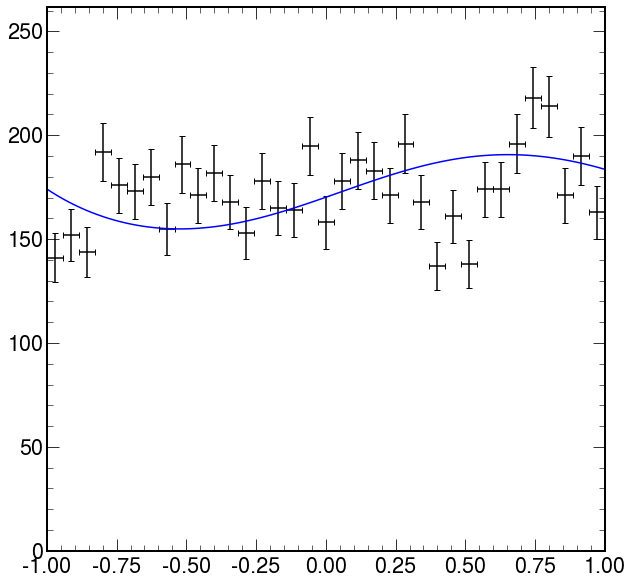

In [101]:
ang_data = np.histogram(dataDF[0].cos_l, bins=35)
binsX = (ang_data[1][:-1]+ang_data[1][1:])/2
binsSize = binsX[1]-binsX[0]
plt.errorbar(binsX, ang_data[0], xerr=binsSize/2, yerr=np.sqrt(ang_data[0]), ls='none', capsize=3, color='black')
plt.plot(np.linspace(-1,1,100), angular_proj*binsSize*len(dataDF[0]), color='blue')
plt.ylim(0, 1.2*max(ang_data[0]))
plt.xlim(-1, 1)

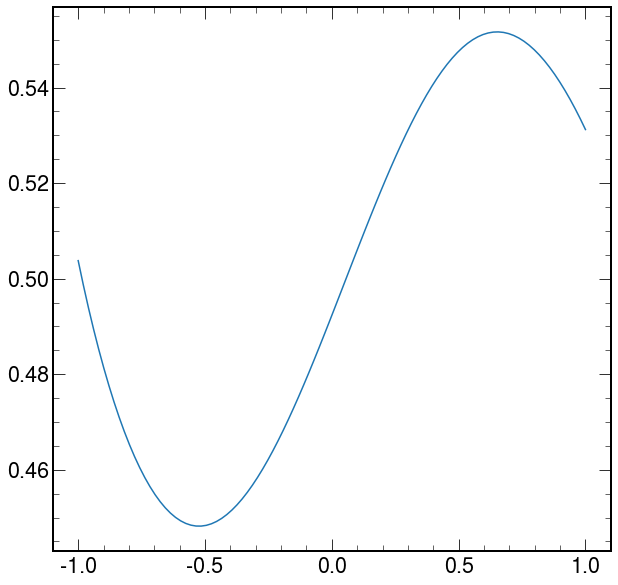

In [64]:
plt.plot(np.linspace(-1, 1, 100), ang_pro)

In [62]:
models['bin_0'].projection_angular(0, **FitResults_['bin_0'].params)

0.49232462670330196

In [48]:
models['bin_0'].pdf(5.5,0.1, **FitResults_['bin_0'].params)

-127997.37687889553

In [40]:
model.projection_angular

FRAC*(AFB*cos + 0.5*FH + (0.75 - 0.75*FH)*(1 - cos**2))*(-2.33499139452943*cos**8 - 1.13175603306273*cos**7 + 4.28727055156265*cos**6 + 1.97163814180929*cos**5 - 2.58554133211207*cos**4 - 0.977256443022921*cos**3 + 0.417335037191883*cos**2 + 0.120993654850457*cos + 0.524972853987694)/(0.00158370205127817*AFB - 0.0202204585241836*FH + 0.520220458524184) + (1 - FRAC)*(-0.0632428977272727*cos**3 + 0.171127840909091*cos**2 + 0.142761541193182*cos + 0.379457386363636 + 0.127*exp(-(-MU + cos)**2/(2*SIGMA**2))/(sqrt(2)*SIGMA*sqrt(pi)*erf(sqrt(2)*(1 - MU)/(2*SIGMA))/2 + sqrt(2)*SIGMA*sqrt(pi)*erf(-sqrt(2)*(-MU - 1)/(2*SIGMA))/2))

In [38]:
model.projection_angular(model.cos, FitResults_['bin_0'].params['AFB'], FitResults_['bin_0'].params['FH'], FitResults_['bin_0'].params['FRAC'] )

TypeError: missing a required argument: 'MU'

(array([261., 272., 315., 310., 301., 301., 303., 288., 291., 314., 301.,
        325., 323., 293., 245., 284., 319., 379., 328., 300.]),
 array([-9.9908149e-01, -8.9916527e-01, -7.9924905e-01, -6.9933283e-01,
        -5.9941661e-01, -4.9950039e-01, -3.9958420e-01, -2.9966798e-01,
        -1.9975176e-01, -9.9835545e-02,  8.0674887e-05,  9.9996895e-02,
         1.9991311e-01,  2.9982933e-01,  3.9974555e-01,  4.9966174e-01,
         5.9957796e-01,  6.9949418e-01,  7.9941040e-01,  8.9932662e-01,
         9.9924284e-01], dtype=float32),
 <a list of 20 Patch objects>)

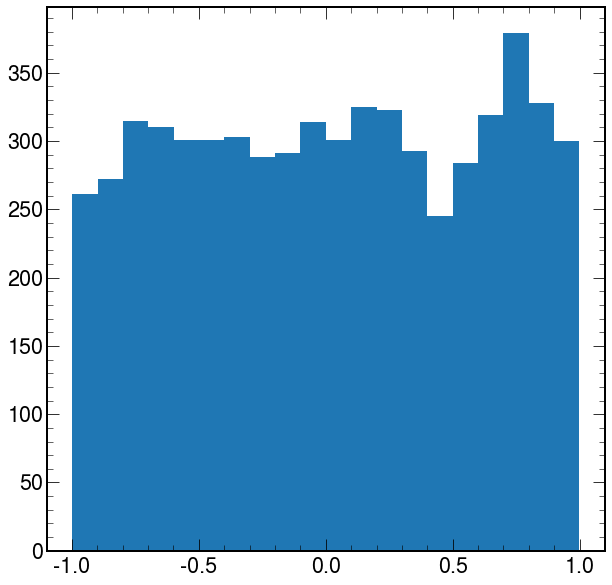

In [50]:
plt.hist(dataDF[0].cos_l, bins=20)

In [68]:
model.pdf(cos=0, mass = 5, **FitResults['bin_0'].params )

1.2093694329855893

In [66]:
model.signal_pdf(cos=0, mass = 5, **FitResults['bin_0'].params )

3.7220976748086925e-35

In [71]:
help(model.pdf)

Help on Add in module sympy.core.add object:

class Add(sympy.core.expr.Expr, sympy.core.operations.AssocOp)
 |  Base class for algebraic expressions.
 |  
 |  Everything that requires arithmetic operations to be defined
 |  should subclass this class, instead of Basic (which should be
 |  used only for argument storage and expression manipulation, i.e.
 |  pattern matching, substitutions, etc).
 |  
 |  See Also
 |  ========
 |  
 |  sympy.core.basic.Basic
 |  
 |  Method resolution order:
 |      Add
 |      sympy.core.expr.Expr
 |      sympy.core.operations.AssocOp
 |      sympy.core.basic.Basic
 |      sympy.core.evalf.EvalfMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __neg__(self)
 |  
 |  as_coeff_Add(self, rational=False, deps=None)
 |      Efficiently extract the coefficient of a summation.
 |  
 |  as_coeff_add(self, *deps)
 |      Returns a tuple (coeff, args) where self is treated as an Add and coeff
 |      is the Number term and args is a tuple of 

In [72]:
from sympy import integrate